In [43]:
random_seed=7
from numpy.random import seed
seed(random_seed)
from tensorflow import set_random_seed
set_random_seed(random_seed)
import numpy as np

In [71]:
import tensorflow as tp
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
import pandas as pd
from keras import backend as K
import math
import matplotlib.pyplot as plt
# from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

In [24]:
global varss # define all global variables here..
global count

In [36]:
#checking if GPU is used 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4191750013423296429
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4945621811
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13672828660171845679
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [5]:
dataset = pd.read_csv("../../data/1.csv", delimiter=",")
#dataset

In [6]:
def mean_imputation(dataset): 
    """"""
    imputed_dataset=dataset.fillna(dataset.mean())
    return imputed_dataset

In [7]:
dataset=mean_imputation(dataset)
#dataset

In [8]:
#to _numpy() works for 0.24.2 + version of pandas
pd.__version__

'0.24.2'

In [9]:
#dataset_np_array=dataset.to_numpy()
dataset_np_array=dataset.values
dataset_np_array

array([[ 18. ,   8. , 307. , ...,  12. ,  70. ,   1. ],
       [ 15. ,   8. , 350. , ...,  11.5,  70. ,   1. ],
       [ 18. ,   8. , 318. , ...,  11. ,  70. ,   1. ],
       ...,
       [ 32. ,   4. , 135. , ...,  11.6,  82. ,   1. ],
       [ 28. ,   4. , 120. , ...,  18.6,  82. ,   1. ],
       [ 31. ,   4. , 119. , ...,  19.4,  82. ,   1. ]])

In [10]:
#split into input (X) and output (Y)
def splitXY(dataset): 
    """
    Takes numpy array as input and converts first column into Y and rest into X
    """
    Y=dataset[:,0]
    X=dataset[:,1:]
    return X,Y

X,Y= splitXY(dataset_np_array)

In [11]:
def r_squared(y_true, y_pred):
    
    sse=tp.reduce_sum(tp.square(tp.subtract(y_pred,y_true)))
    #using sst as y_true-y_mean 's squared mean
    y_mean= tp.reduce_mean(y_true)
    sst=tp.reduce_sum(tp.square(tp.subtract(y_true,y_mean)))
    r_square=tp.subtract(float(1),tp.divide(sse,sst))
    
    """
    m=tp.to_float(tp.size(y_true))
    y_true_sum_sq=(tp.square(tp.reduce_sum(y_true)))
    y_sq_mean=tp.divide(y_true_sum_sq,m)
    sst=tp.subtract(tp.tensordot(y_true,y_true,0),m*tp.square(tp.reduce_mean(y_true)))
    r_square=tp.subtract(float(1),tp.divide(sse,sst))
    """
    return r_square

In [12]:
def adj_r_squared(y_true, y_pred):
    sse=tp.reduce_sum(tp.square(tp.subtract(y_pred,y_true)))
    #using sst as y_true-y_mean 's squared mean
    y_mean= tp.reduce_mean(y_true)
    sst=tp.reduce_sum(tp.square(tp.subtract(y_true,y_mean)))
    r_square=tp.subtract(float(1),tp.divide(sse,sst))
    
    #n=model.count_params()#this part was working before but now is not..how to get model here though?
    #n=sum([np.prod(K.get_value(w).shape) for w in model.trainable_weights])
    n=tp.to_float(count)
    #m=tp.to_float(tp.size(y_true))
    rdf=tp.divide(tp.subtract(tp.to_float(instances),float(1)),tp.subtract(tp.to_float(instances),n))
    r_adj_square=tp.subtract(float(1),tp.tensordot(rdf,tp.subtract(float(1),r_square),0))
    return r_adj_square

In [49]:
def perceptronModel(X_dim=7,activation_name='sigmoid'):
    """Takes number of X features and activation name as input and outputs a keras model for perceptron"""
    model = Sequential()
    model.add(Dense(1, input_dim=X_dim,activation='linear',kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    #model.add(Dense(1,activation='linear',kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    #model.add(Dense(1,kernel_initializer='normal'))
    global count
    count=model.count_params()
    #model.add(Dense(1, input_dim=X_dim, activation=activation_name,kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    # Compile model
    sgd=optimizers.SGD(lr=0.05, momentum=0.05, decay=0.0, nesterov=False)
    rmsprop=keras.optimizers.RMSprop(lr=0.05, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse',r_squared,adj_r_squared])

    """ 
    Apart from adam , all other optimizers are proving to be bad on this...
    """    
    return model

In [38]:
def neuralNetwork3LModel(X_dim,activation_name='relu'):
    """Takes number of X features and activation name as input and outputs a keras model for perceptron"""
    model = Sequential()
    model.add(Dense(X_dim, input_dim=X_dim,activation=activation_name,kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    model.add(Dense(1,activation='linear',kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    #model.add(Dense(1,kernel_initializer='normal'))
    
    #model.add(Dense(1, input_dim=X_dim, activation=activation_name,kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    # Compile model
    global count
    count=model.count_params()#-X_dim+1
    sgd=optimizers.SGD(lr=0.05, momentum=0.05, decay=0.0, nesterov=False)
    rmsprop=keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss='mean_squared_error',optimizer=rmsprop,metrics=['mse',r_squared,adj_r_squared])

    
    return model

In [39]:
def neuralNetwork5LModel(X_dim,activation_name='sigmoid'):
    """Takes number of X features and activation name as input and outputs a keras model for perceptron"""
    model = Sequential()
    model.add(Dense(X_dim, input_dim=X_dim,activation=activation_name,kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    model.add(Dense(X_dim,activation=activation_name,kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    model.add(Dense(X_dim,activation=activation_name,kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    model.add(Dense(1,activation='linear',kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    #model.add(Dense(1,kernel_initializer='normal'))
    
    #model.add(Dense(1, input_dim=X_dim, activation=activation_name,kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.RandomNormal(stddev=1)))
    # Compile model
    count=model.count_params() #-3*X_dim +1
    print('Count of parameters :'+str(count))
    sgd=optimizers.SGD(lr=0.05, momentum=0.05, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse',r_squared,adj_r_squared])

    
    return model

In [59]:
def fit_model(X,Y,name='Perceptron'):
    
    (X_size,X_dim)=X.shape
    global instances
    instances=X_size
    if(name=='Perceptron'):
        model =perceptronModel(X_dim)
    elif(name=='NeuralNetwork3L'):
        model =neuralNetwork3LModel(X_dim)
    elif(name=='NeuralNetwork5L'):
        model =neuralNetwork5LModel(X_dim)
    else: 
        raise Exception("Model Name is not correct: Please choose between given models")
    
    count=model.count_params() #-3*X_dim +1
    print('Count of parameters :'+str(count))
    model.summary()
    #early stopping 
    es = EarlyStopping(monitor='mean_squared_error', mode='min', verbose=1, patience=50)
    # Fit the model
    model.fit(X, Y, epochs=4000, batch_size=30,callbacks=[es])

    # evaluate the model
    # evaluate model with standardized dataset
    #estimator = KerasRegressor(build_fn=perceptronModel, epochs=100, batch_size=5, verbose=0)

    # kfold = KFold(n_splits=10, random_state=seed)
    # results = cross_val_score(estimator, X, Y, cv=kfold)
    # print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
    return model
model=fit_model(X,Y)

Count of parameters :8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4000
406/406 [==============================] - 0s 490us/sample - loss: 857785.3313 - mean_squared_error: 857785.2500 - r_squared: -15354.8066 - adj_r_squared: -15624.8818
Epoch 2/4000
406/406 [==============================] - 0s 106us/sample - loss: 769461.0924 - mean_squared_error: 769461.1250 - r_squared: -13975.8125 - adj_r_squared: -14221.6338
Epoch 3/4000
406/406 [==============================] - 0s 106us/sample - loss: 687907.5268 - mean_squared_error: 687907.6250 - r_squared: -12536.3965 - adj_r_squared: -12756.9043
Epoch 4/4000
406/406 [==============================] - 0s 101us/sample - loss: 613046.7823 - mean_squared_error:

406/406 [==============================] - 0s 86us/sample - loss: 2135.4384 - mean_squared_error: 2135.4382 - r_squared: -35.9371 - adj_r_squared: -36.5868
Epoch 46/4000
406/406 [==============================] - 0s 79us/sample - loss: 2098.5555 - mean_squared_error: 2098.5557 - r_squared: -38.9869 - adj_r_squared: -39.6902
Epoch 47/4000
406/406 [==============================] - 0s 81us/sample - loss: 2074.7421 - mean_squared_error: 2074.7422 - r_squared: -34.0741 - adj_r_squared: -34.6910
Epoch 48/4000
406/406 [==============================] - 0s 84us/sample - loss: 2055.7427 - mean_squared_error: 2055.7424 - r_squared: -33.7436 - adj_r_squared: -34.3547
Epoch 49/4000
406/406 [==============================] - 0s 80us/sample - loss: 2039.5171 - mean_squared_error: 2039.5175 - r_squared: -35.9872 - adj_r_squared: -36.6377
Epoch 50/4000
406/406 [==============================] - 0s 86us/sample - loss: 2031.1932 - mean_squared_error: 2031.1934 - r_squared: -36.6650 - adj_r_squared: -37

406/406 [==============================] - 0s 84us/sample - loss: 1935.3180 - mean_squared_error: 1935.3180 - r_squared: -33.7220 - adj_r_squared: -34.3327
Epoch 94/4000
406/406 [==============================] - 0s 84us/sample - loss: 1934.0505 - mean_squared_error: 1934.0503 - r_squared: -32.1933 - adj_r_squared: -32.7771
Epoch 95/4000
406/406 [==============================] - 0s 79us/sample - loss: 1931.7544 - mean_squared_error: 1931.7543 - r_squared: -32.2949 - adj_r_squared: -32.8805
Epoch 96/4000
406/406 [==============================] - 0s 81us/sample - loss: 1929.5889 - mean_squared_error: 1929.5891 - r_squared: -32.7161 - adj_r_squared: -33.3091
Epoch 97/4000
406/406 [==============================] - 0s 81us/sample - loss: 1928.4779 - mean_squared_error: 1928.4778 - r_squared: -33.1077 - adj_r_squared: -33.7076
Epoch 98/4000
406/406 [==============================] - 0s 93us/sample - loss: 1925.6983 - mean_squared_error: 1925.6985 - r_squared: -34.0104 - adj_r_squared: -34

406/406 [==============================] - 0s 84us/sample - loss: 1828.8149 - mean_squared_error: 1828.8149 - r_squared: -30.6191 - adj_r_squared: -31.1752
Epoch 142/4000
406/406 [==============================] - 0s 76us/sample - loss: 1825.8566 - mean_squared_error: 1825.8566 - r_squared: -31.3948 - adj_r_squared: -31.9646
Epoch 143/4000
406/406 [==============================] - 0s 79us/sample - loss: 1823.7037 - mean_squared_error: 1823.7036 - r_squared: -31.2675 - adj_r_squared: -31.8350
Epoch 144/4000
406/406 [==============================] - 0s 81us/sample - loss: 1819.9981 - mean_squared_error: 1819.9980 - r_squared: -30.3249 - adj_r_squared: -30.8758
Epoch 145/4000
406/406 [==============================] - 0s 81us/sample - loss: 1818.6884 - mean_squared_error: 1818.6885 - r_squared: -35.0530 - adj_r_squared: -35.6871
Epoch 146/4000
406/406 [==============================] - 0s 86us/sample - loss: 1815.1308 - mean_squared_error: 1815.1307 - r_squared: -30.9959 - adj_r_squared

Epoch 189/4000
406/406 [==============================] - 0s 80us/sample - loss: 1691.9116 - mean_squared_error: 1691.9116 - r_squared: -30.8673 - adj_r_squared: -31.4277
Epoch 190/4000
406/406 [==============================] - 0s 86us/sample - loss: 1690.8664 - mean_squared_error: 1690.8662 - r_squared: -28.4499 - adj_r_squared: -28.9679
Epoch 191/4000
406/406 [==============================] - 0s 79us/sample - loss: 1687.2658 - mean_squared_error: 1687.2660 - r_squared: -30.3287 - adj_r_squared: -30.8798
Epoch 192/4000
406/406 [==============================] - 0s 81us/sample - loss: 1683.8464 - mean_squared_error: 1683.8466 - r_squared: -29.2730 - adj_r_squared: -29.8055
Epoch 193/4000
406/406 [==============================] - 0s 86us/sample - loss: 1679.5066 - mean_squared_error: 1679.5066 - r_squared: -28.4470 - adj_r_squared: -28.9650
Epoch 194/4000
406/406 [==============================] - 0s 84us/sample - loss: 1678.0588 - mean_squared_error: 1678.0588 - r_squared: -29.7886 

406/406 [==============================] - 0s 79us/sample - loss: 1538.6720 - mean_squared_error: 1538.6721 - r_squared: -26.1418 - adj_r_squared: -26.6192
Epoch 237/4000
406/406 [==============================] - 0s 81us/sample - loss: 1535.5400 - mean_squared_error: 1535.5399 - r_squared: -26.4229 - adj_r_squared: -26.9052
Epoch 238/4000
406/406 [==============================] - 0s 81us/sample - loss: 1531.5833 - mean_squared_error: 1531.5833 - r_squared: -25.3515 - adj_r_squared: -25.8150
Epoch 239/4000
406/406 [==============================] - 0s 79us/sample - loss: 1528.6038 - mean_squared_error: 1528.6038 - r_squared: -26.7585 - adj_r_squared: -27.2468
Epoch 240/4000
406/406 [==============================] - 0s 81us/sample - loss: 1526.4727 - mean_squared_error: 1526.4728 - r_squared: -28.1981 - adj_r_squared: -28.7116
Epoch 241/4000
406/406 [==============================] - 0s 81us/sample - loss: 1521.4687 - mean_squared_error: 1521.4688 - r_squared: -25.6354 - adj_r_squared

Epoch 284/4000
406/406 [==============================] - 0s 84us/sample - loss: 1369.8819 - mean_squared_error: 1369.8820 - r_squared: -22.9110 - adj_r_squared: -23.3315
Epoch 285/4000
406/406 [==============================] - 0s 81us/sample - loss: 1365.2847 - mean_squared_error: 1365.2848 - r_squared: -22.6922 - adj_r_squared: -23.1089
Epoch 286/4000
406/406 [==============================] - 0s 81us/sample - loss: 1361.7793 - mean_squared_error: 1361.7793 - r_squared: -23.4967 - adj_r_squared: -23.9275
Epoch 287/4000
406/406 [==============================] - 0s 81us/sample - loss: 1357.3482 - mean_squared_error: 1357.3483 - r_squared: -24.2761 - adj_r_squared: -24.7207
Epoch 288/4000
406/406 [==============================] - 0s 81us/sample - loss: 1355.2173 - mean_squared_error: 1355.2174 - r_squared: -22.3510 - adj_r_squared: -22.7617
Epoch 289/4000
406/406 [==============================] - 0s 79us/sample - loss: 1351.1476 - mean_squared_error: 1351.1475 - r_squared: -24.5937 

406/406 [==============================] - 0s 81us/sample - loss: 1201.2455 - mean_squared_error: 1201.2455 - r_squared: -21.5761 - adj_r_squared: -21.9732
Epoch 332/4000
406/406 [==============================] - 0s 81us/sample - loss: 1198.4483 - mean_squared_error: 1198.4484 - r_squared: -23.5222 - adj_r_squared: -23.9534
Epoch 333/4000
406/406 [==============================] - 0s 80us/sample - loss: 1193.3287 - mean_squared_error: 1193.3286 - r_squared: -20.8290 - adj_r_squared: -21.2129
Epoch 334/4000
406/406 [==============================] - 0s 79us/sample - loss: 1189.6397 - mean_squared_error: 1189.6396 - r_squared: -20.8044 - adj_r_squared: -21.1878
Epoch 335/4000
406/406 [==============================] - 0s 81us/sample - loss: 1186.0820 - mean_squared_error: 1186.0819 - r_squared: -19.4099 - adj_r_squared: -19.7689
Epoch 336/4000
406/406 [==============================] - 0s 84us/sample - loss: 1180.9202 - mean_squared_error: 1180.9203 - r_squared: -19.2164 - adj_r_squared

Epoch 379/4000
406/406 [==============================] - 0s 81us/sample - loss: 1030.9063 - mean_squared_error: 1030.9064 - r_squared: -17.7524 - adj_r_squared: -18.0822
Epoch 380/4000
406/406 [==============================] - 0s 79us/sample - loss: 1023.4049 - mean_squared_error: 1023.4050 - r_squared: -18.8510 - adj_r_squared: -19.2002
Epoch 381/4000
406/406 [==============================] - 0s 79us/sample - loss: 1019.7899 - mean_squared_error: 1019.7900 - r_squared: -16.4619 - adj_r_squared: -16.7690
Epoch 382/4000
406/406 [==============================] - 0s 79us/sample - loss: 1016.8170 - mean_squared_error: 1016.8170 - r_squared: -17.4372 - adj_r_squared: -17.7615
Epoch 383/4000
406/406 [==============================] - 0s 79us/sample - loss: 1011.9090 - mean_squared_error: 1011.9089 - r_squared: -19.9100 - adj_r_squared: -20.2778
Epoch 384/4000
406/406 [==============================] - 0s 79us/sample - loss: 1011.5904 - mean_squared_error: 1011.5904 - r_squared: -17.7063 

406/406 [==============================] - 0s 84us/sample - loss: 854.3592 - mean_squared_error: 854.3592 - r_squared: -14.3598 - adj_r_squared: -14.6300
Epoch 428/4000
406/406 [==============================] - 0s 84us/sample - loss: 858.8548 - mean_squared_error: 858.8547 - r_squared: -14.1697 - adj_r_squared: -14.4365
Epoch 429/4000
406/406 [==============================] - 0s 79us/sample - loss: 847.9028 - mean_squared_error: 847.9029 - r_squared: -14.0693 - adj_r_squared: -14.3344
Epoch 430/4000
406/406 [==============================] - 0s 79us/sample - loss: 841.8807 - mean_squared_error: 841.8807 - r_squared: -14.7877 - adj_r_squared: -15.0654
Epoch 431/4000
406/406 [==============================] - 0s 79us/sample - loss: 839.9195 - mean_squared_error: 839.9195 - r_squared: -14.3251 - adj_r_squared: -14.5947
Epoch 432/4000
406/406 [==============================] - 0s 81us/sample - loss: 837.4931 - mean_squared_error: 837.4931 - r_squared: -14.0115 - adj_r_squared: -14.2755
E

406/406 [==============================] - 0s 90us/sample - loss: 679.5915 - mean_squared_error: 679.5915 - r_squared: -10.9995 - adj_r_squared: -11.2106
Epoch 476/4000
406/406 [==============================] - 0s 79us/sample - loss: 677.7904 - mean_squared_error: 677.7903 - r_squared: -10.7256 - adj_r_squared: -10.9318
Epoch 477/4000
406/406 [==============================] - 0s 81us/sample - loss: 673.2354 - mean_squared_error: 673.2354 - r_squared: -11.4558 - adj_r_squared: -11.6749
Epoch 478/4000
406/406 [==============================] - 0s 81us/sample - loss: 674.2638 - mean_squared_error: 674.2638 - r_squared: -11.5415 - adj_r_squared: -11.7621
Epoch 479/4000
406/406 [==============================] - 0s 79us/sample - loss: 673.8286 - mean_squared_error: 673.8286 - r_squared: -11.8421 - adj_r_squared: -12.0679
Epoch 480/4000
406/406 [==============================] - 0s 79us/sample - loss: 659.3389 - mean_squared_error: 659.3388 - r_squared: -10.8463 - adj_r_squared: -11.0547
E

406/406 [==============================] - 0s 84us/sample - loss: 516.2119 - mean_squared_error: 516.2120 - r_squared: -8.0523 - adj_r_squared: -8.2115
Epoch 524/4000
406/406 [==============================] - 0s 88us/sample - loss: 510.6022 - mean_squared_error: 510.6022 - r_squared: -7.7528 - adj_r_squared: -7.9067
Epoch 525/4000
406/406 [==============================] - 0s 84us/sample - loss: 507.7124 - mean_squared_error: 507.7124 - r_squared: -8.6659 - adj_r_squared: -8.8359
Epoch 526/4000
406/406 [==============================] - 0s 84us/sample - loss: 506.7187 - mean_squared_error: 506.7187 - r_squared: -7.6886 - adj_r_squared: -7.8415
Epoch 527/4000
406/406 [==============================] - 0s 81us/sample - loss: 511.6610 - mean_squared_error: 511.6610 - r_squared: -8.8021 - adj_r_squared: -8.9745
Epoch 528/4000
406/406 [==============================] - 0s 81us/sample - loss: 499.3494 - mean_squared_error: 499.3494 - r_squared: -8.8391 - adj_r_squared: -9.0122
Epoch 529/400

406/406 [==============================] - 0s 84us/sample - loss: 364.0088 - mean_squared_error: 364.0089 - r_squared: -5.3634 - adj_r_squared: -5.4753
Epoch 573/4000
406/406 [==============================] - 0s 81us/sample - loss: 362.4436 - mean_squared_error: 362.4437 - r_squared: -5.8868 - adj_r_squared: -6.0079
Epoch 574/4000
406/406 [==============================] - 0s 80us/sample - loss: 363.7407 - mean_squared_error: 363.7407 - r_squared: -5.6547 - adj_r_squared: -5.7718
Epoch 575/4000
406/406 [==============================] - 0s 84us/sample - loss: 364.1792 - mean_squared_error: 364.1792 - r_squared: -5.5126 - adj_r_squared: -5.6271
Epoch 576/4000
406/406 [==============================] - 0s 88us/sample - loss: 354.9327 - mean_squared_error: 354.9326 - r_squared: -5.2824 - adj_r_squared: -5.3929
Epoch 577/4000
406/406 [==============================] - 0s 79us/sample - loss: 351.2280 - mean_squared_error: 351.2280 - r_squared: -5.3555 - adj_r_squared: -5.4672
Epoch 578/400

406/406 [==============================] - 0s 81us/sample - loss: 241.2649 - mean_squared_error: 241.2649 - r_squared: -3.3581 - adj_r_squared: -3.4348
Epoch 622/4000
406/406 [==============================] - 0s 79us/sample - loss: 241.4476 - mean_squared_error: 241.4476 - r_squared: -3.2517 - adj_r_squared: -3.3265
Epoch 623/4000
406/406 [==============================] - 0s 81us/sample - loss: 239.2120 - mean_squared_error: 239.2120 - r_squared: -3.2065 - adj_r_squared: -3.2805
Epoch 624/4000
406/406 [==============================] - 0s 79us/sample - loss: 235.3809 - mean_squared_error: 235.3809 - r_squared: -3.4348 - adj_r_squared: -3.5128
Epoch 625/4000
406/406 [==============================] - 0s 88us/sample - loss: 232.0985 - mean_squared_error: 232.0985 - r_squared: -3.2191 - adj_r_squared: -3.2933
Epoch 626/4000
406/406 [==============================] - 0s 88us/sample - loss: 234.4904 - mean_squared_error: 234.4904 - r_squared: -3.2261 - adj_r_squared: -3.3005
Epoch 627/400

406/406 [==============================] - 0s 86us/sample - loss: 150.8935 - mean_squared_error: 150.8935 - r_squared: -1.8310 - adj_r_squared: -1.8808
Epoch 671/4000
406/406 [==============================] - 0s 81us/sample - loss: 152.0137 - mean_squared_error: 152.0137 - r_squared: -1.9186 - adj_r_squared: -1.9699
Epoch 672/4000
406/406 [==============================] - 0s 80us/sample - loss: 148.8629 - mean_squared_error: 148.8629 - r_squared: -1.6558 - adj_r_squared: -1.7025
Epoch 673/4000
406/406 [==============================] - 0s 79us/sample - loss: 147.2623 - mean_squared_error: 147.2623 - r_squared: -1.5513 - adj_r_squared: -1.5961
Epoch 674/4000
406/406 [==============================] - 0s 81us/sample - loss: 147.3476 - mean_squared_error: 147.3476 - r_squared: -1.5922 - adj_r_squared: -1.6378
Epoch 675/4000
406/406 [==============================] - 0s 84us/sample - loss: 145.3861 - mean_squared_error: 145.3861 - r_squared: -1.7924 - adj_r_squared: -1.8415
Epoch 676/400

406/406 [==============================] - 0s 86us/sample - loss: 93.6792 - mean_squared_error: 93.6792 - r_squared: -0.7410 - adj_r_squared: -0.7716
Epoch 720/4000
406/406 [==============================] - 0s 81us/sample - loss: 90.0800 - mean_squared_error: 90.0800 - r_squared: -0.6614 - adj_r_squared: -0.6906
Epoch 721/4000
406/406 [==============================] - 0s 81us/sample - loss: 90.7395 - mean_squared_error: 90.7395 - r_squared: -0.5430 - adj_r_squared: -0.5702
Epoch 722/4000
406/406 [==============================] - 0s 81us/sample - loss: 90.1028 - mean_squared_error: 90.1028 - r_squared: -0.5810 - adj_r_squared: -0.6088
Epoch 723/4000
406/406 [==============================] - 0s 77us/sample - loss: 86.9028 - mean_squared_error: 86.9028 - r_squared: -0.5695 - adj_r_squared: -0.5971
Epoch 724/4000
406/406 [==============================] - 0s 81us/sample - loss: 86.9414 - mean_squared_error: 86.9414 - r_squared: -0.6077 - adj_r_squared: -0.6359
Epoch 725/4000
406/406 [=

406/406 [==============================] - 0s 84us/sample - loss: 55.7958 - mean_squared_error: 55.7958 - r_squared: -0.0409 - adj_r_squared: -0.0592
Epoch 769/4000
406/406 [==============================] - 0s 84us/sample - loss: 55.5657 - mean_squared_error: 55.5657 - r_squared: -0.0827 - adj_r_squared: -0.1017
Epoch 770/4000
406/406 [==============================] - 0s 81us/sample - loss: 54.9382 - mean_squared_error: 54.9382 - r_squared: 0.0184 - adj_r_squared: 0.0011
Epoch 771/4000
406/406 [==============================] - 0s 81us/sample - loss: 55.0742 - mean_squared_error: 55.0742 - r_squared: 0.0327 - adj_r_squared: 0.0157
Epoch 772/4000
406/406 [==============================] - 0s 79us/sample - loss: 54.1958 - mean_squared_error: 54.1958 - r_squared: 0.0021 - adj_r_squared: -0.0154
Epoch 773/4000
406/406 [==============================] - 0s 81us/sample - loss: 53.2552 - mean_squared_error: 53.2552 - r_squared: 0.0898 - adj_r_squared: 0.0738
Epoch 774/4000
406/406 [========

406/406 [==============================] - 0s 85us/sample - loss: 37.1681 - mean_squared_error: 37.1681 - r_squared: 0.3152 - adj_r_squared: 0.3031
Epoch 819/4000
406/406 [==============================] - 0s 84us/sample - loss: 36.3867 - mean_squared_error: 36.3867 - r_squared: 0.3532 - adj_r_squared: 0.3418
Epoch 820/4000
406/406 [==============================] - 0s 79us/sample - loss: 36.1395 - mean_squared_error: 36.1395 - r_squared: 0.3231 - adj_r_squared: 0.3112
Epoch 821/4000
406/406 [==============================] - 0s 81us/sample - loss: 37.1332 - mean_squared_error: 37.1332 - r_squared: 0.3632 - adj_r_squared: 0.3520
Epoch 822/4000
406/406 [==============================] - 0s 79us/sample - loss: 36.7621 - mean_squared_error: 36.7621 - r_squared: 0.3648 - adj_r_squared: 0.3537
Epoch 823/4000
406/406 [==============================] - 0s 79us/sample - loss: 35.6075 - mean_squared_error: 35.6075 - r_squared: 0.3834 - adj_r_squared: 0.3726
Epoch 824/4000
406/406 [=============

406/406 [==============================] - 0s 79us/sample - loss: 27.5773 - mean_squared_error: 27.5773 - r_squared: 0.5142 - adj_r_squared: 0.5057
Epoch 869/4000
406/406 [==============================] - 0s 84us/sample - loss: 27.5232 - mean_squared_error: 27.5232 - r_squared: 0.5169 - adj_r_squared: 0.5084
Epoch 870/4000
406/406 [==============================] - 0s 81us/sample - loss: 27.3125 - mean_squared_error: 27.3125 - r_squared: 0.5192 - adj_r_squared: 0.5107
Epoch 871/4000
406/406 [==============================] - 0s 79us/sample - loss: 27.0608 - mean_squared_error: 27.0608 - r_squared: 0.5232 - adj_r_squared: 0.5148
Epoch 872/4000
406/406 [==============================] - 0s 79us/sample - loss: 28.3366 - mean_squared_error: 28.3366 - r_squared: 0.4980 - adj_r_squared: 0.4892
Epoch 873/4000
406/406 [==============================] - 0s 81us/sample - loss: 26.9445 - mean_squared_error: 26.9445 - r_squared: 0.5024 - adj_r_squared: 0.4937
Epoch 874/4000
406/406 [=============

406/406 [==============================] - 0s 81us/sample - loss: 25.1780 - mean_squared_error: 25.1780 - r_squared: 0.5230 - adj_r_squared: 0.5147
Epoch 919/4000
406/406 [==============================] - 0s 81us/sample - loss: 26.3603 - mean_squared_error: 26.3603 - r_squared: 0.5396 - adj_r_squared: 0.5315
Epoch 920/4000
406/406 [==============================] - 0s 79us/sample - loss: 24.0019 - mean_squared_error: 24.0019 - r_squared: 0.5858 - adj_r_squared: 0.5785
Epoch 921/4000
406/406 [==============================] - 0s 84us/sample - loss: 24.4389 - mean_squared_error: 24.4389 - r_squared: 0.5735 - adj_r_squared: 0.5660
Epoch 922/4000
406/406 [==============================] - 0s 79us/sample - loss: 24.8697 - mean_squared_error: 24.8697 - r_squared: 0.5368 - adj_r_squared: 0.5287
Epoch 923/4000
406/406 [==============================] - 0s 81us/sample - loss: 24.7601 - mean_squared_error: 24.7601 - r_squared: 0.5558 - adj_r_squared: 0.5479
Epoch 924/4000
406/406 [=============

406/406 [==============================] - 0s 79us/sample - loss: 22.2376 - mean_squared_error: 22.2376 - r_squared: 0.6132 - adj_r_squared: 0.6064
Epoch 969/4000
406/406 [==============================] - 0s 81us/sample - loss: 21.4769 - mean_squared_error: 21.4769 - r_squared: 0.6052 - adj_r_squared: 0.5983
Epoch 970/4000
406/406 [==============================] - 0s 81us/sample - loss: 21.0792 - mean_squared_error: 21.0792 - r_squared: 0.6296 - adj_r_squared: 0.6231
Epoch 971/4000
406/406 [==============================] - 0s 79us/sample - loss: 21.1869 - mean_squared_error: 21.1869 - r_squared: 0.6307 - adj_r_squared: 0.6242
Epoch 972/4000
406/406 [==============================] - 0s 79us/sample - loss: 21.0840 - mean_squared_error: 21.0840 - r_squared: 0.5940 - adj_r_squared: 0.5868
Epoch 973/4000
406/406 [==============================] - 0s 81us/sample - loss: 22.3609 - mean_squared_error: 22.3609 - r_squared: 0.5817 - adj_r_squared: 0.5743
Epoch 974/4000
406/406 [=============

406/406 [==============================] - 0s 76us/sample - loss: 20.4614 - mean_squared_error: 20.4614 - r_squared: 0.6429 - adj_r_squared: 0.6366
Epoch 1019/4000
406/406 [==============================] - 0s 84us/sample - loss: 20.6182 - mean_squared_error: 20.6182 - r_squared: 0.6181 - adj_r_squared: 0.6114
Epoch 1020/4000
406/406 [==============================] - 0s 81us/sample - loss: 19.5799 - mean_squared_error: 19.5799 - r_squared: 0.6552 - adj_r_squared: 0.6491
Epoch 1021/4000
406/406 [==============================] - 0s 79us/sample - loss: 19.6059 - mean_squared_error: 19.6059 - r_squared: 0.6490 - adj_r_squared: 0.6428
Epoch 1022/4000
406/406 [==============================] - 0s 76us/sample - loss: 19.7735 - mean_squared_error: 19.7735 - r_squared: 0.6555 - adj_r_squared: 0.6494
Epoch 1023/4000
406/406 [==============================] - 0s 79us/sample - loss: 20.0805 - mean_squared_error: 20.0805 - r_squared: 0.6353 - adj_r_squared: 0.6289
Epoch 1024/4000
406/406 [=======

406/406 [==============================] - 0s 86us/sample - loss: 18.3884 - mean_squared_error: 18.3884 - r_squared: 0.6789 - adj_r_squared: 0.6733
Epoch 1069/4000
406/406 [==============================] - 0s 84us/sample - loss: 18.6516 - mean_squared_error: 18.6516 - r_squared: 0.6685 - adj_r_squared: 0.6627
Epoch 1070/4000
406/406 [==============================] - 0s 81us/sample - loss: 18.9471 - mean_squared_error: 18.9471 - r_squared: 0.6697 - adj_r_squared: 0.6639
Epoch 1071/4000
406/406 [==============================] - 0s 81us/sample - loss: 18.5299 - mean_squared_error: 18.5299 - r_squared: 0.6798 - adj_r_squared: 0.6742
Epoch 1072/4000
406/406 [==============================] - 0s 81us/sample - loss: 18.2170 - mean_squared_error: 18.2170 - r_squared: 0.6717 - adj_r_squared: 0.6659
Epoch 1073/4000
406/406 [==============================] - 0s 76us/sample - loss: 18.1008 - mean_squared_error: 18.1008 - r_squared: 0.6910 - adj_r_squared: 0.6856
Epoch 1074/4000
406/406 [=======

406/406 [==============================] - 0s 84us/sample - loss: 18.5833 - mean_squared_error: 18.5834 - r_squared: 0.6791 - adj_r_squared: 0.6735
Epoch 1119/4000
406/406 [==============================] - 0s 84us/sample - loss: 18.5205 - mean_squared_error: 18.5205 - r_squared: 0.6613 - adj_r_squared: 0.6553
Epoch 1120/4000
406/406 [==============================] - 0s 84us/sample - loss: 17.9012 - mean_squared_error: 17.9012 - r_squared: 0.6904 - adj_r_squared: 0.6849
Epoch 1121/4000
406/406 [==============================] - 0s 79us/sample - loss: 17.5062 - mean_squared_error: 17.5062 - r_squared: 0.6708 - adj_r_squared: 0.6650
Epoch 1122/4000
406/406 [==============================] - 0s 81us/sample - loss: 17.1440 - mean_squared_error: 17.1440 - r_squared: 0.6941 - adj_r_squared: 0.6887
Epoch 1123/4000
406/406 [==============================] - 0s 79us/sample - loss: 18.9374 - mean_squared_error: 18.9374 - r_squared: 0.6663 - adj_r_squared: 0.6604
Epoch 1124/4000
406/406 [=======

406/406 [==============================] - 0s 84us/sample - loss: 16.4071 - mean_squared_error: 16.4071 - r_squared: 0.7082 - adj_r_squared: 0.7030
Epoch 1169/4000
406/406 [==============================] - 0s 83us/sample - loss: 16.5950 - mean_squared_error: 16.5950 - r_squared: 0.6922 - adj_r_squared: 0.6867
Epoch 1170/4000
406/406 [==============================] - 0s 79us/sample - loss: 16.5382 - mean_squared_error: 16.5382 - r_squared: 0.7128 - adj_r_squared: 0.7077
Epoch 1171/4000
406/406 [==============================] - 0s 84us/sample - loss: 17.1244 - mean_squared_error: 17.1244 - r_squared: 0.6854 - adj_r_squared: 0.6799
Epoch 1172/4000
406/406 [==============================] - 0s 80us/sample - loss: 17.2051 - mean_squared_error: 17.2051 - r_squared: 0.6537 - adj_r_squared: 0.6476
Epoch 1173/4000
406/406 [==============================] - 0s 81us/sample - loss: 17.0665 - mean_squared_error: 17.0665 - r_squared: 0.7061 - adj_r_squared: 0.7010
Epoch 1174/4000
406/406 [=======

406/406 [==============================] - 0s 79us/sample - loss: 15.4579 - mean_squared_error: 15.4579 - r_squared: 0.7318 - adj_r_squared: 0.7271
Epoch 1219/4000
406/406 [==============================] - 0s 84us/sample - loss: 15.7791 - mean_squared_error: 15.7791 - r_squared: 0.7242 - adj_r_squared: 0.7194
Epoch 1220/4000
406/406 [==============================] - 0s 79us/sample - loss: 15.4773 - mean_squared_error: 15.4773 - r_squared: 0.7302 - adj_r_squared: 0.7255
Epoch 1221/4000
406/406 [==============================] - 0s 81us/sample - loss: 15.9608 - mean_squared_error: 15.9608 - r_squared: 0.7142 - adj_r_squared: 0.7092
Epoch 1222/4000
406/406 [==============================] - 0s 81us/sample - loss: 17.4020 - mean_squared_error: 17.4020 - r_squared: 0.6953 - adj_r_squared: 0.6900
Epoch 1223/4000
406/406 [==============================] - 0s 81us/sample - loss: 15.6616 - mean_squared_error: 15.6616 - r_squared: 0.6900 - adj_r_squared: 0.6846
Epoch 1224/4000
406/406 [=======

406/406 [==============================] - 0s 83us/sample - loss: 15.7416 - mean_squared_error: 15.7416 - r_squared: 0.7255 - adj_r_squared: 0.7206
Epoch 1269/4000
406/406 [==============================] - 0s 79us/sample - loss: 15.1574 - mean_squared_error: 15.1574 - r_squared: 0.7252 - adj_r_squared: 0.7203
Epoch 1270/4000
406/406 [==============================] - 0s 81us/sample - loss: 15.6956 - mean_squared_error: 15.6956 - r_squared: 0.6969 - adj_r_squared: 0.6916
Epoch 1271/4000
406/406 [==============================] - 0s 81us/sample - loss: 16.1263 - mean_squared_error: 16.1263 - r_squared: 0.7277 - adj_r_squared: 0.7229
Epoch 1272/4000
406/406 [==============================] - 0s 79us/sample - loss: 16.3098 - mean_squared_error: 16.3098 - r_squared: 0.7120 - adj_r_squared: 0.7069
Epoch 1273/4000
406/406 [==============================] - 0s 79us/sample - loss: 15.2839 - mean_squared_error: 15.2839 - r_squared: 0.7291 - adj_r_squared: 0.7244
Epoch 1274/4000
406/406 [=======

406/406 [==============================] - 0s 84us/sample - loss: 14.4501 - mean_squared_error: 14.4501 - r_squared: 0.7419 - adj_r_squared: 0.7373
Epoch 1319/4000
406/406 [==============================] - 0s 84us/sample - loss: 14.6913 - mean_squared_error: 14.6913 - r_squared: 0.7388 - adj_r_squared: 0.7342
Epoch 1320/4000
406/406 [==============================] - 0s 81us/sample - loss: 14.6599 - mean_squared_error: 14.6599 - r_squared: 0.7410 - adj_r_squared: 0.7364
Epoch 1321/4000
406/406 [==============================] - 0s 81us/sample - loss: 14.3836 - mean_squared_error: 14.3836 - r_squared: 0.7436 - adj_r_squared: 0.7390
Epoch 1322/4000
406/406 [==============================] - 0s 79us/sample - loss: 14.3642 - mean_squared_error: 14.3642 - r_squared: 0.7411 - adj_r_squared: 0.7366
Epoch 1323/4000
406/406 [==============================] - 0s 81us/sample - loss: 15.1367 - mean_squared_error: 15.1367 - r_squared: 0.7255 - adj_r_squared: 0.7207
Epoch 1324/4000
406/406 [=======

406/406 [==============================] - 0s 81us/sample - loss: 15.7355 - mean_squared_error: 15.7355 - r_squared: 0.7223 - adj_r_squared: 0.7174
Epoch 1369/4000
406/406 [==============================] - 0s 79us/sample - loss: 17.7726 - mean_squared_error: 17.7726 - r_squared: 0.6828 - adj_r_squared: 0.6772
Epoch 1370/4000
406/406 [==============================] - 0s 79us/sample - loss: 16.6452 - mean_squared_error: 16.6452 - r_squared: 0.7024 - adj_r_squared: 0.6972
Epoch 1371/4000
406/406 [==============================] - 0s 81us/sample - loss: 16.1902 - mean_squared_error: 16.1902 - r_squared: 0.7114 - adj_r_squared: 0.7063
Epoch 1372/4000
406/406 [==============================] - 0s 79us/sample - loss: 14.1853 - mean_squared_error: 14.1853 - r_squared: 0.7582 - adj_r_squared: 0.7540
Epoch 1373/4000
406/406 [==============================] - 0s 79us/sample - loss: 13.9864 - mean_squared_error: 13.9864 - r_squared: 0.7540 - adj_r_squared: 0.7496
Epoch 1374/4000
406/406 [=======

406/406 [==============================] - 0s 79us/sample - loss: 14.1258 - mean_squared_error: 14.1258 - r_squared: 0.7542 - adj_r_squared: 0.7499
Epoch 1419/4000
406/406 [==============================] - 0s 84us/sample - loss: 14.0175 - mean_squared_error: 14.0175 - r_squared: 0.7452 - adj_r_squared: 0.7407
Epoch 1420/4000
406/406 [==============================] - 0s 81us/sample - loss: 14.7653 - mean_squared_error: 14.7653 - r_squared: 0.7423 - adj_r_squared: 0.7378
Epoch 1421/4000
406/406 [==============================] - 0s 76us/sample - loss: 15.2489 - mean_squared_error: 15.2489 - r_squared: 0.7303 - adj_r_squared: 0.7256
Epoch 1422/4000
406/406 [==============================] - 0s 81us/sample - loss: 16.8040 - mean_squared_error: 16.8040 - r_squared: 0.6987 - adj_r_squared: 0.6934
Epoch 1423/4000
406/406 [==============================] - 0s 81us/sample - loss: 16.0356 - mean_squared_error: 16.0356 - r_squared: 0.7053 - adj_r_squared: 0.7001
Epoch 1424/4000
406/406 [=======

In [60]:
def eval_model(X,Y,model):
#model evaluation.

    scores = model.evaluate(X, Y, verbose=0)
        
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))
    print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
    print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
    return scores
eval_model(X,Y,model)

mean_squared_error: 13.59%
r_squared: 76.49%
adj_r_squared: 76.07%


[13.594381853864698, 13.59438, 0.76487976, 0.7607444]

In [64]:
#To find RCV value
def cross_val_split(dataset):
    #dataset is split into 80:20 ratio of train and test
    np.random.shuffle(dataset)
    m,n=dataset_np_array.shape
    count=math.ceil(m*0.8)
    training, test = dataset[:count,:], dataset[count:,:]
    X_train,Y_train=splitXY(training)
    X_test,Y_test=splitXY(test)
#     model=fit_model(X_train,Y_train)
#     # evaluate the model
#     scores = eval_model(X_test,Y_test,model)
#     r_square_cv=dict_scores[model.metrics_names[2]]=scores[2]
    return X_train,Y_train,X_test,Y_test   
cross_val_split(dataset_np_array)

(array([[  4. ,  85. ,  70. , ...,  18.6,  78. ,   3. ],
        [  4. , 120. ,  88. , ...,  17. ,  75. ,   2. ],
        [  3. ,  70. , 100. , ...,  12.5,  80. ,   3. ],
        ...,
        [  4. , 140. ,  90. , ...,  15.5,  71. ,   1. ],
        [  4. , 121. ,  76. , ...,  18. ,  72. ,   2. ],
        [  6. , 232. ,  90. , ...,  18.2,  79. ,   1. ]]),
 array([39.4       , 23.        , 23.7       , 17.        , 28.        ,
        37.        , 28.        , 32.3       , 32.2       , 30.        ,
        17.6       , 26.        , 10.        , 23.6       , 20.6       ,
        20.        , 22.        , 27.2       , 21.        , 19.        ,
        20.2       , 35.7       , 22.        , 18.6       , 21.        ,
        29.9       , 30.        , 27.        , 13.        , 24.        ,
        26.        , 19.        , 31.8       , 22.        , 28.        ,
        19.4       , 23.51457286, 14.5       , 34.5       , 44.6       ,
        23.        , 19.        , 18.        , 14.        ,

In [94]:
def forward_sel(X_train,Y_train,modelname,X_test=None,Y_test=None):
    """It takes X_train and Y_train and builds a model on top of them by selecting columns iteratively. 
    For CV case, it takes in X_test and Y_test as well
    """
    m,n=X_train.shape
    r_square=[]
    r_adj=[]
    r_square_cv=[]
    r_adj_cv=[]
    if(X_test is None and Y_test is None): 
        for colno in range(0,n):
            X_set=X_train[:,0:colno+1]
            model=fit_model(X_set,Y_train,modelname)
            scores=eval_model(X_train,Y_train,model)
            r_square.append(scores[2])
            r_adj.append(scores[3])
        return r_square,r_adj
        
    elif(X_test is not None and Y_test is not None): 
            for colno in range(0,n):
                X_set=X_train[:,0:colno+1]
                model=fit_model(X_train,Y_train,modelname)
                scores=eval_model(X_test,Y_test,model)
                r_square_cv.append(scores[2])
                r_adj_cv.append(scores[3])
            return r_square_cv,r_adj_cv
    return None 

In [95]:
#starting with datasetNumpy
X,Y=splitXY(dataset_np_array)
X_train,Y_train,X_test,Y_test=cross_val_split(dataset_np_array)

#FOR r_square and r_adj values..for perceptron
r_square,r_adjusted=forward_sel(X,Y,"Perceptron")


Count of parameters :2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_740:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance(

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_738:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_736:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_734:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_732:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_730:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_728:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_726:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_724:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_722:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_720:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_718:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_716:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_714:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_712:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_710:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_708:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_706:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_704:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_702:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_700:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

AttributeError: 'Tensor' object has no attribute 'is_initialized'

In [70]:
r_square_cv,r_adj_cv=forward_sel(X_train,Y_train,"Perceptron",X_test,Y_test)

Count of parameters :8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4000
325/325 [==============================] - 0s 743us/sample - loss: 5383765.2692 - mean_squared_error: 5383765.5000 - r_squared: -99780.3828 - adj_r_squared: -101983.7578
Epoch 2/4000
325/325 [==============================] - 0s 117us/sample - loss: 5209239.8846 - mean_squared_error: 5209239.5000 - r_squared: -94019.0625 - adj_r_squared: -96095.2188
Epoch 3/4000
325/325 [==============================] - 0s 111us/sample - loss: 5039872.3154 - mean_squared_error: 5039872.0000 - r_squared: -93786.5703 - adj_r_squared: -95857.5781
Epoch 4/4000
325/325 [==============================] - 0s 104us/sample - loss: 4872385.5385 - mean_square

325/325 [==============================] - 0s 86us/sample - loss: 1012173.3808 - mean_squared_error: 1012173.3750 - r_squared: -18466.5332 - adj_r_squared: -18874.3320
Epoch 44/4000
325/325 [==============================] - 0s 92us/sample - loss: 965904.6942 - mean_squared_error: 965904.7500 - r_squared: -17754.8477 - adj_r_squared: -18146.9316
Epoch 45/4000
325/325 [==============================] - 0s 86us/sample - loss: 919975.6913 - mean_squared_error: 919975.7500 - r_squared: -16191.2314 - adj_r_squared: -16548.7891
Epoch 46/4000
325/325 [==============================] - 0s 80us/sample - loss: 876325.0135 - mean_squared_error: 876325.0000 - r_squared: -16956.0820 - adj_r_squared: -17330.5293
Epoch 47/4000
325/325 [==============================] - 0s 83us/sample - loss: 834674.4029 - mean_squared_error: 834674.4375 - r_squared: -15054.0693 - adj_r_squared: -15386.5146
Epoch 48/4000
325/325 [==============================] - 0s 89us/sample - loss: 794338.8269 - mean_squared_error

Epoch 89/4000
325/325 [==============================] - 0s 83us/sample - loss: 74963.2191 - mean_squared_error: 74963.2109 - r_squared: -1391.5189 - adj_r_squared: -1422.2687
Epoch 90/4000
325/325 [==============================] - 0s 86us/sample - loss: 70403.4522 - mean_squared_error: 70403.4609 - r_squared: -1301.7450 - adj_r_squared: -1330.5122
Epoch 91/4000
325/325 [==============================] - 0s 89us/sample - loss: 66197.3067 - mean_squared_error: 66197.3125 - r_squared: -1203.5746 - adj_r_squared: -1230.1738
Epoch 92/4000
325/325 [==============================] - 0s 77us/sample - loss: 62264.5881 - mean_squared_error: 62264.5898 - r_squared: -1120.8344 - adj_r_squared: -1145.6067
Epoch 93/4000
325/325 [==============================] - 0s 83us/sample - loss: 58531.8200 - mean_squared_error: 58531.8203 - r_squared: -1070.3234 - adj_r_squared: -1093.9802
Epoch 94/4000
325/325 [==============================] - 0s 95us/sample - loss: 55069.0682 - mean_squared_error: 55069.0

325/325 [==============================] - 0s 83us/sample - loss: 11986.8264 - mean_squared_error: 11986.8262 - r_squared: -210.9847 - adj_r_squared: -215.6658
Epoch 136/4000
325/325 [==============================] - 0s 86us/sample - loss: 11868.2393 - mean_squared_error: 11868.2393 - r_squared: -218.1978 - adj_r_squared: -223.0381
Epoch 137/4000
325/325 [==============================] - 0s 86us/sample - loss: 11767.1497 - mean_squared_error: 11767.1494 - r_squared: -215.1432 - adj_r_squared: -219.9161
Epoch 138/4000
325/325 [==============================] - 0s 77us/sample - loss: 11666.7455 - mean_squared_error: 11666.7451 - r_squared: -207.9998 - adj_r_squared: -212.6150
Epoch 139/4000
325/325 [==============================] - 0s 80us/sample - loss: 11582.9621 - mean_squared_error: 11582.9619 - r_squared: -209.1643 - adj_r_squared: -213.8051
Epoch 140/4000
325/325 [==============================] - 0s 86us/sample - loss: 11502.4825 - mean_squared_error: 11502.4834 - r_squared: -1

325/325 [==============================] - 0s 74us/sample - loss: 10597.4375 - mean_squared_error: 10597.4375 - r_squared: -202.0242 - adj_r_squared: -206.5074
Epoch 182/4000
325/325 [==============================] - 0s 83us/sample - loss: 10589.1351 - mean_squared_error: 10589.1357 - r_squared: -198.7476 - adj_r_squared: -203.1584
Epoch 183/4000
325/325 [==============================] - 0s 74us/sample - loss: 10581.2581 - mean_squared_error: 10581.2578 - r_squared: -199.4728 - adj_r_squared: -203.8997
Epoch 184/4000
325/325 [==============================] - 0s 74us/sample - loss: 10573.5621 - mean_squared_error: 10573.5625 - r_squared: -185.3333 - adj_r_squared: -189.4479
Epoch 185/4000
325/325 [==============================] - 0s 80us/sample - loss: 10564.7818 - mean_squared_error: 10564.7812 - r_squared: -193.4849 - adj_r_squared: -197.7795
Epoch 186/4000
325/325 [==============================] - 0s 74us/sample - loss: 10557.0254 - mean_squared_error: 10557.0264 - r_squared: -1

325/325 [==============================] - 0s 77us/sample - loss: 10193.6862 - mean_squared_error: 10193.6865 - r_squared: -181.9250 - adj_r_squared: -185.9644
Epoch 228/4000
325/325 [==============================] - 0s 89us/sample - loss: 10184.0816 - mean_squared_error: 10184.0820 - r_squared: -189.4476 - adj_r_squared: -193.6530
Epoch 229/4000
325/325 [==============================] - 0s 77us/sample - loss: 10173.3918 - mean_squared_error: 10173.3926 - r_squared: -187.8403 - adj_r_squared: -192.0102
Epoch 230/4000
325/325 [==============================] - 0s 80us/sample - loss: 10163.8087 - mean_squared_error: 10163.8096 - r_squared: -179.0902 - adj_r_squared: -183.0669
Epoch 231/4000
325/325 [==============================] - 0s 74us/sample - loss: 10153.6256 - mean_squared_error: 10153.6260 - r_squared: -183.7626 - adj_r_squared: -187.8425
Epoch 232/4000
325/325 [==============================] - 0s 80us/sample - loss: 10144.4895 - mean_squared_error: 10144.4893 - r_squared: -1

325/325 [==============================] - 0s 86us/sample - loss: 9679.4645 - mean_squared_error: 9679.4639 - r_squared: -177.0061 - adj_r_squared: -180.9368
Epoch 275/4000
325/325 [==============================] - 0s 83us/sample - loss: 9668.2986 - mean_squared_error: 9668.2988 - r_squared: -166.9463 - adj_r_squared: -170.6549
Epoch 276/4000
325/325 [==============================] - 0s 77us/sample - loss: 9655.8074 - mean_squared_error: 9655.8066 - r_squared: -174.9670 - adj_r_squared: -178.8527
Epoch 277/4000
325/325 [==============================] - 0s 74us/sample - loss: 9645.0096 - mean_squared_error: 9645.0088 - r_squared: -175.7106 - adj_r_squared: -179.6127
Epoch 278/4000
325/325 [==============================] - 0s 74us/sample - loss: 9631.2714 - mean_squared_error: 9631.2715 - r_squared: -165.8191 - adj_r_squared: -169.5028
Epoch 279/4000
325/325 [==============================] - 0s 74us/sample - loss: 9618.5374 - mean_squared_error: 9618.5371 - r_squared: -174.1752 - ad

325/325 [==============================] - 0s 77us/sample - loss: 9053.1344 - mean_squared_error: 9053.1338 - r_squared: -155.4947 - adj_r_squared: -158.9504
Epoch 322/4000
325/325 [==============================] - 0s 89us/sample - loss: 9036.3120 - mean_squared_error: 9036.3125 - r_squared: -155.7265 - adj_r_squared: -159.1873
Epoch 323/4000
325/325 [==============================] - 0s 77us/sample - loss: 9022.9827 - mean_squared_error: 9022.9834 - r_squared: -169.1373 - adj_r_squared: -172.8943
Epoch 324/4000
325/325 [==============================] - 0s 83us/sample - loss: 9008.0594 - mean_squared_error: 9008.0596 - r_squared: -156.8082 - adj_r_squared: -160.2929
Epoch 325/4000
325/325 [==============================] - 0s 74us/sample - loss: 8992.6581 - mean_squared_error: 8992.6572 - r_squared: -165.2351 - adj_r_squared: -168.9059
Epoch 326/4000
325/325 [==============================] - 0s 74us/sample - loss: 8977.4486 - mean_squared_error: 8977.4492 - r_squared: -161.6425 - ad

325/325 [==============================] - 0s 92us/sample - loss: 8302.7994 - mean_squared_error: 8302.7988 - r_squared: -150.6622 - adj_r_squared: -154.0112
Epoch 369/4000
325/325 [==============================] - 0s 107us/sample - loss: 8286.3134 - mean_squared_error: 8286.3135 - r_squared: -145.1383 - adj_r_squared: -148.3653
Epoch 370/4000
325/325 [==============================] - 0s 104us/sample - loss: 8274.5859 - mean_squared_error: 8274.5859 - r_squared: -151.1454 - adj_r_squared: -154.5051
Epoch 371/4000
325/325 [==============================] - 0s 107us/sample - loss: 8251.8711 - mean_squared_error: 8251.8711 - r_squared: -156.0074 - adj_r_squared: -159.4745
Epoch 372/4000
325/325 [==============================] - 0s 114us/sample - loss: 8234.5304 - mean_squared_error: 8234.5312 - r_squared: -151.9220 - adj_r_squared: -155.2989
Epoch 373/4000
325/325 [==============================] - 0s 95us/sample - loss: 8217.3486 - mean_squared_error: 8217.3486 - r_squared: -153.1396 

325/325 [==============================] - 0s 95us/sample - loss: 7442.0092 - mean_squared_error: 7442.0093 - r_squared: -140.9989 - adj_r_squared: -144.1345
Epoch 416/4000
325/325 [==============================] - 0s 89us/sample - loss: 7424.4859 - mean_squared_error: 7424.4863 - r_squared: -141.6302 - adj_r_squared: -144.7797
Epoch 417/4000
325/325 [==============================] - 0s 89us/sample - loss: 7401.9812 - mean_squared_error: 7401.9814 - r_squared: -138.8897 - adj_r_squared: -141.9787
Epoch 418/4000
325/325 [==============================] - 0s 104us/sample - loss: 7382.2180 - mean_squared_error: 7382.2178 - r_squared: -131.3687 - adj_r_squared: -134.2916
Epoch 419/4000
325/325 [==============================] - 0s 104us/sample - loss: 7364.7615 - mean_squared_error: 7364.7617 - r_squared: -131.0288 - adj_r_squared: -133.9443
Epoch 420/4000
325/325 [==============================] - 0s 95us/sample - loss: 7345.5492 - mean_squared_error: 7345.5483 - r_squared: -135.6112 - 

325/325 [==============================] - 0s 92us/sample - loss: 6481.3488 - mean_squared_error: 6481.3486 - r_squared: -111.5137 - adj_r_squared: -113.9982
Epoch 463/4000
325/325 [==============================] - 0s 83us/sample - loss: 6462.6123 - mean_squared_error: 6462.6123 - r_squared: -127.7498 - adj_r_squared: -130.5928
Epoch 464/4000
325/325 [==============================] - 0s 86us/sample - loss: 6441.2021 - mean_squared_error: 6441.2021 - r_squared: -120.6985 - adj_r_squared: -123.3858
Epoch 465/4000
325/325 [==============================] - 0s 83us/sample - loss: 6419.8363 - mean_squared_error: 6419.8364 - r_squared: -113.7786 - adj_r_squared: -116.3131
Epoch 466/4000
325/325 [==============================] - 0s 80us/sample - loss: 6397.1721 - mean_squared_error: 6397.1719 - r_squared: -121.9686 - adj_r_squared: -124.6840
Epoch 467/4000
325/325 [==============================] - 0s 77us/sample - loss: 6379.1311 - mean_squared_error: 6379.1309 - r_squared: -113.0374 - ad

325/325 [==============================] - 0s 86us/sample - loss: 5464.4077 - mean_squared_error: 5464.4077 - r_squared: -96.4581 - adj_r_squared: -98.6102
Epoch 510/4000
325/325 [==============================] - 0s 89us/sample - loss: 5442.0868 - mean_squared_error: 5442.0869 - r_squared: -95.8067 - adj_r_squared: -97.9444
Epoch 511/4000
325/325 [==============================] - 0s 86us/sample - loss: 5422.8503 - mean_squared_error: 5422.8501 - r_squared: -101.7436 - adj_r_squared: -104.0124
Epoch 512/4000
325/325 [==============================] - 0s 95us/sample - loss: 5400.7802 - mean_squared_error: 5400.7798 - r_squared: -94.6714 - adj_r_squared: -96.7840
Epoch 513/4000
325/325 [==============================] - 0s 77us/sample - loss: 5379.8485 - mean_squared_error: 5379.8481 - r_squared: -94.6803 - adj_r_squared: -96.7931
Epoch 514/4000
325/325 [==============================] - 0s 80us/sample - loss: 5361.1677 - mean_squared_error: 5361.1675 - r_squared: -94.4858 - adj_r_squar

325/325 [==============================] - 0s 83us/sample - loss: 4443.5184 - mean_squared_error: 4443.5186 - r_squared: -76.2605 - adj_r_squared: -77.9666
Epoch 557/4000
325/325 [==============================] - 0s 83us/sample - loss: 4426.8030 - mean_squared_error: 4426.8032 - r_squared: -80.4679 - adj_r_squared: -82.2669
Epoch 558/4000
325/325 [==============================] - 0s 80us/sample - loss: 4402.5420 - mean_squared_error: 4402.5420 - r_squared: -83.1870 - adj_r_squared: -85.0460
Epoch 559/4000
325/325 [==============================] - 0s 80us/sample - loss: 4384.1164 - mean_squared_error: 4384.1162 - r_squared: -76.9594 - adj_r_squared: -78.6809
Epoch 560/4000
325/325 [==============================] - 0s 77us/sample - loss: 4360.8580 - mean_squared_error: 4360.8579 - r_squared: -77.0648 - adj_r_squared: -78.7886
Epoch 561/4000
325/325 [==============================] - 0s 77us/sample - loss: 4337.7933 - mean_squared_error: 4337.7935 - r_squared: -78.9640 - adj_r_squared

Epoch 604/4000
325/325 [==============================] - 0s 80us/sample - loss: 3469.7933 - mean_squared_error: 3469.7930 - r_squared: -62.4112 - adj_r_squared: -63.8115
Epoch 605/4000
325/325 [==============================] - 0s 83us/sample - loss: 3446.0599 - mean_squared_error: 3446.0601 - r_squared: -62.2993 - adj_r_squared: -63.6970
Epoch 606/4000
325/325 [==============================] - 0s 80us/sample - loss: 3427.5457 - mean_squared_error: 3427.5457 - r_squared: -61.7571 - adj_r_squared: -63.1429
Epoch 607/4000
325/325 [==============================] - 0s 80us/sample - loss: 3414.7270 - mean_squared_error: 3414.7268 - r_squared: -66.2664 - adj_r_squared: -67.7518
Epoch 608/4000
325/325 [==============================] - 0s 83us/sample - loss: 3389.4774 - mean_squared_error: 3389.4778 - r_squared: -60.9025 - adj_r_squared: -62.2694
Epoch 609/4000
325/325 [==============================] - 0s 80us/sample - loss: 3370.2357 - mean_squared_error: 3370.2358 - r_squared: -60.4530 

325/325 [==============================] - 0s 80us/sample - loss: 2632.6248 - mean_squared_error: 2632.6250 - r_squared: -49.1054 - adj_r_squared: -50.2118
Epoch 652/4000
325/325 [==============================] - 0s 74us/sample - loss: 2621.0657 - mean_squared_error: 2621.0657 - r_squared: -46.3954 - adj_r_squared: -47.4420
Epoch 653/4000
325/325 [==============================] - 0s 74us/sample - loss: 2601.9217 - mean_squared_error: 2601.9216 - r_squared: -48.2554 - adj_r_squared: -49.3431
Epoch 654/4000
325/325 [==============================] - 0s 77us/sample - loss: 2586.3611 - mean_squared_error: 2586.3608 - r_squared: -46.6555 - adj_r_squared: -47.7078
Epoch 655/4000
325/325 [==============================] - 0s 77us/sample - loss: 2570.2041 - mean_squared_error: 2570.2041 - r_squared: -44.9417 - adj_r_squared: -45.9562
Epoch 656/4000
325/325 [==============================] - 0s 80us/sample - loss: 2554.5940 - mean_squared_error: 2554.5940 - r_squared: -44.3126 - adj_r_squared

Epoch 699/4000
325/325 [==============================] - 0s 80us/sample - loss: 1955.1693 - mean_squared_error: 1955.1694 - r_squared: -35.2368 - adj_r_squared: -36.0370
Epoch 700/4000
325/325 [==============================] - 0s 80us/sample - loss: 1944.5482 - mean_squared_error: 1944.5482 - r_squared: -33.0463 - adj_r_squared: -33.7981
Epoch 701/4000
325/325 [==============================] - 0s 80us/sample - loss: 1933.0425 - mean_squared_error: 1933.0427 - r_squared: -35.4550 - adj_r_squared: -36.2600
Epoch 702/4000
325/325 [==============================] - 0s 80us/sample - loss: 1922.0203 - mean_squared_error: 1922.0204 - r_squared: -33.3700 - adj_r_squared: -34.1290
Epoch 703/4000
325/325 [==============================] - 0s 77us/sample - loss: 1908.6738 - mean_squared_error: 1908.6741 - r_squared: -33.6622 - adj_r_squared: -34.4276
Epoch 704/4000
325/325 [==============================] - 0s 80us/sample - loss: 1897.5058 - mean_squared_error: 1897.5060 - r_squared: -36.1989 

325/325 [==============================] - 0s 83us/sample - loss: 1470.2957 - mean_squared_error: 1470.2957 - r_squared: -26.5878 - adj_r_squared: -27.1970
Epoch 747/4000
325/325 [==============================] - 0s 83us/sample - loss: 1463.3625 - mean_squared_error: 1463.3625 - r_squared: -24.9128 - adj_r_squared: -25.4850
Epoch 748/4000
325/325 [==============================] - 0s 95us/sample - loss: 1453.6260 - mean_squared_error: 1453.6261 - r_squared: -24.8165 - adj_r_squared: -25.3866
Epoch 749/4000
325/325 [==============================] - 0s 92us/sample - loss: 1446.7193 - mean_squared_error: 1446.7192 - r_squared: -26.0187 - adj_r_squared: -26.6153
Epoch 750/4000
325/325 [==============================] - 0s 104us/sample - loss: 1437.0568 - mean_squared_error: 1437.0568 - r_squared: -24.4487 - adj_r_squared: -25.0107
Epoch 751/4000
325/325 [==============================] - 0s 98us/sample - loss: 1428.8965 - mean_squared_error: 1428.8965 - r_squared: -26.3998 - adj_r_square

Epoch 794/4000
325/325 [==============================] - 0s 83us/sample - loss: 1131.3228 - mean_squared_error: 1131.3229 - r_squared: -21.8473 - adj_r_squared: -22.3518
Epoch 795/4000
325/325 [==============================] - 0s 83us/sample - loss: 1127.2395 - mean_squared_error: 1127.2394 - r_squared: -19.6974 - adj_r_squared: -20.1545
Epoch 796/4000
325/325 [==============================] - 0s 83us/sample - loss: 1119.3921 - mean_squared_error: 1119.3920 - r_squared: -20.1553 - adj_r_squared: -20.6224
Epoch 797/4000
325/325 [==============================] - 0s 83us/sample - loss: 1118.9330 - mean_squared_error: 1118.9330 - r_squared: -18.2254 - adj_r_squared: -18.6499
Epoch 798/4000
325/325 [==============================] - 0s 80us/sample - loss: 1107.1833 - mean_squared_error: 1107.1833 - r_squared: -18.5448 - adj_r_squared: -18.9764
Epoch 799/4000
325/325 [==============================] - 0s 83us/sample - loss: 1104.3017 - mean_squared_error: 1104.3019 - r_squared: -17.8378 

325/325 [==============================] - 0s 98us/sample - loss: 896.9709 - mean_squared_error: 896.9709 - r_squared: -15.3665 - adj_r_squared: -15.7279
Epoch 843/4000
325/325 [==============================] - 0s 89us/sample - loss: 892.8987 - mean_squared_error: 892.8987 - r_squared: -15.5207 - adj_r_squared: -15.8856
Epoch 844/4000
325/325 [==============================] - 0s 83us/sample - loss: 893.0477 - mean_squared_error: 893.0477 - r_squared: -15.1527 - adj_r_squared: -15.5094
Epoch 845/4000
325/325 [==============================] - 0s 86us/sample - loss: 884.2655 - mean_squared_error: 884.2655 - r_squared: -14.8403 - adj_r_squared: -15.1901
Epoch 846/4000
325/325 [==============================] - 0s 86us/sample - loss: 881.3012 - mean_squared_error: 881.3011 - r_squared: -14.9598 - adj_r_squared: -15.3123
Epoch 847/4000
325/325 [==============================] - 0s 89us/sample - loss: 876.5435 - mean_squared_error: 876.5436 - r_squared: -15.1396 - adj_r_squared: -15.4959
E

325/325 [==============================] - 0s 104us/sample - loss: 719.6915 - mean_squared_error: 719.6915 - r_squared: -13.3943 - adj_r_squared: -13.7122
Epoch 891/4000
325/325 [==============================] - 0s 89us/sample - loss: 715.7974 - mean_squared_error: 715.7974 - r_squared: -12.4266 - adj_r_squared: -12.7230
Epoch 892/4000
325/325 [==============================] - 0s 83us/sample - loss: 711.9547 - mean_squared_error: 711.9546 - r_squared: -11.4586 - adj_r_squared: -11.7337
Epoch 893/4000
325/325 [==============================] - 0s 86us/sample - loss: 711.7705 - mean_squared_error: 711.7705 - r_squared: -12.0083 - adj_r_squared: -12.2956
Epoch 894/4000
325/325 [==============================] - 0s 89us/sample - loss: 706.0100 - mean_squared_error: 706.0099 - r_squared: -12.1109 - adj_r_squared: -12.4004
Epoch 895/4000
325/325 [==============================] - 0s 89us/sample - loss: 703.6040 - mean_squared_error: 703.6040 - r_squared: -12.5016 - adj_r_squared: -12.7998


325/325 [==============================] - 0s 77us/sample - loss: 570.0609 - mean_squared_error: 570.0609 - r_squared: -9.1159 - adj_r_squared: -9.3393
Epoch 939/4000
325/325 [==============================] - 0s 80us/sample - loss: 564.0090 - mean_squared_error: 564.0090 - r_squared: -9.4943 - adj_r_squared: -9.7260
Epoch 940/4000
325/325 [==============================] - 0s 77us/sample - loss: 563.5981 - mean_squared_error: 563.5981 - r_squared: -8.7985 - adj_r_squared: -9.0149
Epoch 941/4000
325/325 [==============================] - 0s 77us/sample - loss: 560.8255 - mean_squared_error: 560.8255 - r_squared: -9.1778 - adj_r_squared: -9.4025
Epoch 942/4000
325/325 [==============================] - 0s 77us/sample - loss: 556.8142 - mean_squared_error: 556.8141 - r_squared: -9.0605 - adj_r_squared: -9.2826
Epoch 943/4000
325/325 [==============================] - 0s 77us/sample - loss: 551.9622 - mean_squared_error: 551.9622 - r_squared: -8.8552 - adj_r_squared: -9.0729
Epoch 944/400

325/325 [==============================] - 0s 83us/sample - loss: 434.1575 - mean_squared_error: 434.1575 - r_squared: -7.2172 - adj_r_squared: -7.3987
Epoch 988/4000
325/325 [==============================] - 0s 83us/sample - loss: 429.3560 - mean_squared_error: 429.3560 - r_squared: -6.7965 - adj_r_squared: -6.9686
Epoch 989/4000
325/325 [==============================] - 0s 80us/sample - loss: 423.6968 - mean_squared_error: 423.6968 - r_squared: -7.3351 - adj_r_squared: -7.5192
Epoch 990/4000
325/325 [==============================] - 0s 74us/sample - loss: 420.7245 - mean_squared_error: 420.7245 - r_squared: -6.4421 - adj_r_squared: -6.6065
Epoch 991/4000
325/325 [==============================] - 0s 83us/sample - loss: 418.5082 - mean_squared_error: 418.5082 - r_squared: -6.2614 - adj_r_squared: -6.4218
Epoch 992/4000
325/325 [==============================] - 0s 77us/sample - loss: 415.3636 - mean_squared_error: 415.3636 - r_squared: -6.3375 - adj_r_squared: -6.4995
Epoch 993/400

325/325 [==============================] - 0s 86us/sample - loss: 312.4582 - mean_squared_error: 312.4583 - r_squared: -4.5676 - adj_r_squared: -4.6906
Epoch 1036/4000
325/325 [==============================] - 0s 114us/sample - loss: 308.6537 - mean_squared_error: 308.6537 - r_squared: -4.7907 - adj_r_squared: -4.9186
Epoch 1037/4000
325/325 [==============================] - 0s 80us/sample - loss: 308.1957 - mean_squared_error: 308.1957 - r_squared: -4.4325 - adj_r_squared: -4.5524
Epoch 1038/4000
325/325 [==============================] - 0s 77us/sample - loss: 307.4437 - mean_squared_error: 307.4437 - r_squared: -4.9169 - adj_r_squared: -5.0476
Epoch 1039/4000
325/325 [==============================] - 0s 80us/sample - loss: 318.0608 - mean_squared_error: 318.0608 - r_squared: -4.9198 - adj_r_squared: -5.0505
Epoch 1040/4000
325/325 [==============================] - 0s 74us/sample - loss: 302.7843 - mean_squared_error: 302.7843 - r_squared: -4.4918 - adj_r_squared: -4.6131
Epoch 1

325/325 [==============================] - 0s 86us/sample - loss: 217.7655 - mean_squared_error: 217.7655 - r_squared: -2.6842 - adj_r_squared: -2.7655
Epoch 1084/4000
325/325 [==============================] - 0s 98us/sample - loss: 213.1725 - mean_squared_error: 213.1725 - r_squared: -2.9120 - adj_r_squared: -2.9984
Epoch 1085/4000
325/325 [==============================] - 0s 107us/sample - loss: 211.8036 - mean_squared_error: 211.8036 - r_squared: -2.9445 - adj_r_squared: -3.0316
Epoch 1086/4000
325/325 [==============================] - 0s 110us/sample - loss: 208.9116 - mean_squared_error: 208.9116 - r_squared: -2.8621 - adj_r_squared: -2.9474
Epoch 1087/4000
325/325 [==============================] - 0s 101us/sample - loss: 207.2823 - mean_squared_error: 207.2823 - r_squared: -3.1294 - adj_r_squared: -3.2205
Epoch 1088/4000
325/325 [==============================] - 0s 92us/sample - loss: 206.4993 - mean_squared_error: 206.4993 - r_squared: -3.0324 - adj_r_squared: -3.1215
Epoch

325/325 [==============================] - 0s 83us/sample - loss: 140.1685 - mean_squared_error: 140.1685 - r_squared: -1.5256 - adj_r_squared: -1.5814
Epoch 1132/4000
325/325 [==============================] - 0s 89us/sample - loss: 138.7162 - mean_squared_error: 138.7162 - r_squared: -1.4864 - adj_r_squared: -1.5413
Epoch 1133/4000
325/325 [==============================] - 0s 86us/sample - loss: 138.1178 - mean_squared_error: 138.1178 - r_squared: -1.4964 - adj_r_squared: -1.5515
Epoch 1134/4000
325/325 [==============================] - 0s 83us/sample - loss: 137.7632 - mean_squared_error: 137.7632 - r_squared: -1.6815 - adj_r_squared: -1.7407
Epoch 1135/4000
325/325 [==============================] - 0s 83us/sample - loss: 140.0836 - mean_squared_error: 140.0836 - r_squared: -1.5091 - adj_r_squared: -1.5645
Epoch 1136/4000
325/325 [==============================] - 0s 86us/sample - loss: 137.0349 - mean_squared_error: 137.0349 - r_squared: -1.6887 - adj_r_squared: -1.7480
Epoch 11

Epoch 1180/4000
325/325 [==============================] - 0s 80us/sample - loss: 87.1772 - mean_squared_error: 87.1772 - r_squared: -0.6279 - adj_r_squared: -0.6638
Epoch 1181/4000
325/325 [==============================] - 0s 89us/sample - loss: 86.0077 - mean_squared_error: 86.0077 - r_squared: -0.5000 - adj_r_squared: -0.5331
Epoch 1182/4000
325/325 [==============================] - 0s 86us/sample - loss: 86.2112 - mean_squared_error: 86.2112 - r_squared: -0.5237 - adj_r_squared: -0.5574
Epoch 1183/4000
325/325 [==============================] - 0s 83us/sample - loss: 84.5549 - mean_squared_error: 84.5549 - r_squared: -0.5416 - adj_r_squared: -0.5756
Epoch 1184/4000
325/325 [==============================] - 0s 83us/sample - loss: 83.6002 - mean_squared_error: 83.6002 - r_squared: -0.4638 - adj_r_squared: -0.4961
Epoch 1185/4000
325/325 [==============================] - 0s 83us/sample - loss: 82.5078 - mean_squared_error: 82.5078 - r_squared: -0.4618 - adj_r_squared: -0.4941
Epoc

325/325 [==============================] - 0s 89us/sample - loss: 52.9892 - mean_squared_error: 52.9892 - r_squared: 0.0154 - adj_r_squared: -0.0063
Epoch 1230/4000
325/325 [==============================] - 0s 83us/sample - loss: 52.1399 - mean_squared_error: 52.1399 - r_squared: 0.0890 - adj_r_squared: 0.0689
Epoch 1231/4000
325/325 [==============================] - 0s 83us/sample - loss: 52.0038 - mean_squared_error: 52.0038 - r_squared: 0.0366 - adj_r_squared: 0.0153
Epoch 1232/4000
325/325 [==============================] - 0s 89us/sample - loss: 51.1013 - mean_squared_error: 51.1013 - r_squared: 0.0461 - adj_r_squared: 0.0250
Epoch 1233/4000
325/325 [==============================] - 0s 86us/sample - loss: 50.5522 - mean_squared_error: 50.5522 - r_squared: 0.0974 - adj_r_squared: 0.0775
Epoch 1234/4000
325/325 [==============================] - 0s 83us/sample - loss: 49.9819 - mean_squared_error: 49.9819 - r_squared: 0.0333 - adj_r_squared: 0.0120
Epoch 1235/4000
325/325 [======

Epoch 1279/4000
325/325 [==============================] - 0s 83us/sample - loss: 32.3619 - mean_squared_error: 32.3619 - r_squared: 0.4067 - adj_r_squared: 0.3936
Epoch 1280/4000
325/325 [==============================] - 0s 77us/sample - loss: 33.7062 - mean_squared_error: 33.7062 - r_squared: 0.3970 - adj_r_squared: 0.3836
Epoch 1281/4000
325/325 [==============================] - 0s 86us/sample - loss: 32.4311 - mean_squared_error: 32.4311 - r_squared: 0.4183 - adj_r_squared: 0.4055
Epoch 1282/4000
325/325 [==============================] - 0s 86us/sample - loss: 31.8020 - mean_squared_error: 31.8020 - r_squared: 0.4255 - adj_r_squared: 0.4128
Epoch 1283/4000
325/325 [==============================] - 0s 83us/sample - loss: 31.8260 - mean_squared_error: 31.8260 - r_squared: 0.4376 - adj_r_squared: 0.4252
Epoch 1284/4000
325/325 [==============================] - 0s 86us/sample - loss: 32.9828 - mean_squared_error: 32.9828 - r_squared: 0.4241 - adj_r_squared: 0.4114
Epoch 1285/4000


Epoch 1329/4000
325/325 [==============================] - 0s 83us/sample - loss: 22.3340 - mean_squared_error: 22.3340 - r_squared: 0.6003 - adj_r_squared: 0.5915
Epoch 1330/4000
325/325 [==============================] - 0s 80us/sample - loss: 22.7660 - mean_squared_error: 22.7660 - r_squared: 0.5658 - adj_r_squared: 0.5562
Epoch 1331/4000
325/325 [==============================] - 0s 83us/sample - loss: 22.5402 - mean_squared_error: 22.5402 - r_squared: 0.6088 - adj_r_squared: 0.6002
Epoch 1332/4000
325/325 [==============================] - 0s 83us/sample - loss: 22.5959 - mean_squared_error: 22.5959 - r_squared: 0.6005 - adj_r_squared: 0.5917
Epoch 1333/4000
325/325 [==============================] - 0s 89us/sample - loss: 22.1202 - mean_squared_error: 22.1202 - r_squared: 0.5908 - adj_r_squared: 0.5817
Epoch 1334/4000
325/325 [==============================] - 0s 89us/sample - loss: 22.9728 - mean_squared_error: 22.9728 - r_squared: 0.5705 - adj_r_squared: 0.5611
Epoch 1335/4000


Epoch 1379/4000
325/325 [==============================] - 0s 92us/sample - loss: 17.8740 - mean_squared_error: 17.8740 - r_squared: 0.6892 - adj_r_squared: 0.6823
Epoch 1380/4000
325/325 [==============================] - 0s 83us/sample - loss: 17.7286 - mean_squared_error: 17.7286 - r_squared: 0.6868 - adj_r_squared: 0.6798
Epoch 1381/4000
325/325 [==============================] - 0s 86us/sample - loss: 17.6765 - mean_squared_error: 17.6765 - r_squared: 0.6805 - adj_r_squared: 0.6734
Epoch 1382/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.8624 - mean_squared_error: 17.8624 - r_squared: 0.6808 - adj_r_squared: 0.6737
Epoch 1383/4000
325/325 [==============================] - 0s 80us/sample - loss: 17.8409 - mean_squared_error: 17.8409 - r_squared: 0.6736 - adj_r_squared: 0.6664
Epoch 1384/4000
325/325 [==============================] - 0s 83us/sample - loss: 18.0287 - mean_squared_error: 18.0287 - r_squared: 0.6813 - adj_r_squared: 0.6742
Epoch 1385/4000


Epoch 1429/4000
325/325 [==============================] - 0s 83us/sample - loss: 16.4482 - mean_squared_error: 16.4482 - r_squared: 0.7113 - adj_r_squared: 0.7049
Epoch 1430/4000
325/325 [==============================] - 0s 83us/sample - loss: 17.0402 - mean_squared_error: 17.0402 - r_squared: 0.6992 - adj_r_squared: 0.6926
Epoch 1431/4000
325/325 [==============================] - 0s 83us/sample - loss: 16.3649 - mean_squared_error: 16.3649 - r_squared: 0.7138 - adj_r_squared: 0.7074
Epoch 1432/4000
325/325 [==============================] - 0s 86us/sample - loss: 16.0890 - mean_squared_error: 16.0890 - r_squared: 0.7184 - adj_r_squared: 0.7122
Epoch 1433/4000
325/325 [==============================] - 0s 83us/sample - loss: 15.9565 - mean_squared_error: 15.9565 - r_squared: 0.7193 - adj_r_squared: 0.7131
Epoch 1434/4000
325/325 [==============================] - 0s 83us/sample - loss: 16.2836 - mean_squared_error: 16.2836 - r_squared: 0.7078 - adj_r_squared: 0.7013
Epoch 1435/4000


325/325 [==============================] - 0s 89us/sample - loss: 15.5021 - mean_squared_error: 15.5021 - r_squared: 0.7207 - adj_r_squared: 0.7145
Epoch 1479/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.7946 - mean_squared_error: 16.7946 - r_squared: 0.6922 - adj_r_squared: 0.6854
Epoch 1480/4000
325/325 [==============================] - 0s 83us/sample - loss: 16.1508 - mean_squared_error: 16.1508 - r_squared: 0.7204 - adj_r_squared: 0.7142
Epoch 1481/4000
325/325 [==============================] - 0s 83us/sample - loss: 15.9184 - mean_squared_error: 15.9184 - r_squared: 0.7123 - adj_r_squared: 0.7059
Epoch 1482/4000
325/325 [==============================] - 0s 83us/sample - loss: 15.3977 - mean_squared_error: 15.3977 - r_squared: 0.7205 - adj_r_squared: 0.7143
Epoch 1483/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.2167 - mean_squared_error: 15.2167 - r_squared: 0.7358 - adj_r_squared: 0.7300
Epoch 1484/4000
325/325 [=======

Epoch 1528/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.8885 - mean_squared_error: 14.8885 - r_squared: 0.7405 - adj_r_squared: 0.7347
Epoch 1529/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.2194 - mean_squared_error: 15.2194 - r_squared: 0.7212 - adj_r_squared: 0.7150
Epoch 1530/4000
325/325 [==============================] - 0s 92us/sample - loss: 15.1696 - mean_squared_error: 15.1696 - r_squared: 0.7341 - adj_r_squared: 0.7282
Epoch 1531/4000
325/325 [==============================] - 0s 95us/sample - loss: 17.3383 - mean_squared_error: 17.3383 - r_squared: 0.7007 - adj_r_squared: 0.6941
Epoch 1532/4000
325/325 [==============================] - 0s 95us/sample - loss: 15.9526 - mean_squared_error: 15.9526 - r_squared: 0.7130 - adj_r_squared: 0.7067
Epoch 1533/4000
325/325 [==============================] - 0s 92us/sample - loss: 15.6599 - mean_squared_error: 15.6599 - r_squared: 0.7151 - adj_r_squared: 0.7088
Epoch 1534/4000


325/325 [==============================] - 0s 104us/sample - loss: 14.8293 - mean_squared_error: 14.8293 - r_squared: 0.7232 - adj_r_squared: 0.7170
Epoch 1578/4000
325/325 [==============================] - 0s 92us/sample - loss: 14.5074 - mean_squared_error: 14.5074 - r_squared: 0.7484 - adj_r_squared: 0.7428
Epoch 1579/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.9573 - mean_squared_error: 14.9573 - r_squared: 0.7383 - adj_r_squared: 0.7325
Epoch 1580/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.7468 - mean_squared_error: 14.7468 - r_squared: 0.7392 - adj_r_squared: 0.7335
Epoch 1581/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.6004 - mean_squared_error: 14.6004 - r_squared: 0.7318 - adj_r_squared: 0.7259
Epoch 1582/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.7038 - mean_squared_error: 14.7038 - r_squared: 0.7379 - adj_r_squared: 0.7322
Epoch 1583/4000
325/325 [======

325/325 [==============================] - 0s 104us/sample - loss: 14.4308 - mean_squared_error: 14.4308 - r_squared: 0.7451 - adj_r_squared: 0.7395
Epoch 1628/4000
325/325 [==============================] - 0s 101us/sample - loss: 15.0804 - mean_squared_error: 15.0804 - r_squared: 0.7351 - adj_r_squared: 0.7292
Epoch 1629/4000
325/325 [==============================] - 0s 101us/sample - loss: 15.6937 - mean_squared_error: 15.6937 - r_squared: 0.7226 - adj_r_squared: 0.7165
Epoch 1630/4000
325/325 [==============================] - 0s 98us/sample - loss: 14.8609 - mean_squared_error: 14.8609 - r_squared: 0.7316 - adj_r_squared: 0.7257
Epoch 1631/4000
325/325 [==============================] - 0s 104us/sample - loss: 14.4823 - mean_squared_error: 14.4823 - r_squared: 0.7474 - adj_r_squared: 0.7418
Epoch 1632/4000
325/325 [==============================] - 0s 83us/sample - loss: 15.0710 - mean_squared_error: 15.0710 - r_squared: 0.7411 - adj_r_squared: 0.7354
Epoch 1633/4000
325/325 [===

Epoch 1677/4000
325/325 [==============================] - 0s 95us/sample - loss: 14.1441 - mean_squared_error: 14.1441 - r_squared: 0.7605 - adj_r_squared: 0.7552
Epoch 1678/4000
325/325 [==============================] - 0s 83us/sample - loss: 14.7449 - mean_squared_error: 14.7449 - r_squared: 0.7265 - adj_r_squared: 0.7204
Epoch 1679/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.5703 - mean_squared_error: 14.5703 - r_squared: 0.7466 - adj_r_squared: 0.7410
Epoch 1680/4000
325/325 [==============================] - 0s 95us/sample - loss: 14.1569 - mean_squared_error: 14.1569 - r_squared: 0.7462 - adj_r_squared: 0.7406
Epoch 1681/4000
325/325 [==============================] - 0s 92us/sample - loss: 16.0881 - mean_squared_error: 16.0881 - r_squared: 0.7208 - adj_r_squared: 0.7147
Epoch 1682/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.4498 - mean_squared_error: 14.4498 - r_squared: 0.7433 - adj_r_squared: 0.7377
Epoch 1683/4000


325/325 [==============================] - 0s 98us/sample - loss: 3210510.1923 - mean_squared_error: 3210510.5000 - r_squared: -60129.7969 - adj_r_squared: -61457.6094
Epoch 4/4000
325/325 [==============================] - 0s 104us/sample - loss: 3076377.8462 - mean_squared_error: 3076378.0000 - r_squared: -58040.8359 - adj_r_squared: -59322.5156
Epoch 5/4000
325/325 [==============================] - 0s 110us/sample - loss: 2946965.7231 - mean_squared_error: 2946965.7500 - r_squared: -51406.7031 - adj_r_squared: -52541.8867
Epoch 6/4000
325/325 [==============================] - 0s 92us/sample - loss: 2823915.5231 - mean_squared_error: 2823915.7500 - r_squared: -51451.2500 - adj_r_squared: -52587.4219
Epoch 7/4000
325/325 [==============================] - 0s 98us/sample - loss: 2703610.3769 - mean_squared_error: 2703610.0000 - r_squared: -49210.1641 - adj_r_squared: -50296.8477
Epoch 8/4000
325/325 [==============================] - 0s 98us/sample - loss: 2587383.0615 - mean_squared

325/325 [==============================] - 0s 89us/sample - loss: 301433.9317 - mean_squared_error: 301433.9062 - r_squared: -5308.6167 - adj_r_squared: -5425.8638
Epoch 48/4000
325/325 [==============================] - 0s 89us/sample - loss: 281699.5332 - mean_squared_error: 281699.5312 - r_squared: -5281.4321 - adj_r_squared: -5398.0786
Epoch 49/4000
325/325 [==============================] - 0s 83us/sample - loss: 263132.9921 - mean_squared_error: 263133.0000 - r_squared: -4939.3374 - adj_r_squared: -5048.4292
Epoch 50/4000
325/325 [==============================] - 0s 89us/sample - loss: 245467.2591 - mean_squared_error: 245467.2500 - r_squared: -4526.6973 - adj_r_squared: -4626.6777
Epoch 51/4000
325/325 [==============================] - 0s 92us/sample - loss: 229093.1308 - mean_squared_error: 229093.1250 - r_squared: -4267.4355 - adj_r_squared: -4361.6909
Epoch 52/4000
325/325 [==============================] - 0s 83us/sample - loss: 213282.1029 - mean_squared_error: 213282.093

325/325 [==============================] - 0s 86us/sample - loss: 8381.7834 - mean_squared_error: 8381.7832 - r_squared: -159.0413 - adj_r_squared: -162.5753
Epoch 94/4000
325/325 [==============================] - 0s 92us/sample - loss: 7829.0464 - mean_squared_error: 7829.0464 - r_squared: -140.5195 - adj_r_squared: -143.6446
Epoch 95/4000
325/325 [==============================] - 0s 86us/sample - loss: 7327.5728 - mean_squared_error: 7327.5737 - r_squared: -131.2647 - adj_r_squared: -134.1854
Epoch 96/4000
325/325 [==============================] - 0s 89us/sample - loss: 6872.0828 - mean_squared_error: 6872.0825 - r_squared: -123.8295 - adj_r_squared: -126.5860
Epoch 97/4000
325/325 [==============================] - 0s 86us/sample - loss: 6461.6826 - mean_squared_error: 6461.6831 - r_squared: -119.6293 - adj_r_squared: -122.2930
Epoch 98/4000
325/325 [==============================] - 0s 86us/sample - loss: 6091.4938 - mean_squared_error: 6091.4937 - r_squared: -109.5919 - adj_r_s

325/325 [==============================] - 0s 86us/sample - loss: 2917.8340 - mean_squared_error: 2917.8337 - r_squared: -51.9500 - adj_r_squared: -53.1192
Epoch 141/4000
325/325 [==============================] - 0s 86us/sample - loss: 2913.9899 - mean_squared_error: 2913.9897 - r_squared: -54.3319 - adj_r_squared: -55.5537
Epoch 142/4000
325/325 [==============================] - 0s 89us/sample - loss: 2910.4327 - mean_squared_error: 2910.4329 - r_squared: -52.1323 - adj_r_squared: -53.3056
Epoch 143/4000
325/325 [==============================] - 0s 86us/sample - loss: 2907.1990 - mean_squared_error: 2907.1987 - r_squared: -52.9411 - adj_r_squared: -54.1323
Epoch 144/4000
325/325 [==============================] - 0s 89us/sample - loss: 2903.0736 - mean_squared_error: 2903.0735 - r_squared: -56.2418 - adj_r_squared: -57.5058
Epoch 145/4000
325/325 [==============================] - 0s 86us/sample - loss: 2899.8398 - mean_squared_error: 2899.8398 - r_squared: -49.4097 - adj_r_squared

Epoch 188/4000
325/325 [==============================] - 0s 89us/sample - loss: 2772.2729 - mean_squared_error: 2772.2732 - r_squared: -48.3399 - adj_r_squared: -49.4294
Epoch 189/4000
325/325 [==============================] - 0s 86us/sample - loss: 2769.0800 - mean_squared_error: 2769.0801 - r_squared: -50.0593 - adj_r_squared: -51.1868
Epoch 190/4000
325/325 [==============================] - 0s 86us/sample - loss: 2765.9393 - mean_squared_error: 2765.9397 - r_squared: -48.9194 - adj_r_squared: -50.0217
Epoch 191/4000
325/325 [==============================] - 0s 86us/sample - loss: 2763.0800 - mean_squared_error: 2763.0801 - r_squared: -49.3850 - adj_r_squared: -50.4976
Epoch 192/4000
325/325 [==============================] - 0s 89us/sample - loss: 2759.4261 - mean_squared_error: 2759.4263 - r_squared: -50.4103 - adj_r_squared: -51.5455
Epoch 193/4000
325/325 [==============================] - 0s 92us/sample - loss: 2756.1651 - mean_squared_error: 2756.1650 - r_squared: -50.4003 

325/325 [==============================] - 0s 92us/sample - loss: 2604.1842 - mean_squared_error: 2604.1843 - r_squared: -44.7901 - adj_r_squared: -45.8013
Epoch 236/4000
325/325 [==============================] - 0s 89us/sample - loss: 2600.5420 - mean_squared_error: 2600.5420 - r_squared: -47.8442 - adj_r_squared: -48.9227
Epoch 237/4000
325/325 [==============================] - 0s 86us/sample - loss: 2596.3776 - mean_squared_error: 2596.3774 - r_squared: -48.9438 - adj_r_squared: -50.0467
Epoch 238/4000
325/325 [==============================] - 0s 86us/sample - loss: 2592.4378 - mean_squared_error: 2592.4380 - r_squared: -45.5800 - adj_r_squared: -46.6085
Epoch 239/4000
325/325 [==============================] - 0s 86us/sample - loss: 2588.6412 - mean_squared_error: 2588.6414 - r_squared: -46.5411 - adj_r_squared: -47.5909
Epoch 240/4000
325/325 [==============================] - 0s 89us/sample - loss: 2584.3631 - mean_squared_error: 2584.3633 - r_squared: -44.1406 - adj_r_squared

325/325 [==============================] - 0s 86us/sample - loss: 2398.8567 - mean_squared_error: 2398.8567 - r_squared: -43.4673 - adj_r_squared: -44.4492
Epoch 283/4000
325/325 [==============================] - 0s 89us/sample - loss: 2394.1760 - mean_squared_error: 2394.1760 - r_squared: -42.5443 - adj_r_squared: -43.5058
Epoch 284/4000
325/325 [==============================] - 0s 92us/sample - loss: 2389.5437 - mean_squared_error: 2389.5435 - r_squared: -42.0196 - adj_r_squared: -42.9696
Epoch 285/4000
325/325 [==============================] - 0s 86us/sample - loss: 2384.4321 - mean_squared_error: 2384.4321 - r_squared: -43.5638 - adj_r_squared: -44.5478
Epoch 286/4000
325/325 [==============================] - 0s 86us/sample - loss: 2379.4910 - mean_squared_error: 2379.4912 - r_squared: -42.5277 - adj_r_squared: -43.4889
Epoch 287/4000
325/325 [==============================] - 0s 86us/sample - loss: 2375.1981 - mean_squared_error: 2375.1980 - r_squared: -44.0946 - adj_r_squared

Epoch 330/4000
325/325 [==============================] - 0s 92us/sample - loss: 2150.0251 - mean_squared_error: 2150.0249 - r_squared: -36.4376 - adj_r_squared: -37.2643
Epoch 331/4000
325/325 [==============================] - 0s 89us/sample - loss: 2144.5266 - mean_squared_error: 2144.5266 - r_squared: -36.4449 - adj_r_squared: -37.2718
Epoch 332/4000
325/325 [==============================] - 0s 83us/sample - loss: 2139.0889 - mean_squared_error: 2139.0889 - r_squared: -36.7865 - adj_r_squared: -37.6209
Epoch 333/4000
325/325 [==============================] - 0s 89us/sample - loss: 2134.5927 - mean_squared_error: 2134.5928 - r_squared: -37.6293 - adj_r_squared: -38.4824
Epoch 334/4000
325/325 [==============================] - 0s 92us/sample - loss: 2129.0016 - mean_squared_error: 2129.0015 - r_squared: -37.4709 - adj_r_squared: -38.3204
Epoch 335/4000
325/325 [==============================] - 0s 86us/sample - loss: 2122.0608 - mean_squared_error: 2122.0608 - r_squared: -39.5288 

325/325 [==============================] - 0s 86us/sample - loss: 1874.1694 - mean_squared_error: 1874.1696 - r_squared: -34.8580 - adj_r_squared: -35.6498
Epoch 378/4000
325/325 [==============================] - 0s 92us/sample - loss: 1866.1086 - mean_squared_error: 1866.1085 - r_squared: -33.7886 - adj_r_squared: -34.5568
Epoch 379/4000
325/325 [==============================] - 0s 86us/sample - loss: 1860.1806 - mean_squared_error: 1860.1804 - r_squared: -31.1334 - adj_r_squared: -31.8430
Epoch 380/4000
325/325 [==============================] - 0s 83us/sample - loss: 1853.9030 - mean_squared_error: 1853.9031 - r_squared: -32.3730 - adj_r_squared: -33.1100
Epoch 381/4000
325/325 [==============================] - 0s 86us/sample - loss: 1847.5435 - mean_squared_error: 1847.5437 - r_squared: -32.2530 - adj_r_squared: -32.9873
Epoch 382/4000
325/325 [==============================] - 0s 89us/sample - loss: 1843.8857 - mean_squared_error: 1843.8857 - r_squared: -32.0322 - adj_r_squared

325/325 [==============================] - 0s 89us/sample - loss: 1570.0703 - mean_squared_error: 1570.0704 - r_squared: -27.2287 - adj_r_squared: -27.8520
Epoch 425/4000
325/325 [==============================] - 0s 89us/sample - loss: 1563.5775 - mean_squared_error: 1563.5774 - r_squared: -27.1454 - adj_r_squared: -27.7669
Epoch 426/4000
325/325 [==============================] - 0s 86us/sample - loss: 1559.0482 - mean_squared_error: 1559.0481 - r_squared: -26.4446 - adj_r_squared: -27.0506
Epoch 427/4000
325/325 [==============================] - 0s 86us/sample - loss: 1550.5326 - mean_squared_error: 1550.5325 - r_squared: -26.1015 - adj_r_squared: -26.7000
Epoch 428/4000
325/325 [==============================] - 0s 86us/sample - loss: 1543.8138 - mean_squared_error: 1543.8138 - r_squared: -28.5853 - adj_r_squared: -29.2386
Epoch 429/4000
325/325 [==============================] - 0s 89us/sample - loss: 1537.4184 - mean_squared_error: 1537.4183 - r_squared: -28.0560 - adj_r_squared

Epoch 472/4000
325/325 [==============================] - 0s 86us/sample - loss: 1251.3690 - mean_squared_error: 1251.3689 - r_squared: -21.7307 - adj_r_squared: -22.2326
Epoch 473/4000
325/325 [==============================] - 0s 83us/sample - loss: 1244.5310 - mean_squared_error: 1244.5310 - r_squared: -23.4784 - adj_r_squared: -24.0189
Epoch 474/4000
325/325 [==============================] - 0s 86us/sample - loss: 1237.8168 - mean_squared_error: 1237.8168 - r_squared: -21.5699 - adj_r_squared: -22.0683
Epoch 475/4000
325/325 [==============================] - 0s 89us/sample - loss: 1232.2200 - mean_squared_error: 1232.2198 - r_squared: -21.2271 - adj_r_squared: -21.7179
Epoch 476/4000
325/325 [==============================] - 0s 86us/sample - loss: 1224.5345 - mean_squared_error: 1224.5347 - r_squared: -20.2714 - adj_r_squared: -20.7411
Epoch 477/4000
325/325 [==============================] - 0s 89us/sample - loss: 1218.0750 - mean_squared_error: 1218.0750 - r_squared: -20.5229 

325/325 [==============================] - 0s 86us/sample - loss: 942.9500 - mean_squared_error: 942.9500 - r_squared: -16.4239 - adj_r_squared: -16.8086
Epoch 521/4000
325/325 [==============================] - 0s 86us/sample - loss: 937.0124 - mean_squared_error: 937.0124 - r_squared: -15.3366 - adj_r_squared: -15.6973
Epoch 522/4000
325/325 [==============================] - 0s 86us/sample - loss: 931.4324 - mean_squared_error: 931.4323 - r_squared: -16.8895 - adj_r_squared: -17.2845
Epoch 523/4000
325/325 [==============================] - 0s 89us/sample - loss: 924.4199 - mean_squared_error: 924.4199 - r_squared: -16.3836 - adj_r_squared: -16.7675
Epoch 524/4000
325/325 [==============================] - 0s 92us/sample - loss: 919.0257 - mean_squared_error: 919.0256 - r_squared: -17.4057 - adj_r_squared: -17.8122
Epoch 525/4000
325/325 [==============================] - 0s 101us/sample - loss: 912.3999 - mean_squared_error: 912.4000 - r_squared: -16.4958 - adj_r_squared: -16.8821


325/325 [==============================] - 0s 89us/sample - loss: 671.2950 - mean_squared_error: 671.2950 - r_squared: -11.2377 - adj_r_squared: -11.5080
Epoch 569/4000
325/325 [==============================] - 0s 89us/sample - loss: 664.8009 - mean_squared_error: 664.8009 - r_squared: -11.8069 - adj_r_squared: -12.0897
Epoch 570/4000
325/325 [==============================] - 0s 86us/sample - loss: 663.2269 - mean_squared_error: 663.2270 - r_squared: -11.1258 - adj_r_squared: -11.3936
Epoch 571/4000
325/325 [==============================] - 0s 89us/sample - loss: 654.3109 - mean_squared_error: 654.3109 - r_squared: -11.1518 - adj_r_squared: -11.4202
Epoch 572/4000
325/325 [==============================] - 0s 86us/sample - loss: 650.3778 - mean_squared_error: 650.3779 - r_squared: -10.7518 - adj_r_squared: -11.0113
Epoch 573/4000
325/325 [==============================] - 0s 86us/sample - loss: 644.7195 - mean_squared_error: 644.7195 - r_squared: -10.2083 - adj_r_squared: -10.4558
E

325/325 [==============================] - 0s 83us/sample - loss: 453.9478 - mean_squared_error: 453.9478 - r_squared: -7.6418 - adj_r_squared: -7.8327
Epoch 617/4000
325/325 [==============================] - ETA: 0s - loss: 372.1210 - mean_squared_error: 372.1210 - r_squared: -4.5194 - adj_r_squared: -4.64 - 0s 89us/sample - loss: 448.9265 - mean_squared_error: 448.9265 - r_squared: -7.2594 - adj_r_squared: -7.4418
Epoch 618/4000
325/325 [==============================] - 0s 83us/sample - loss: 445.2975 - mean_squared_error: 445.2975 - r_squared: -6.9508 - adj_r_squared: -7.1264
Epoch 619/4000
325/325 [==============================] - 0s 86us/sample - loss: 442.3540 - mean_squared_error: 442.3540 - r_squared: -7.3981 - adj_r_squared: -7.5836
Epoch 620/4000
325/325 [==============================] - 0s 92us/sample - loss: 437.9816 - mean_squared_error: 437.9816 - r_squared: -7.3881 - adj_r_squared: -7.5733
Epoch 621/4000
325/325 [==============================] - 0s 89us/sample - los

325/325 [==============================] - 0s 80us/sample - loss: 301.3168 - mean_squared_error: 301.3168 - r_squared: -4.9013 - adj_r_squared: -5.0317
Epoch 665/4000
325/325 [==============================] - 0s 92us/sample - loss: 298.8071 - mean_squared_error: 298.8071 - r_squared: -4.4326 - adj_r_squared: -4.5525
Epoch 666/4000
325/325 [==============================] - 0s 83us/sample - loss: 296.6751 - mean_squared_error: 296.6751 - r_squared: -4.2554 - adj_r_squared: -4.3715
Epoch 667/4000
325/325 [==============================] - 0s 83us/sample - loss: 294.3374 - mean_squared_error: 294.3374 - r_squared: -4.8128 - adj_r_squared: -4.9412
Epoch 668/4000
325/325 [==============================] - 0s 86us/sample - loss: 291.6992 - mean_squared_error: 291.6992 - r_squared: -4.2269 - adj_r_squared: -4.3424
Epoch 669/4000
325/325 [==============================] - 0s 86us/sample - loss: 289.3809 - mean_squared_error: 289.3808 - r_squared: -4.4971 - adj_r_squared: -4.6185
Epoch 670/400

325/325 [==============================] - 0s 89us/sample - loss: 208.0131 - mean_squared_error: 208.0130 - r_squared: -2.6558 - adj_r_squared: -2.7365
Epoch 714/4000
325/325 [==============================] - 0s 89us/sample - loss: 206.1035 - mean_squared_error: 206.1035 - r_squared: -2.8055 - adj_r_squared: -2.8895
Epoch 715/4000
325/325 [==============================] - 0s 89us/sample - loss: 204.7279 - mean_squared_error: 204.7279 - r_squared: -2.7731 - adj_r_squared: -2.8564
Epoch 716/4000
325/325 [==============================] - 0s 89us/sample - loss: 203.3094 - mean_squared_error: 203.3094 - r_squared: -2.6611 - adj_r_squared: -2.7420
Epoch 717/4000
325/325 [==============================] - 0s 89us/sample - loss: 202.7177 - mean_squared_error: 202.7177 - r_squared: -2.5338 - adj_r_squared: -2.6119
Epoch 718/4000
325/325 [==============================] - 0s 101us/sample - loss: 201.2268 - mean_squared_error: 201.2268 - r_squared: -2.9469 - adj_r_squared: -3.0341
Epoch 719/40

325/325 [==============================] - 0s 92us/sample - loss: 156.5429 - mean_squared_error: 156.5429 - r_squared: -1.9220 - adj_r_squared: -1.9865
Epoch 763/4000
325/325 [==============================] - 0s 89us/sample - loss: 156.0163 - mean_squared_error: 156.0163 - r_squared: -1.9034 - adj_r_squared: -1.9675
Epoch 764/4000
325/325 [==============================] - 0s 86us/sample - loss: 155.3052 - mean_squared_error: 155.3053 - r_squared: -1.9016 - adj_r_squared: -1.9656
Epoch 765/4000
325/325 [==============================] - 0s 86us/sample - loss: 154.5310 - mean_squared_error: 154.5310 - r_squared: -1.7745 - adj_r_squared: -1.8358
Epoch 766/4000
325/325 [==============================] - 0s 89us/sample - loss: 154.1479 - mean_squared_error: 154.1479 - r_squared: -1.8007 - adj_r_squared: -1.8625
Epoch 767/4000
325/325 [==============================] - 0s 95us/sample - loss: 153.2478 - mean_squared_error: 153.2478 - r_squared: -1.9472 - adj_r_squared: -2.0123
Epoch 768/400

325/325 [==============================] - 0s 86us/sample - loss: 127.4564 - mean_squared_error: 127.4564 - r_squared: -1.4503 - adj_r_squared: -1.5044
Epoch 812/4000
325/325 [==============================] - 0s 83us/sample - loss: 127.3856 - mean_squared_error: 127.3856 - r_squared: -1.3005 - adj_r_squared: -1.3513
Epoch 813/4000
325/325 [==============================] - ETA: 0s - loss: 88.2517 - mean_squared_error: 88.2517 - r_squared: -1.4705 - adj_r_squared: -1.52 - 0s 92us/sample - loss: 126.5794 - mean_squared_error: 126.5794 - r_squared: -1.3283 - adj_r_squared: -1.3797
Epoch 814/4000
325/325 [==============================] - 0s 89us/sample - loss: 126.3286 - mean_squared_error: 126.3286 - r_squared: -1.2329 - adj_r_squared: -1.2822
Epoch 815/4000
325/325 [==============================] - 0s 86us/sample - loss: 125.6207 - mean_squared_error: 125.6207 - r_squared: -1.3126 - adj_r_squared: -1.3637
Epoch 816/4000
325/325 [==============================] - 0s 83us/sample - loss:

325/325 [==============================] - 0s 83us/sample - loss: 106.5572 - mean_squared_error: 106.5572 - r_squared: -1.1103 - adj_r_squared: -1.1569
Epoch 859/4000
325/325 [==============================] - 0s 89us/sample - loss: 107.0010 - mean_squared_error: 107.0010 - r_squared: -0.9622 - adj_r_squared: -1.0055
Epoch 860/4000
325/325 [==============================] - 0s 95us/sample - loss: 105.2732 - mean_squared_error: 105.2732 - r_squared: -0.8899 - adj_r_squared: -0.9316
Epoch 861/4000
325/325 [==============================] - 0s 89us/sample - loss: 105.4076 - mean_squared_error: 105.4076 - r_squared: -0.9222 - adj_r_squared: -0.9647
Epoch 862/4000
325/325 [==============================] - 0s 86us/sample - loss: 104.5845 - mean_squared_error: 104.5845 - r_squared: -0.9225 - adj_r_squared: -0.9650
Epoch 863/4000
325/325 [==============================] - ETA: 0s - loss: 51.5052 - mean_squared_error: 51.5052 - r_squared: -0.1208 - adj_r_squared: -0.14 - 0s 86us/sample - loss:

Epoch 907/4000
325/325 [==============================] - 0s 89us/sample - loss: 85.7693 - mean_squared_error: 85.7693 - r_squared: -0.5253 - adj_r_squared: -0.5590
Epoch 908/4000
325/325 [==============================] - 0s 89us/sample - loss: 86.5659 - mean_squared_error: 86.5659 - r_squared: -0.5677 - adj_r_squared: -0.6023
Epoch 909/4000
325/325 [==============================] - 0s 89us/sample - loss: 85.1996 - mean_squared_error: 85.1996 - r_squared: -0.5185 - adj_r_squared: -0.5520
Epoch 910/4000
325/325 [==============================] - 0s 86us/sample - loss: 84.2176 - mean_squared_error: 84.2176 - r_squared: -0.4889 - adj_r_squared: -0.5217
Epoch 911/4000
325/325 [==============================] - 0s 98us/sample - loss: 84.6040 - mean_squared_error: 84.6040 - r_squared: -0.4943 - adj_r_squared: -0.5273
Epoch 912/4000
325/325 [==============================] - 0s 89us/sample - loss: 83.6572 - mean_squared_error: 83.6572 - r_squared: -0.5658 - adj_r_squared: -0.6004
Epoch 913/

325/325 [==============================] - 0s 83us/sample - loss: 66.9566 - mean_squared_error: 66.9566 - r_squared: -0.1949 - adj_r_squared: -0.2213
Epoch 957/4000
325/325 [==============================] - 0s 86us/sample - loss: 65.6002 - mean_squared_error: 65.6002 - r_squared: -0.1959 - adj_r_squared: -0.2223
Epoch 958/4000
325/325 [==============================] - 0s 89us/sample - loss: 65.4437 - mean_squared_error: 65.4437 - r_squared: -0.1840 - adj_r_squared: -0.2101
Epoch 959/4000
325/325 [==============================] - 0s 89us/sample - loss: 65.2834 - mean_squared_error: 65.2834 - r_squared: -0.1882 - adj_r_squared: -0.2144
Epoch 960/4000
325/325 [==============================] - 0s 89us/sample - loss: 64.7288 - mean_squared_error: 64.7288 - r_squared: -0.1532 - adj_r_squared: -0.1787
Epoch 961/4000
325/325 [==============================] - 0s 86us/sample - loss: 64.7777 - mean_squared_error: 64.7777 - r_squared: -0.1849 - adj_r_squared: -0.2110
Epoch 962/4000
325/325 [=

325/325 [==============================] - 0s 89us/sample - loss: 49.4862 - mean_squared_error: 49.4862 - r_squared: 0.1263 - adj_r_squared: 0.1070
Epoch 1006/4000
325/325 [==============================] - 0s 92us/sample - loss: 49.4702 - mean_squared_error: 49.4702 - r_squared: 0.0756 - adj_r_squared: 0.0552
Epoch 1007/4000
325/325 [==============================] - 0s 89us/sample - loss: 48.5984 - mean_squared_error: 48.5984 - r_squared: 0.0923 - adj_r_squared: 0.0722
Epoch 1008/4000
325/325 [==============================] - 0s 83us/sample - loss: 48.2422 - mean_squared_error: 48.2422 - r_squared: 0.1457 - adj_r_squared: 0.1269
Epoch 1009/4000
325/325 [==============================] - 0s 86us/sample - loss: 47.7520 - mean_squared_error: 47.7520 - r_squared: 0.0993 - adj_r_squared: 0.0794
Epoch 1010/4000
325/325 [==============================] - 0s 89us/sample - loss: 47.7680 - mean_squared_error: 47.7680 - r_squared: 0.1187 - adj_r_squared: 0.0993
Epoch 1011/4000
325/325 [=======

325/325 [==============================] - 0s 89us/sample - loss: 35.8712 - mean_squared_error: 35.8712 - r_squared: 0.3686 - adj_r_squared: 0.3547
Epoch 1055/4000
325/325 [==============================] - 0s 86us/sample - loss: 35.5354 - mean_squared_error: 35.5354 - r_squared: 0.3781 - adj_r_squared: 0.3644
Epoch 1056/4000
325/325 [==============================] - 0s 83us/sample - loss: 35.3764 - mean_squared_error: 35.3764 - r_squared: 0.3331 - adj_r_squared: 0.3184
Epoch 1057/4000
325/325 [==============================] - 0s 89us/sample - loss: 34.9420 - mean_squared_error: 34.9420 - r_squared: 0.4025 - adj_r_squared: 0.3893
Epoch 1058/4000
325/325 [==============================] - 0s 80us/sample - loss: 34.7341 - mean_squared_error: 34.7341 - r_squared: 0.3679 - adj_r_squared: 0.3539
Epoch 1059/4000
325/325 [==============================] - 0s 86us/sample - loss: 34.6396 - mean_squared_error: 34.6396 - r_squared: 0.3957 - adj_r_squared: 0.3824
Epoch 1060/4000
325/325 [=======

325/325 [==============================] - 0s 92us/sample - loss: 25.9235 - mean_squared_error: 25.9235 - r_squared: 0.5039 - adj_r_squared: 0.4929
Epoch 1105/4000
325/325 [==============================] - 0s 92us/sample - loss: 26.3081 - mean_squared_error: 26.3081 - r_squared: 0.5017 - adj_r_squared: 0.4907
Epoch 1106/4000
325/325 [==============================] - 0s 86us/sample - loss: 25.5631 - mean_squared_error: 25.5631 - r_squared: 0.5122 - adj_r_squared: 0.5015
Epoch 1107/4000
325/325 [==============================] - 0s 86us/sample - loss: 25.4552 - mean_squared_error: 25.4552 - r_squared: 0.5350 - adj_r_squared: 0.5248
Epoch 1108/4000
325/325 [==============================] - 0s 89us/sample - loss: 25.1842 - mean_squared_error: 25.1842 - r_squared: 0.5367 - adj_r_squared: 0.5265
Epoch 1109/4000
325/325 [==============================] - 0s 86us/sample - loss: 25.0653 - mean_squared_error: 25.0653 - r_squared: 0.5300 - adj_r_squared: 0.5196
Epoch 1110/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 20.2470 - mean_squared_error: 20.2470 - r_squared: 0.6275 - adj_r_squared: 0.6192
Epoch 1155/4000
325/325 [==============================] - 0s 86us/sample - loss: 20.2704 - mean_squared_error: 20.2704 - r_squared: 0.6396 - adj_r_squared: 0.6317
Epoch 1156/4000
325/325 [==============================] - 0s 86us/sample - loss: 19.8858 - mean_squared_error: 19.8858 - r_squared: 0.6318 - adj_r_squared: 0.6237
Epoch 1157/4000
325/325 [==============================] - 0s 89us/sample - loss: 20.2320 - mean_squared_error: 20.2320 - r_squared: 0.6387 - adj_r_squared: 0.6307
Epoch 1158/4000
325/325 [==============================] - ETA: 0s - loss: 17.2400 - mean_squared_error: 17.2400 - r_squared: 0.7559 - adj_r_squared: 0.75 - 0s 92us/sample - loss: 20.1470 - mean_squared_error: 20.1470 - r_squared: 0.6443 - adj_r_squared: 0.6365
Epoch 1159/4000
325/325 [==============================] - 0s 83us/sample - loss: 20.4286 - mean_s

325/325 [==============================] - 0s 86us/sample - loss: 17.7362 - mean_squared_error: 17.7362 - r_squared: 0.6608 - adj_r_squared: 0.6533
Epoch 1204/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.2330 - mean_squared_error: 17.2330 - r_squared: 0.7011 - adj_r_squared: 0.6945
Epoch 1205/4000
325/325 [==============================] - 0s 86us/sample - loss: 17.5180 - mean_squared_error: 17.5180 - r_squared: 0.6876 - adj_r_squared: 0.6807
Epoch 1206/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.2293 - mean_squared_error: 17.2293 - r_squared: 0.6955 - adj_r_squared: 0.6888
Epoch 1207/4000
325/325 [==============================] - 0s 89us/sample - loss: 18.6911 - mean_squared_error: 18.6911 - r_squared: 0.6571 - adj_r_squared: 0.6495
Epoch 1208/4000
325/325 [==============================] - 0s 86us/sample - loss: 17.9997 - mean_squared_error: 17.9997 - r_squared: 0.6875 - adj_r_squared: 0.6806
Epoch 1209/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 16.8202 - mean_squared_error: 16.8202 - r_squared: 0.6991 - adj_r_squared: 0.6924
Epoch 1253/4000
325/325 [==============================] - 0s 83us/sample - loss: 16.9433 - mean_squared_error: 16.9433 - r_squared: 0.7138 - adj_r_squared: 0.7075
Epoch 1254/4000
325/325 [==============================] - 0s 92us/sample - loss: 16.4241 - mean_squared_error: 16.4241 - r_squared: 0.7127 - adj_r_squared: 0.7064
Epoch 1255/4000
325/325 [==============================] - 0s 83us/sample - loss: 15.9715 - mean_squared_error: 15.9715 - r_squared: 0.7221 - adj_r_squared: 0.7160
Epoch 1256/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.8185 - mean_squared_error: 15.8185 - r_squared: 0.7164 - adj_r_squared: 0.7101
Epoch 1257/4000
325/325 [==============================] - 0s 92us/sample - loss: 16.1614 - mean_squared_error: 16.1614 - r_squared: 0.7079 - adj_r_squared: 0.7015
Epoch 1258/4000
325/325 [=======

Epoch 1302/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.7647 - mean_squared_error: 15.7647 - r_squared: 0.7224 - adj_r_squared: 0.7163
Epoch 1303/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.1355 - mean_squared_error: 15.1355 - r_squared: 0.7304 - adj_r_squared: 0.7245
Epoch 1304/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.1593 - mean_squared_error: 15.1593 - r_squared: 0.7377 - adj_r_squared: 0.7319
Epoch 1305/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.3228 - mean_squared_error: 15.3228 - r_squared: 0.7200 - adj_r_squared: 0.7138
Epoch 1306/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.0026 - mean_squared_error: 15.0026 - r_squared: 0.7135 - adj_r_squared: 0.7072
Epoch 1307/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.9514 - mean_squared_error: 15.9514 - r_squared: 0.7139 - adj_r_squared: 0.7076
Epoch 1308/4000


325/325 [==============================] - 0s 95us/sample - loss: 15.9618 - mean_squared_error: 15.9618 - r_squared: 0.7052 - adj_r_squared: 0.6987
Epoch 1352/4000
325/325 [==============================] - 0s 83us/sample - loss: 15.5969 - mean_squared_error: 15.5969 - r_squared: 0.7288 - adj_r_squared: 0.7228
Epoch 1353/4000
325/325 [==============================] - 0s 101us/sample - loss: 15.4133 - mean_squared_error: 15.4133 - r_squared: 0.7276 - adj_r_squared: 0.7216
Epoch 1354/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.0779 - mean_squared_error: 15.0779 - r_squared: 0.7461 - adj_r_squared: 0.7405
Epoch 1355/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.2467 - mean_squared_error: 15.2467 - r_squared: 0.7399 - adj_r_squared: 0.7341
Epoch 1356/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.0280 - mean_squared_error: 15.0280 - r_squared: 0.7336 - adj_r_squared: 0.7277
Epoch 1357/4000
325/325 [======

325/325 [==============================] - 0s 86us/sample - loss: 14.7709 - mean_squared_error: 14.7709 - r_squared: 0.7398 - adj_r_squared: 0.7340
Epoch 1402/4000
325/325 [==============================] - 0s 95us/sample - loss: 14.4520 - mean_squared_error: 14.4520 - r_squared: 0.7366 - adj_r_squared: 0.7308
Epoch 1403/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.1283 - mean_squared_error: 15.1283 - r_squared: 0.7369 - adj_r_squared: 0.7311
Epoch 1404/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.5157 - mean_squared_error: 15.5157 - r_squared: 0.7145 - adj_r_squared: 0.7082
Epoch 1405/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.3791 - mean_squared_error: 14.3791 - r_squared: 0.7449 - adj_r_squared: 0.7392
Epoch 1406/4000
325/325 [==============================] - 0s 92us/sample - loss: 14.9568 - mean_squared_error: 14.9568 - r_squared: 0.7323 - adj_r_squared: 0.7264
Epoch 1407/4000
325/325 [=======

325/325 [==============================] - 0s 95us/sample - loss: 14.7731 - mean_squared_error: 14.7731 - r_squared: 0.7441 - adj_r_squared: 0.7385
Epoch 1452/4000
325/325 [==============================] - 0s 95us/sample - loss: 14.2299 - mean_squared_error: 14.2299 - r_squared: 0.7502 - adj_r_squared: 0.7447
Epoch 1453/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.6894 - mean_squared_error: 15.6894 - r_squared: 0.7165 - adj_r_squared: 0.7103
Epoch 1454/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.4291 - mean_squared_error: 14.4291 - r_squared: 0.7258 - adj_r_squared: 0.7197
Epoch 1455/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.4754 - mean_squared_error: 14.4754 - r_squared: 0.7435 - adj_r_squared: 0.7378
Epoch 1456/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.0332 - mean_squared_error: 14.0332 - r_squared: 0.7607 - adj_r_squared: 0.7554
Epoch 1457/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 14.4448 - mean_squared_error: 14.4448 - r_squared: 0.7474 - adj_r_squared: 0.7418
Epoch 1500/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.3211 - mean_squared_error: 14.3211 - r_squared: 0.7502 - adj_r_squared: 0.7447
Epoch 1501/4000
325/325 [==============================] - 0s 83us/sample - loss: 13.9618 - mean_squared_error: 13.9618 - r_squared: 0.7551 - adj_r_squared: 0.7497
Epoch 1502/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.8806 - mean_squared_error: 13.8806 - r_squared: 0.7575 - adj_r_squared: 0.7522
Epoch 1503/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.2914 - mean_squared_error: 14.2914 - r_squared: 0.7617 - adj_r_squared: 0.7565
Epoch 1504/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.4743 - mean_squared_error: 14.4743 - r_squared: 0.7420 - adj_r_squared: 0.7363
Epoch 1505/4000
325/325 [=======

325/325 [==============================] - 0s 92us/sample - loss: 14.0436 - mean_squared_error: 14.0436 - r_squared: 0.7521 - adj_r_squared: 0.7466
Epoch 1549/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.8705 - mean_squared_error: 13.8705 - r_squared: 0.7566 - adj_r_squared: 0.7512
Epoch 1550/4000
325/325 [==============================] - 0s 83us/sample - loss: 13.7552 - mean_squared_error: 13.7552 - r_squared: 0.7473 - adj_r_squared: 0.7417
Epoch 1551/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.4476 - mean_squared_error: 14.4476 - r_squared: 0.7489 - adj_r_squared: 0.7433
Epoch 1552/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.8654 - mean_squared_error: 13.8654 - r_squared: 0.7547 - adj_r_squared: 0.7493
Epoch 1553/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.2308 - mean_squared_error: 14.2308 - r_squared: 0.7519 - adj_r_squared: 0.7464
Epoch 1554/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 14.3619 - mean_squared_error: 14.3619 - r_squared: 0.7483 - adj_r_squared: 0.7427
Epoch 1599/4000
325/325 [==============================] - 0s 101us/sample - loss: 13.6589 - mean_squared_error: 13.6589 - r_squared: 0.7502 - adj_r_squared: 0.7447
Epoch 1600/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.9267 - mean_squared_error: 13.9267 - r_squared: 0.7584 - adj_r_squared: 0.7530
Epoch 1601/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.1114 - mean_squared_error: 14.1114 - r_squared: 0.7564 - adj_r_squared: 0.7510
Epoch 1602/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.5724 - mean_squared_error: 13.5724 - r_squared: 0.7642 - adj_r_squared: 0.7590
Epoch 1603/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.1763 - mean_squared_error: 14.1763 - r_squared: 0.7419 - adj_r_squared: 0.7362
Epoch 1604/4000
325/325 [======

Epoch 1648/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.5205 - mean_squared_error: 13.5205 - r_squared: 0.7674 - adj_r_squared: 0.7623
Epoch 1649/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.4499 - mean_squared_error: 13.4499 - r_squared: 0.7578 - adj_r_squared: 0.7524
Epoch 1650/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.3265 - mean_squared_error: 13.3265 - r_squared: 0.7673 - adj_r_squared: 0.7622
Epoch 1651/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.5565 - mean_squared_error: 13.5565 - r_squared: 0.7606 - adj_r_squared: 0.7553
Epoch 1652/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.4970 - mean_squared_error: 13.4970 - r_squared: 0.7598 - adj_r_squared: 0.7545
Epoch 1653/4000
325/325 [==============================] - 0s 95us/sample - loss: 13.4295 - mean_squared_error: 13.4295 - r_squared: 0.7531 - adj_r_squared: 0.7476
Epoch 1654/4000


Count of parameters :8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4000
325/325 [==============================] - 0s 761us/sample - loss: 817500.3990 - mean_squared_error: 817500.4375 - r_squared: -14985.2188 - adj_r_squared: -15316.1436
Epoch 2/4000
325/325 [==============================] - 0s 104us/sample - loss: 751254.3721 - mean_squared_error: 751254.3750 - r_squared: -14129.9697 - adj_r_squared: -14442.0088
Epoch 3/4000
325/325 [==============================] - 0s 107us/sample - loss: 688120.9212 - mean_squared_error: 688120.9375 - r_squared: -12566.8252 - adj_r_squared: -12844.3477
Epoch 4/4000
325/325 [==============================] - 0s 101us/sample - loss: 628898.8606 - mean_squared_error:

325/325 [==============================] - 0s 89us/sample - loss: 12715.1250 - mean_squared_error: 12715.1250 - r_squared: -228.8721 - adj_r_squared: -233.9482
Epoch 45/4000
325/325 [==============================] - 0s 89us/sample - loss: 12377.8981 - mean_squared_error: 12377.8984 - r_squared: -219.4718 - adj_r_squared: -224.3403
Epoch 46/4000
325/325 [==============================] - 0s 86us/sample - loss: 12109.2438 - mean_squared_error: 12109.2441 - r_squared: -216.4016 - adj_r_squared: -221.2023
Epoch 47/4000
325/325 [==============================] - 0s 92us/sample - loss: 11873.5373 - mean_squared_error: 11873.5371 - r_squared: -209.3212 - adj_r_squared: -213.9655
Epoch 48/4000
325/325 [==============================] - 0s 86us/sample - loss: 11683.5421 - mean_squared_error: 11683.5430 - r_squared: -207.4948 - adj_r_squared: -212.0988
Epoch 49/4000
325/325 [==============================] - 0s 86us/sample - loss: 11532.1005 - mean_squared_error: 11532.1006 - r_squared: -213.75

325/325 [==============================] - 0s 89us/sample - loss: 10292.8960 - mean_squared_error: 10292.8965 - r_squared: -182.6790 - adj_r_squared: -186.7350
Epoch 92/4000
325/325 [==============================] - 0s 92us/sample - loss: 10273.6105 - mean_squared_error: 10273.6104 - r_squared: -190.6163 - adj_r_squared: -194.8475
Epoch 93/4000
325/325 [==============================] - 0s 89us/sample - loss: 10258.5975 - mean_squared_error: 10258.5967 - r_squared: -186.0411 - adj_r_squared: -190.1714
Epoch 94/4000
325/325 [==============================] - 0s 89us/sample - loss: 10237.3404 - mean_squared_error: 10237.3389 - r_squared: -179.1021 - adj_r_squared: -183.0791
Epoch 95/4000
325/325 [==============================] - 0s 89us/sample - loss: 10217.2392 - mean_squared_error: 10217.2383 - r_squared: -180.3182 - adj_r_squared: -184.3220
Epoch 96/4000
325/325 [==============================] - 0s 89us/sample - loss: 10200.2805 - mean_squared_error: 10200.2803 - r_squared: -176.25

325/325 [==============================] - 0s 89us/sample - loss: 9302.0490 - mean_squared_error: 9302.0488 - r_squared: -163.2346 - adj_r_squared: -166.8612
Epoch 139/4000
325/325 [==============================] - 0s 89us/sample - loss: 9280.1355 - mean_squared_error: 9280.1357 - r_squared: -163.2535 - adj_r_squared: -166.8805
Epoch 140/4000
325/325 [==============================] - 0s 89us/sample - loss: 9259.6150 - mean_squared_error: 9259.6143 - r_squared: -163.1491 - adj_r_squared: -166.7738
Epoch 141/4000
325/325 [==============================] - 0s 89us/sample - loss: 9233.9081 - mean_squared_error: 9233.9082 - r_squared: -168.6433 - adj_r_squared: -172.3894
Epoch 142/4000
325/325 [==============================] - 0s 89us/sample - loss: 9210.6970 - mean_squared_error: 9210.6973 - r_squared: -167.1661 - adj_r_squared: -170.8796
Epoch 143/4000
325/325 [==============================] - 0s 86us/sample - loss: 9185.6718 - mean_squared_error: 9185.6719 - r_squared: -159.3433 - ad

325/325 [==============================] - 0s 86us/sample - loss: 8104.4973 - mean_squared_error: 8104.4976 - r_squared: -144.4298 - adj_r_squared: -147.6412
Epoch 186/4000
325/325 [==============================] - 0s 92us/sample - loss: 8077.5864 - mean_squared_error: 8077.5869 - r_squared: -150.9492 - adj_r_squared: -154.3046
Epoch 187/4000
325/325 [==============================] - 0s 89us/sample - loss: 8050.4677 - mean_squared_error: 8050.4678 - r_squared: -146.2184 - adj_r_squared: -149.4692
Epoch 188/4000
325/325 [==============================] - 0s 89us/sample - loss: 8025.8550 - mean_squared_error: 8025.8545 - r_squared: -141.1866 - adj_r_squared: -144.3263
Epoch 189/4000
325/325 [==============================] - 0s 89us/sample - loss: 7997.0458 - mean_squared_error: 7997.0464 - r_squared: -142.9888 - adj_r_squared: -146.1684
Epoch 190/4000
325/325 [==============================] - 0s 86us/sample - loss: 7966.6424 - mean_squared_error: 7966.6421 - r_squared: -140.4688 - ad

325/325 [==============================] - 0s 86us/sample - loss: 6768.4488 - mean_squared_error: 6768.4482 - r_squared: -124.4659 - adj_r_squared: -127.2364
Epoch 233/4000
325/325 [==============================] - 0s 95us/sample - loss: 6740.6833 - mean_squared_error: 6740.6841 - r_squared: -116.5526 - adj_r_squared: -119.1484
Epoch 234/4000
325/325 [==============================] - 0s 89us/sample - loss: 6709.5189 - mean_squared_error: 6709.5190 - r_squared: -121.3407 - adj_r_squared: -124.0422
Epoch 235/4000
325/325 [==============================] - 0s 92us/sample - loss: 6679.3627 - mean_squared_error: 6679.3623 - r_squared: -121.3787 - adj_r_squared: -124.0811
Epoch 236/4000
325/325 [==============================] - 0s 86us/sample - loss: 6651.2538 - mean_squared_error: 6651.2539 - r_squared: -115.9723 - adj_r_squared: -118.5553
Epoch 237/4000
325/325 [==============================] - 0s 86us/sample - loss: 6625.1526 - mean_squared_error: 6625.1523 - r_squared: -121.2864 - ad

325/325 [==============================] - 0s 89us/sample - loss: 5391.6216 - mean_squared_error: 5391.6211 - r_squared: -92.7132 - adj_r_squared: -94.7825
Epoch 280/4000
325/325 [==============================] - 0s 83us/sample - loss: 5360.1652 - mean_squared_error: 5360.1655 - r_squared: -95.6230 - adj_r_squared: -97.7566
Epoch 281/4000
325/325 [==============================] - 0s 89us/sample - loss: 5330.3993 - mean_squared_error: 5330.3994 - r_squared: -94.5532 - adj_r_squared: -96.6632
Epoch 282/4000
325/325 [==============================] - 0s 89us/sample - loss: 5301.0616 - mean_squared_error: 5301.0610 - r_squared: -93.5865 - adj_r_squared: -95.6752
Epoch 283/4000
325/325 [==============================] - 0s 92us/sample - loss: 5271.7067 - mean_squared_error: 5271.7070 - r_squared: -92.8716 - adj_r_squared: -94.9444
Epoch 284/4000
325/325 [==============================] - 0s 86us/sample - loss: 5244.0414 - mean_squared_error: 5244.0415 - r_squared: -94.1886 - adj_r_squared

325/325 [==============================] - 0s 89us/sample - loss: 4071.1394 - mean_squared_error: 4071.1396 - r_squared: -70.1509 - adj_r_squared: -71.7220
Epoch 327/4000
325/325 [==============================] - 0s 86us/sample - loss: 4046.7792 - mean_squared_error: 4046.7793 - r_squared: -71.4508 - adj_r_squared: -73.0507
Epoch 328/4000
325/325 [==============================] - 0s 86us/sample - loss: 4019.2255 - mean_squared_error: 4019.2253 - r_squared: -69.5640 - adj_r_squared: -71.1222
Epoch 329/4000
325/325 [==============================] - 0s 89us/sample - loss: 3993.2285 - mean_squared_error: 3993.2285 - r_squared: -69.4544 - adj_r_squared: -71.0102
Epoch 330/4000
325/325 [==============================] - 0s 86us/sample - loss: 3968.4332 - mean_squared_error: 3968.4333 - r_squared: -71.4868 - adj_r_squared: -73.0875
Epoch 331/4000
325/325 [==============================] - 0s 89us/sample - loss: 3937.6585 - mean_squared_error: 3937.6589 - r_squared: -71.3438 - adj_r_squared

325/325 [==============================] - 0s 86us/sample - loss: 2936.6810 - mean_squared_error: 2936.6807 - r_squared: -49.7565 - adj_r_squared: -50.8773
Epoch 373/4000
325/325 [==============================] - 0s 92us/sample - loss: 2918.2776 - mean_squared_error: 2918.2776 - r_squared: -50.5035 - adj_r_squared: -51.6408
Epoch 374/4000
325/325 [==============================] - 0s 86us/sample - loss: 2896.3485 - mean_squared_error: 2896.3484 - r_squared: -50.8207 - adj_r_squared: -51.9650
Epoch 375/4000
325/325 [==============================] - 0s 89us/sample - loss: 2869.7988 - mean_squared_error: 2869.7988 - r_squared: -50.9329 - adj_r_squared: -52.0797
Epoch 376/4000
325/325 [==============================] - 0s 86us/sample - loss: 2849.6746 - mean_squared_error: 2849.6746 - r_squared: -50.3158 - adj_r_squared: -51.4489
Epoch 377/4000
325/325 [==============================] - 0s 92us/sample - loss: 2827.6382 - mean_squared_error: 2827.6382 - r_squared: -49.4732 - adj_r_squared

Epoch 420/4000
325/325 [==============================] - 0s 92us/sample - loss: 1999.3631 - mean_squared_error: 1999.3629 - r_squared: -35.5136 - adj_r_squared: -36.3199
Epoch 421/4000
325/325 [==============================] - 0s 89us/sample - loss: 1979.1119 - mean_squared_error: 1979.1119 - r_squared: -34.4626 - adj_r_squared: -35.2457
Epoch 422/4000
325/325 [==============================] - 0s 86us/sample - loss: 1961.9937 - mean_squared_error: 1961.9937 - r_squared: -33.2399 - adj_r_squared: -33.9960
Epoch 423/4000
325/325 [==============================] - 0s 86us/sample - loss: 1949.4117 - mean_squared_error: 1949.4119 - r_squared: -36.7770 - adj_r_squared: -37.6111
Epoch 424/4000
325/325 [==============================] - 0s 89us/sample - loss: 1932.8702 - mean_squared_error: 1932.8700 - r_squared: -33.3101 - adj_r_squared: -34.0677
Epoch 425/4000
325/325 [==============================] - 0s 89us/sample - loss: 1916.3862 - mean_squared_error: 1916.3864 - r_squared: -33.4633 

325/325 [==============================] - 0s 89us/sample - loss: 1338.4661 - mean_squared_error: 1338.4661 - r_squared: -22.8776 - adj_r_squared: -23.4049
Epoch 468/4000
325/325 [==============================] - 0s 86us/sample - loss: 1327.9608 - mean_squared_error: 1327.9608 - r_squared: -22.5259 - adj_r_squared: -23.0454
Epoch 469/4000
325/325 [==============================] - 0s 86us/sample - loss: 1317.0299 - mean_squared_error: 1317.0298 - r_squared: -22.1062 - adj_r_squared: -22.6165
Epoch 470/4000
325/325 [==============================] - 0s 89us/sample - loss: 1306.1404 - mean_squared_error: 1306.1404 - r_squared: -21.5157 - adj_r_squared: -22.0129
Epoch 471/4000
325/325 [==============================] - 0s 89us/sample - loss: 1296.7034 - mean_squared_error: 1296.7035 - r_squared: -21.3290 - adj_r_squared: -21.8221
Epoch 472/4000
325/325 [==============================] - 0s 92us/sample - loss: 1286.6610 - mean_squared_error: 1286.6610 - r_squared: -20.6013 - adj_r_squared

325/325 [==============================] - 0s 98us/sample - loss: 916.5121 - mean_squared_error: 916.5121 - r_squared: -16.3089 - adj_r_squared: -16.6912
Epoch 516/4000
325/325 [==============================] - 0s 89us/sample - loss: 907.9431 - mean_squared_error: 907.9431 - r_squared: -14.6088 - adj_r_squared: -14.9535
Epoch 517/4000
325/325 [==============================] - 0s 89us/sample - loss: 903.6675 - mean_squared_error: 903.6675 - r_squared: -15.3093 - adj_r_squared: -15.6694
Epoch 518/4000
325/325 [==============================] - 0s 86us/sample - loss: 894.3741 - mean_squared_error: 894.3740 - r_squared: -15.0970 - adj_r_squared: -15.4524
Epoch 519/4000
325/325 [==============================] - 0s 86us/sample - loss: 891.0631 - mean_squared_error: 891.0630 - r_squared: -14.4856 - adj_r_squared: -14.8275
Epoch 520/4000
325/325 [==============================] - 0s 89us/sample - loss: 883.4198 - mean_squared_error: 883.4197 - r_squared: -14.9842 - adj_r_squared: -15.3372
E

325/325 [==============================] - 0s 89us/sample - loss: 678.0288 - mean_squared_error: 678.0288 - r_squared: -10.8170 - adj_r_squared: -11.0779
Epoch 564/4000
325/325 [==============================] - 0s 86us/sample - loss: 673.3998 - mean_squared_error: 673.3998 - r_squared: -11.1807 - adj_r_squared: -11.4497
Epoch 565/4000
325/325 [==============================] - 0s 83us/sample - loss: 669.9396 - mean_squared_error: 669.9396 - r_squared: -11.2001 - adj_r_squared: -11.4695
Epoch 566/4000
325/325 [==============================] - 0s 86us/sample - loss: 675.4840 - mean_squared_error: 675.4840 - r_squared: -11.7008 - adj_r_squared: -11.9812
Epoch 567/4000
325/325 [==============================] - 0s 86us/sample - loss: 661.0633 - mean_squared_error: 661.0633 - r_squared: -10.5786 - adj_r_squared: -10.8342
Epoch 568/4000
325/325 [==============================] - 0s 86us/sample - loss: 661.8081 - mean_squared_error: 661.8081 - r_squared: -10.9888 - adj_r_squared: -11.2535
E

325/325 [==============================] - 0s 83us/sample - loss: 547.9839 - mean_squared_error: 547.9839 - r_squared: -8.7750 - adj_r_squared: -8.9909
Epoch 612/4000
325/325 [==============================] - 0s 89us/sample - loss: 544.1971 - mean_squared_error: 544.1971 - r_squared: -9.4562 - adj_r_squared: -9.6871
Epoch 613/4000
325/325 [==============================] - 0s 92us/sample - loss: 542.9566 - mean_squared_error: 542.9565 - r_squared: -8.4570 - adj_r_squared: -8.6658
Epoch 614/4000
325/325 [==============================] - 0s 89us/sample - loss: 541.1643 - mean_squared_error: 541.1643 - r_squared: -8.8328 - adj_r_squared: -9.0499
Epoch 615/4000
325/325 [==============================] - 0s 86us/sample - loss: 538.5377 - mean_squared_error: 538.5377 - r_squared: -8.7005 - adj_r_squared: -8.9147
Epoch 616/4000
325/325 [==============================] - 0s 86us/sample - loss: 537.0628 - mean_squared_error: 537.0627 - r_squared: -8.6127 - adj_r_squared: -8.8249
Epoch 617/400

325/325 [==============================] - 0s 92us/sample - loss: 463.9574 - mean_squared_error: 463.9574 - r_squared: -7.2358 - adj_r_squared: -7.4176
Epoch 659/4000
325/325 [==============================] - 0s 89us/sample - loss: 462.0788 - mean_squared_error: 462.0789 - r_squared: -7.2114 - adj_r_squared: -7.3927
Epoch 660/4000
325/325 [==============================] - 0s 89us/sample - loss: 461.4021 - mean_squared_error: 461.4022 - r_squared: -6.9776 - adj_r_squared: -7.1537
Epoch 661/4000
325/325 [==============================] - 0s 89us/sample - loss: 461.7109 - mean_squared_error: 461.7109 - r_squared: -7.2645 - adj_r_squared: -7.4470
Epoch 662/4000
325/325 [==============================] - 0s 86us/sample - loss: 458.9310 - mean_squared_error: 458.9310 - r_squared: -7.0340 - adj_r_squared: -7.2114
Epoch 663/4000
325/325 [==============================] - 0s 86us/sample - loss: 455.6938 - mean_squared_error: 455.6938 - r_squared: -7.3980 - adj_r_squared: -7.5835
Epoch 664/400

325/325 [==============================] - 0s 98us/sample - loss: 394.6117 - mean_squared_error: 394.6117 - r_squared: -6.0003 - adj_r_squared: -6.1549
Epoch 706/4000
325/325 [==============================] - 0s 92us/sample - loss: 395.4071 - mean_squared_error: 395.4071 - r_squared: -5.8600 - adj_r_squared: -6.0115
Epoch 707/4000
325/325 [==============================] - 0s 98us/sample - loss: 394.6277 - mean_squared_error: 394.6277 - r_squared: -6.3493 - adj_r_squared: -6.5116
Epoch 708/4000
325/325 [==============================] - 0s 89us/sample - loss: 391.8215 - mean_squared_error: 391.8215 - r_squared: -6.6352 - adj_r_squared: -6.8038
Epoch 709/4000
325/325 [==============================] - 0s 89us/sample - loss: 388.8216 - mean_squared_error: 388.8216 - r_squared: -5.8695 - adj_r_squared: -6.0212
Epoch 710/4000
325/325 [==============================] - 0s 89us/sample - loss: 387.6155 - mean_squared_error: 387.6155 - r_squared: -5.9983 - adj_r_squared: -6.1529
Epoch 711/400

325/325 [==============================] - 0s 92us/sample - loss: 331.0112 - mean_squared_error: 331.0111 - r_squared: -5.0100 - adj_r_squared: -5.1427
Epoch 755/4000
325/325 [==============================] - 0s 95us/sample - loss: 328.4387 - mean_squared_error: 328.4387 - r_squared: -4.9611 - adj_r_squared: -5.0927
Epoch 756/4000
325/325 [==============================] - 0s 89us/sample - loss: 334.5680 - mean_squared_error: 334.5680 - r_squared: -4.9635 - adj_r_squared: -5.0951
Epoch 757/4000
325/325 [==============================] - 0s 86us/sample - loss: 322.8329 - mean_squared_error: 322.8328 - r_squared: -4.7108 - adj_r_squared: -4.8369
Epoch 758/4000
325/325 [==============================] - 0s 89us/sample - loss: 323.1462 - mean_squared_error: 323.1462 - r_squared: -4.4598 - adj_r_squared: -4.5804
Epoch 759/4000
325/325 [==============================] - 0s 86us/sample - loss: 322.0006 - mean_squared_error: 322.0006 - r_squared: -4.7237 - adj_r_squared: -4.8501
Epoch 760/400

325/325 [==============================] - 0s 86us/sample - loss: 275.1187 - mean_squared_error: 275.1187 - r_squared: -3.9062 - adj_r_squared: -4.0145
Epoch 803/4000
325/325 [==============================] - 0s 89us/sample - loss: 267.4099 - mean_squared_error: 267.4099 - r_squared: -3.6942 - adj_r_squared: -3.7978
Epoch 804/4000
325/325 [==============================] - 0s 89us/sample - loss: 266.3422 - mean_squared_error: 266.3422 - r_squared: -3.7127 - adj_r_squared: -3.8168
Epoch 805/4000
325/325 [==============================] - 0s 86us/sample - loss: 265.3612 - mean_squared_error: 265.3612 - r_squared: -3.6976 - adj_r_squared: -3.8013
Epoch 806/4000
325/325 [==============================] - 0s 89us/sample - loss: 264.0619 - mean_squared_error: 264.0619 - r_squared: -3.7466 - adj_r_squared: -3.8514
Epoch 807/4000
325/325 [==============================] - 0s 89us/sample - loss: 262.4637 - mean_squared_error: 262.4637 - r_squared: -4.0304 - adj_r_squared: -4.1415
Epoch 808/400

325/325 [==============================] - 0s 101us/sample - loss: 223.8864 - mean_squared_error: 223.8865 - r_squared: -2.8237 - adj_r_squared: -2.9082
Epoch 851/4000
325/325 [==============================] - 0s 95us/sample - loss: 220.4368 - mean_squared_error: 220.4368 - r_squared: -2.7944 - adj_r_squared: -2.8782
Epoch 852/4000
325/325 [==============================] - 0s 92us/sample - loss: 214.9945 - mean_squared_error: 214.9944 - r_squared: -2.6695 - adj_r_squared: -2.7505
Epoch 853/4000
325/325 [==============================] - 0s 92us/sample - loss: 217.7278 - mean_squared_error: 217.7278 - r_squared: -3.0395 - adj_r_squared: -3.1287
Epoch 854/4000
325/325 [==============================] - 0s 89us/sample - loss: 214.7963 - mean_squared_error: 214.7963 - r_squared: -2.8305 - adj_r_squared: -2.9151
Epoch 855/4000
325/325 [==============================] - 0s 92us/sample - loss: 214.2394 - mean_squared_error: 214.2394 - r_squared: -2.8762 - adj_r_squared: -2.9618
Epoch 856/40

325/325 [==============================] - 0s 92us/sample - loss: 174.6463 - mean_squared_error: 174.6463 - r_squared: -2.0685 - adj_r_squared: -2.1362
Epoch 900/4000
325/325 [==============================] - 0s 92us/sample - loss: 173.8786 - mean_squared_error: 173.8785 - r_squared: -2.0158 - adj_r_squared: -2.0824
Epoch 901/4000
325/325 [==============================] - 0s 92us/sample - loss: 173.9761 - mean_squared_error: 173.9761 - r_squared: -2.1526 - adj_r_squared: -2.2222
Epoch 902/4000
325/325 [==============================] - 0s 86us/sample - loss: 172.3349 - mean_squared_error: 172.3349 - r_squared: -2.1739 - adj_r_squared: -2.2440
Epoch 903/4000
325/325 [==============================] - 0s 89us/sample - loss: 171.7370 - mean_squared_error: 171.7370 - r_squared: -2.1031 - adj_r_squared: -2.1717
Epoch 904/4000
325/325 [==============================] - 0s 92us/sample - loss: 173.3167 - mean_squared_error: 173.3167 - r_squared: -2.1574 - adj_r_squared: -2.2271
Epoch 905/400

325/325 [==============================] - 0s 86us/sample - loss: 149.1537 - mean_squared_error: 149.1537 - r_squared: -1.5820 - adj_r_squared: -1.6391
Epoch 949/4000
325/325 [==============================] - 0s 92us/sample - loss: 146.4392 - mean_squared_error: 146.4392 - r_squared: -1.5625 - adj_r_squared: -1.6191
Epoch 950/4000
325/325 [==============================] - 0s 86us/sample - loss: 145.4353 - mean_squared_error: 145.4353 - r_squared: -1.6524 - adj_r_squared: -1.7110
Epoch 951/4000
325/325 [==============================] - 0s 101us/sample - loss: 140.5317 - mean_squared_error: 140.5317 - r_squared: -1.5044 - adj_r_squared: -1.5597
Epoch 952/4000
325/325 [==============================] - 0s 86us/sample - loss: 140.0949 - mean_squared_error: 140.0949 - r_squared: -1.6637 - adj_r_squared: -1.7225
Epoch 953/4000
325/325 [==============================] - 0s 89us/sample - loss: 140.0741 - mean_squared_error: 140.0741 - r_squared: -1.6434 - adj_r_squared: -1.7017
Epoch 954/40

325/325 [==============================] - 0s 86us/sample - loss: 118.2725 - mean_squared_error: 118.2725 - r_squared: -1.1506 - adj_r_squared: -1.1980
Epoch 998/4000
325/325 [==============================] - 0s 92us/sample - loss: 119.0198 - mean_squared_error: 119.0198 - r_squared: -1.1744 - adj_r_squared: -1.2224
Epoch 999/4000
325/325 [==============================] - 0s 89us/sample - loss: 118.8834 - mean_squared_error: 118.8834 - r_squared: -1.1627 - adj_r_squared: -1.2105
Epoch 1000/4000
325/325 [==============================] - 0s 86us/sample - loss: 119.0772 - mean_squared_error: 119.0772 - r_squared: -1.1888 - adj_r_squared: -1.2371
Epoch 1001/4000
325/325 [==============================] - 0s 89us/sample - loss: 117.4308 - mean_squared_error: 117.4308 - r_squared: -1.1313 - adj_r_squared: -1.1783
Epoch 1002/4000
325/325 [==============================] - 0s 92us/sample - loss: 116.7894 - mean_squared_error: 116.7894 - r_squared: -0.9738 - adj_r_squared: -1.0174
Epoch 1003

325/325 [==============================] - 0s 95us/sample - loss: 102.2053 - mean_squared_error: 102.2053 - r_squared: -0.7469 - adj_r_squared: -0.7855
Epoch 1046/4000
325/325 [==============================] - 0s 92us/sample - loss: 107.1161 - mean_squared_error: 107.1161 - r_squared: -1.0390 - adj_r_squared: -1.0840
Epoch 1047/4000
325/325 [==============================] - 0s 86us/sample - loss: 106.0177 - mean_squared_error: 106.0177 - r_squared: -0.8955 - adj_r_squared: -0.9374
Epoch 1048/4000
325/325 [==============================] - 0s 89us/sample - loss: 106.1449 - mean_squared_error: 106.1449 - r_squared: -0.8944 - adj_r_squared: -0.9363
Epoch 1049/4000
325/325 [==============================] - 0s 92us/sample - loss: 100.8661 - mean_squared_error: 100.8661 - r_squared: -0.7473 - adj_r_squared: -0.7859
Epoch 1050/4000
325/325 [==============================] - 0s 86us/sample - loss: 102.5404 - mean_squared_error: 102.5404 - r_squared: -0.7447 - adj_r_squared: -0.7833
Epoch 10

325/325 [==============================] - 0s 92us/sample - loss: 92.0537 - mean_squared_error: 92.0537 - r_squared: -0.6644 - adj_r_squared: -0.7012
Epoch 1095/4000
325/325 [==============================] - 0s 89us/sample - loss: 90.5436 - mean_squared_error: 90.5436 - r_squared: -0.6867 - adj_r_squared: -0.7239
Epoch 1096/4000
325/325 [==============================] - 0s 89us/sample - loss: 92.0942 - mean_squared_error: 92.0942 - r_squared: -0.5661 - adj_r_squared: -0.6007
Epoch 1097/4000
325/325 [==============================] - 0s 86us/sample - loss: 96.5592 - mean_squared_error: 96.5592 - r_squared: -0.7162 - adj_r_squared: -0.7541
Epoch 1098/4000
325/325 [==============================] - 0s 92us/sample - loss: 90.4662 - mean_squared_error: 90.4662 - r_squared: -0.6212 - adj_r_squared: -0.6570
Epoch 1099/4000
325/325 [==============================] - 0s 86us/sample - loss: 89.4195 - mean_squared_error: 89.4195 - r_squared: -0.6025 - adj_r_squared: -0.6378
Epoch 1100/4000
325/

325/325 [==============================] - 0s 92us/sample - loss: 83.7867 - mean_squared_error: 83.7867 - r_squared: -0.5118 - adj_r_squared: -0.5452
Epoch 1144/4000
325/325 [==============================] - 0s 95us/sample - loss: 85.2574 - mean_squared_error: 85.2574 - r_squared: -0.5860 - adj_r_squared: -0.6210
Epoch 1145/4000
325/325 [==============================] - 0s 89us/sample - loss: 82.6307 - mean_squared_error: 82.6308 - r_squared: -0.4291 - adj_r_squared: -0.4607
Epoch 1146/4000
325/325 [==============================] - 0s 89us/sample - loss: 80.4097 - mean_squared_error: 80.4097 - r_squared: -0.5480 - adj_r_squared: -0.5822
Epoch 1147/4000
325/325 [==============================] - 0s 89us/sample - loss: 80.8449 - mean_squared_error: 80.8449 - r_squared: -0.5572 - adj_r_squared: -0.5916
Epoch 1148/4000
325/325 [==============================] - 0s 86us/sample - loss: 80.3542 - mean_squared_error: 80.3542 - r_squared: -0.3935 - adj_r_squared: -0.4243
Epoch 1149/4000
325/

325/325 [==============================] - 0s 86us/sample - loss: 75.7901 - mean_squared_error: 75.7901 - r_squared: -0.3378 - adj_r_squared: -0.3673
Epoch 1192/4000
325/325 [==============================] - 0s 89us/sample - loss: 74.6029 - mean_squared_error: 74.6029 - r_squared: -0.3343 - adj_r_squared: -0.3638
Epoch 1193/4000
325/325 [==============================] - 0s 92us/sample - loss: 75.9688 - mean_squared_error: 75.9688 - r_squared: -0.3760 - adj_r_squared: -0.4064
Epoch 1194/4000
325/325 [==============================] - 0s 89us/sample - loss: 78.9797 - mean_squared_error: 78.9797 - r_squared: -0.4532 - adj_r_squared: -0.4853
Epoch 1195/4000
325/325 [==============================] - 0s 89us/sample - loss: 75.8817 - mean_squared_error: 75.8817 - r_squared: -0.3960 - adj_r_squared: -0.4269
Epoch 1196/4000
325/325 [==============================] - 0s 86us/sample - loss: 76.7808 - mean_squared_error: 76.7808 - r_squared: -0.3308 - adj_r_squared: -0.3602
Epoch 1197/4000
325/

325/325 [==============================] - 0s 86us/sample - loss: 68.5245 - mean_squared_error: 68.5245 - r_squared: -0.2935 - adj_r_squared: -0.3221
Epoch 1241/4000
325/325 [==============================] - 0s 86us/sample - loss: 68.9400 - mean_squared_error: 68.9400 - r_squared: -0.2421 - adj_r_squared: -0.2695
Epoch 1242/4000
325/325 [==============================] - 0s 86us/sample - loss: 68.4227 - mean_squared_error: 68.4227 - r_squared: -0.2191 - adj_r_squared: -0.2460
Epoch 1243/4000
325/325 [==============================] - 0s 89us/sample - loss: 68.7070 - mean_squared_error: 68.7070 - r_squared: -0.1749 - adj_r_squared: -0.2009
Epoch 1244/4000
325/325 [==============================] - 0s 83us/sample - loss: 68.7672 - mean_squared_error: 68.7672 - r_squared: -0.3515 - adj_r_squared: -0.3814
Epoch 1245/4000
325/325 [==============================] - 0s 89us/sample - loss: 67.8899 - mean_squared_error: 67.8899 - r_squared: -0.2928 - adj_r_squared: -0.3214
Epoch 1246/4000
325/

325/325 [==============================] - 0s 92us/sample - loss: 63.8226 - mean_squared_error: 63.8226 - r_squared: -0.1527 - adj_r_squared: -0.1781
Epoch 1290/4000
325/325 [==============================] - 0s 89us/sample - loss: 65.8956 - mean_squared_error: 65.8956 - r_squared: -0.1846 - adj_r_squared: -0.2107
Epoch 1291/4000
325/325 [==============================] - 0s 89us/sample - loss: 65.3260 - mean_squared_error: 65.3260 - r_squared: -0.1816 - adj_r_squared: -0.2077
Epoch 1292/4000
325/325 [==============================] - 0s 89us/sample - loss: 64.8342 - mean_squared_error: 64.8342 - r_squared: -0.1522 - adj_r_squared: -0.1777
Epoch 1293/4000
325/325 [==============================] - 0s 89us/sample - loss: 63.3834 - mean_squared_error: 63.3834 - r_squared: -0.1351 - adj_r_squared: -0.1601
Epoch 1294/4000
325/325 [==============================] - 0s 86us/sample - loss: 64.8929 - mean_squared_error: 64.8929 - r_squared: -0.2367 - adj_r_squared: -0.2640
Epoch 1295/4000
325/

325/325 [==============================] - 0s 98us/sample - loss: 63.2089 - mean_squared_error: 63.2089 - r_squared: -0.1412 - adj_r_squared: -0.1664
Epoch 1339/4000
325/325 [==============================] - 0s 89us/sample - loss: 61.5964 - mean_squared_error: 61.5964 - r_squared: -0.0748 - adj_r_squared: -0.0985
Epoch 1340/4000
325/325 [==============================] - 0s 89us/sample - loss: 60.0613 - mean_squared_error: 60.0613 - r_squared: -0.1283 - adj_r_squared: -0.1532
Epoch 1341/4000
325/325 [==============================] - 0s 92us/sample - loss: 59.1017 - mean_squared_error: 59.1017 - r_squared: -0.0805 - adj_r_squared: -0.1043
Epoch 1342/4000
325/325 [==============================] - 0s 83us/sample - loss: 59.8163 - mean_squared_error: 59.8163 - r_squared: -0.0661 - adj_r_squared: -0.0896
Epoch 1343/4000
325/325 [==============================] - 0s 92us/sample - loss: 59.0854 - mean_squared_error: 59.0854 - r_squared: -0.2048 - adj_r_squared: -0.2314
Epoch 1344/4000
325/

325/325 [==============================] - 0s 89us/sample - loss: 55.8957 - mean_squared_error: 55.8957 - r_squared: 0.0189 - adj_r_squared: -0.0027
Epoch 1387/4000
325/325 [==============================] - 0s 95us/sample - loss: 58.6136 - mean_squared_error: 58.6136 - r_squared: -0.0319 - adj_r_squared: -0.0547
Epoch 1388/4000
325/325 [==============================] - 0s 86us/sample - loss: 57.1842 - mean_squared_error: 57.1842 - r_squared: -0.0753 - adj_r_squared: -0.0991
Epoch 1389/4000
325/325 [==============================] - ETA: 0s - loss: 40.6213 - mean_squared_error: 40.6213 - r_squared: 0.2599 - adj_r_squared: 0.24 - 0s 89us/sample - loss: 55.8150 - mean_squared_error: 55.8150 - r_squared: -9.5021e-05 - adj_r_squared: -0.0222
Epoch 1390/4000
325/325 [==============================] - 0s 86us/sample - loss: 54.9476 - mean_squared_error: 54.9476 - r_squared: -0.0100 - adj_r_squared: -0.0323
Epoch 1391/4000
325/325 [==============================] - 0s 83us/sample - loss: 54.

325/325 [==============================] - 0s 92us/sample - loss: 52.4348 - mean_squared_error: 52.4348 - r_squared: 0.0748 - adj_r_squared: 0.0544
Epoch 1436/4000
325/325 [==============================] - 0s 86us/sample - loss: 51.7598 - mean_squared_error: 51.7598 - r_squared: 0.0757 - adj_r_squared: 0.0553
Epoch 1437/4000
325/325 [==============================] - 0s 86us/sample - loss: 51.7727 - mean_squared_error: 51.7727 - r_squared: 0.0688 - adj_r_squared: 0.0483
Epoch 1438/4000
325/325 [==============================] - 0s 92us/sample - loss: 52.5898 - mean_squared_error: 52.5898 - r_squared: 0.0705 - adj_r_squared: 0.0500
Epoch 1439/4000
325/325 [==============================] - 0s 86us/sample - loss: 51.0649 - mean_squared_error: 51.0649 - r_squared: 0.0893 - adj_r_squared: 0.0692
Epoch 1440/4000
325/325 [==============================] - 0s 86us/sample - loss: 51.4414 - mean_squared_error: 51.4414 - r_squared: 0.0309 - adj_r_squared: 0.0095
Epoch 1441/4000
325/325 [=======

325/325 [==============================] - 0s 95us/sample - loss: 47.7069 - mean_squared_error: 47.7069 - r_squared: 0.1202 - adj_r_squared: 0.1008
Epoch 1485/4000
325/325 [==============================] - 0s 92us/sample - loss: 47.1652 - mean_squared_error: 47.1652 - r_squared: 0.1175 - adj_r_squared: 0.0980
Epoch 1486/4000
325/325 [==============================] - 0s 83us/sample - loss: 47.6731 - mean_squared_error: 47.6731 - r_squared: 0.1490 - adj_r_squared: 0.1302
Epoch 1487/4000
325/325 [==============================] - 0s 86us/sample - loss: 48.2054 - mean_squared_error: 48.2054 - r_squared: 0.1471 - adj_r_squared: 0.1283
Epoch 1488/4000
325/325 [==============================] - 0s 86us/sample - loss: 49.8371 - mean_squared_error: 49.8371 - r_squared: 0.0486 - adj_r_squared: 0.0276
Epoch 1489/4000
325/325 [==============================] - 0s 86us/sample - loss: 46.9923 - mean_squared_error: 46.9923 - r_squared: 0.1782 - adj_r_squared: 0.1600
Epoch 1490/4000
325/325 [=======

Epoch 1534/4000
325/325 [==============================] - 0s 89us/sample - loss: 44.1488 - mean_squared_error: 44.1488 - r_squared: 0.1956 - adj_r_squared: 0.1779
Epoch 1535/4000
325/325 [==============================] - 0s 89us/sample - loss: 45.3063 - mean_squared_error: 45.3063 - r_squared: 0.1790 - adj_r_squared: 0.1609
Epoch 1536/4000
325/325 [==============================] - 0s 89us/sample - loss: 44.7039 - mean_squared_error: 44.7039 - r_squared: 0.2062 - adj_r_squared: 0.1886
Epoch 1537/4000
325/325 [==============================] - 0s 86us/sample - loss: 44.8043 - mean_squared_error: 44.8043 - r_squared: 0.1950 - adj_r_squared: 0.1772
Epoch 1538/4000
325/325 [==============================] - 0s 89us/sample - loss: 43.7954 - mean_squared_error: 43.7954 - r_squared: 0.2309 - adj_r_squared: 0.2140
Epoch 1539/4000
325/325 [==============================] - 0s 92us/sample - loss: 43.6067 - mean_squared_error: 43.6067 - r_squared: 0.1806 - adj_r_squared: 0.1625
Epoch 1540/4000


325/325 [==============================] - 0s 83us/sample - loss: 40.8323 - mean_squared_error: 40.8323 - r_squared: 0.2426 - adj_r_squared: 0.2259
Epoch 1584/4000
325/325 [==============================] - 0s 92us/sample - loss: 41.9282 - mean_squared_error: 41.9282 - r_squared: 0.2621 - adj_r_squared: 0.2458
Epoch 1585/4000
325/325 [==============================] - 0s 86us/sample - loss: 40.3573 - mean_squared_error: 40.3573 - r_squared: 0.3121 - adj_r_squared: 0.2969
Epoch 1586/4000
325/325 [==============================] - 0s 86us/sample - loss: 41.9079 - mean_squared_error: 41.9079 - r_squared: 0.1795 - adj_r_squared: 0.1614
Epoch 1587/4000
325/325 [==============================] - 0s 95us/sample - loss: 40.5677 - mean_squared_error: 40.5677 - r_squared: 0.2561 - adj_r_squared: 0.2396
Epoch 1588/4000
325/325 [==============================] - 0s 86us/sample - loss: 44.1864 - mean_squared_error: 44.1864 - r_squared: 0.2199 - adj_r_squared: 0.2027
Epoch 1589/4000
325/325 [=======

325/325 [==============================] - 0s 95us/sample - loss: 40.0374 - mean_squared_error: 40.0374 - r_squared: 0.2673 - adj_r_squared: 0.2512
Epoch 1633/4000
325/325 [==============================] - 0s 86us/sample - loss: 39.8895 - mean_squared_error: 39.8895 - r_squared: 0.3002 - adj_r_squared: 0.2847
Epoch 1634/4000
325/325 [==============================] - 0s 98us/sample - loss: 39.0622 - mean_squared_error: 39.0622 - r_squared: 0.3066 - adj_r_squared: 0.2913
Epoch 1635/4000
325/325 [==============================] - 0s 86us/sample - loss: 37.5736 - mean_squared_error: 37.5736 - r_squared: 0.3111 - adj_r_squared: 0.2959
Epoch 1636/4000
325/325 [==============================] - 0s 89us/sample - loss: 37.5842 - mean_squared_error: 37.5842 - r_squared: 0.2593 - adj_r_squared: 0.2430
Epoch 1637/4000
325/325 [==============================] - 0s 89us/sample - loss: 39.3998 - mean_squared_error: 39.3998 - r_squared: 0.2581 - adj_r_squared: 0.2417
Epoch 1638/4000
325/325 [=======

Epoch 1682/4000
325/325 [==============================] - 0s 92us/sample - loss: 36.0454 - mean_squared_error: 36.0454 - r_squared: 0.3095 - adj_r_squared: 0.2942
Epoch 1683/4000
325/325 [==============================] - 0s 86us/sample - loss: 36.0182 - mean_squared_error: 36.0182 - r_squared: 0.3566 - adj_r_squared: 0.3424
Epoch 1684/4000
325/325 [==============================] - 0s 89us/sample - loss: 36.1735 - mean_squared_error: 36.1735 - r_squared: 0.3518 - adj_r_squared: 0.3375
Epoch 1685/4000
325/325 [==============================] - 0s 92us/sample - loss: 34.8602 - mean_squared_error: 34.8602 - r_squared: 0.3462 - adj_r_squared: 0.3318
Epoch 1686/4000
325/325 [==============================] - 0s 89us/sample - loss: 34.6798 - mean_squared_error: 34.6798 - r_squared: 0.4004 - adj_r_squared: 0.3871
Epoch 1687/4000
325/325 [==============================] - 0s 89us/sample - loss: 35.0145 - mean_squared_error: 35.0145 - r_squared: 0.3225 - adj_r_squared: 0.3075
Epoch 1688/4000


Epoch 1732/4000
325/325 [==============================] - 0s 89us/sample - loss: 32.4775 - mean_squared_error: 32.4775 - r_squared: 0.4263 - adj_r_squared: 0.4137
Epoch 1733/4000
325/325 [==============================] - 0s 83us/sample - loss: 32.5310 - mean_squared_error: 32.5310 - r_squared: 0.4228 - adj_r_squared: 0.4100
Epoch 1734/4000
325/325 [==============================] - 0s 86us/sample - loss: 32.6031 - mean_squared_error: 32.6031 - r_squared: 0.4151 - adj_r_squared: 0.4022
Epoch 1735/4000
325/325 [==============================] - 0s 89us/sample - loss: 32.1924 - mean_squared_error: 32.1924 - r_squared: 0.4224 - adj_r_squared: 0.4097
Epoch 1736/4000
325/325 [==============================] - 0s 89us/sample - loss: 32.3762 - mean_squared_error: 32.3762 - r_squared: 0.4250 - adj_r_squared: 0.4124
Epoch 1737/4000
325/325 [==============================] - 0s 89us/sample - loss: 32.5857 - mean_squared_error: 32.5857 - r_squared: 0.3944 - adj_r_squared: 0.3811
Epoch 1738/4000


325/325 [==============================] - 0s 92us/sample - loss: 31.4734 - mean_squared_error: 31.4734 - r_squared: 0.4411 - adj_r_squared: 0.4288
Epoch 1782/4000
325/325 [==============================] - 0s 89us/sample - loss: 32.5143 - mean_squared_error: 32.5143 - r_squared: 0.4117 - adj_r_squared: 0.3987
Epoch 1783/4000
325/325 [==============================] - 0s 92us/sample - loss: 33.0325 - mean_squared_error: 33.0325 - r_squared: 0.4169 - adj_r_squared: 0.4040
Epoch 1784/4000
325/325 [==============================] - 0s 89us/sample - loss: 31.4224 - mean_squared_error: 31.4224 - r_squared: 0.4534 - adj_r_squared: 0.4414
Epoch 1785/4000
325/325 [==============================] - 0s 89us/sample - loss: 31.3913 - mean_squared_error: 31.3913 - r_squared: 0.4278 - adj_r_squared: 0.4151
Epoch 1786/4000
325/325 [==============================] - 0s 86us/sample - loss: 31.7053 - mean_squared_error: 31.7053 - r_squared: 0.4489 - adj_r_squared: 0.4367
Epoch 1787/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 28.2920 - mean_squared_error: 28.2920 - r_squared: 0.4864 - adj_r_squared: 0.4751
Epoch 1832/4000
325/325 [==============================] - 0s 89us/sample - loss: 29.4369 - mean_squared_error: 29.4369 - r_squared: 0.4635 - adj_r_squared: 0.4517
Epoch 1833/4000
325/325 [==============================] - 0s 86us/sample - loss: 29.5495 - mean_squared_error: 29.5495 - r_squared: 0.4829 - adj_r_squared: 0.4715
Epoch 1834/4000
325/325 [==============================] - 0s 86us/sample - loss: 28.4286 - mean_squared_error: 28.4286 - r_squared: 0.4627 - adj_r_squared: 0.4509
Epoch 1835/4000
325/325 [==============================] - 0s 89us/sample - loss: 29.5877 - mean_squared_error: 29.5877 - r_squared: 0.4793 - adj_r_squared: 0.4678
Epoch 1836/4000
325/325 [==============================] - 0s 89us/sample - loss: 28.9971 - mean_squared_error: 28.9971 - r_squared: 0.4966 - adj_r_squared: 0.4855
Epoch 1837/4000
325/325 [=======

325/325 [==============================] - 0s 89us/sample - loss: 30.6554 - mean_squared_error: 30.6554 - r_squared: 0.4555 - adj_r_squared: 0.4435
Epoch 1881/4000
325/325 [==============================] - 0s 89us/sample - loss: 26.3116 - mean_squared_error: 26.3116 - r_squared: 0.5181 - adj_r_squared: 0.5075
Epoch 1882/4000
325/325 [==============================] - 0s 114us/sample - loss: 27.1041 - mean_squared_error: 27.1041 - r_squared: 0.5078 - adj_r_squared: 0.4969
Epoch 1883/4000
325/325 [==============================] - 0s 101us/sample - loss: 26.1343 - mean_squared_error: 26.1343 - r_squared: 0.5013 - adj_r_squared: 0.4903
Epoch 1884/4000
325/325 [==============================] - 0s 98us/sample - loss: 26.4095 - mean_squared_error: 26.4095 - r_squared: 0.4956 - adj_r_squared: 0.4845
Epoch 1885/4000
325/325 [==============================] - 0s 98us/sample - loss: 30.4005 - mean_squared_error: 30.4005 - r_squared: 0.4567 - adj_r_squared: 0.4447
Epoch 1886/4000
325/325 [=====

325/325 [==============================] - 0s 114us/sample - loss: 24.6144 - mean_squared_error: 24.6144 - r_squared: 0.5718 - adj_r_squared: 0.5624
Epoch 1931/4000
325/325 [==============================] - 0s 104us/sample - loss: 24.8102 - mean_squared_error: 24.8102 - r_squared: 0.5604 - adj_r_squared: 0.5507
Epoch 1932/4000
325/325 [==============================] - 0s 101us/sample - loss: 24.4893 - mean_squared_error: 24.4893 - r_squared: 0.5576 - adj_r_squared: 0.5478
Epoch 1933/4000
325/325 [==============================] - 0s 86us/sample - loss: 26.5695 - mean_squared_error: 26.5695 - r_squared: 0.5232 - adj_r_squared: 0.5127
Epoch 1934/4000
325/325 [==============================] - 0s 86us/sample - loss: 24.7268 - mean_squared_error: 24.7268 - r_squared: 0.5376 - adj_r_squared: 0.5274
Epoch 1935/4000
325/325 [==============================] - 0s 86us/sample - loss: 24.5982 - mean_squared_error: 24.5982 - r_squared: 0.5718 - adj_r_squared: 0.5623
Epoch 1936/4000
325/325 [====

325/325 [==============================] - 0s 89us/sample - loss: 24.1558 - mean_squared_error: 24.1558 - r_squared: 0.5854 - adj_r_squared: 0.5763
Epoch 1981/4000
325/325 [==============================] - 0s 86us/sample - loss: 23.3742 - mean_squared_error: 23.3742 - r_squared: 0.5775 - adj_r_squared: 0.5682
Epoch 1982/4000
325/325 [==============================] - 0s 92us/sample - loss: 22.8254 - mean_squared_error: 22.8254 - r_squared: 0.5417 - adj_r_squared: 0.5315
Epoch 1983/4000
325/325 [==============================] - 0s 86us/sample - loss: 23.9042 - mean_squared_error: 23.9042 - r_squared: 0.5401 - adj_r_squared: 0.5299
Epoch 1984/4000
325/325 [==============================] - 0s 92us/sample - loss: 22.8297 - mean_squared_error: 22.8297 - r_squared: 0.6089 - adj_r_squared: 0.6002
Epoch 1985/4000
325/325 [==============================] - 0s 86us/sample - loss: 22.8184 - mean_squared_error: 22.8184 - r_squared: 0.5948 - adj_r_squared: 0.5859
Epoch 1986/4000
325/325 [=======

Epoch 2030/4000
325/325 [==============================] - 0s 86us/sample - loss: 22.2310 - mean_squared_error: 22.2310 - r_squared: 0.6109 - adj_r_squared: 0.6023
Epoch 2031/4000
325/325 [==============================] - 0s 89us/sample - loss: 22.4580 - mean_squared_error: 22.4580 - r_squared: 0.5769 - adj_r_squared: 0.5676
Epoch 2032/4000
325/325 [==============================] - 0s 89us/sample - loss: 21.6727 - mean_squared_error: 21.6727 - r_squared: 0.5941 - adj_r_squared: 0.5851
Epoch 2033/4000
325/325 [==============================] - 0s 92us/sample - loss: 21.5879 - mean_squared_error: 21.5879 - r_squared: 0.6252 - adj_r_squared: 0.6169
Epoch 2034/4000
325/325 [==============================] - 0s 86us/sample - loss: 21.4316 - mean_squared_error: 21.4316 - r_squared: 0.6306 - adj_r_squared: 0.6224
Epoch 2035/4000
325/325 [==============================] - 0s 86us/sample - loss: 22.1940 - mean_squared_error: 22.1940 - r_squared: 0.5964 - adj_r_squared: 0.5874
Epoch 2036/4000


325/325 [==============================] - 0s 86us/sample - loss: 20.9212 - mean_squared_error: 20.9212 - r_squared: 0.6247 - adj_r_squared: 0.6164
Epoch 2079/4000
325/325 [==============================] - 0s 92us/sample - loss: 20.7401 - mean_squared_error: 20.7401 - r_squared: 0.6453 - adj_r_squared: 0.6375
Epoch 2080/4000
325/325 [==============================] - 0s 89us/sample - loss: 20.5818 - mean_squared_error: 20.5818 - r_squared: 0.6183 - adj_r_squared: 0.6099
Epoch 2081/4000
325/325 [==============================] - 0s 86us/sample - loss: 21.4808 - mean_squared_error: 21.4808 - r_squared: 0.6262 - adj_r_squared: 0.6180
Epoch 2082/4000
325/325 [==============================] - 0s 89us/sample - loss: 23.3634 - mean_squared_error: 23.3634 - r_squared: 0.5755 - adj_r_squared: 0.5662
Epoch 2083/4000
325/325 [==============================] - 0s 86us/sample - loss: 20.9177 - mean_squared_error: 20.9177 - r_squared: 0.6260 - adj_r_squared: 0.6178
Epoch 2084/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 19.5253 - mean_squared_error: 19.5253 - r_squared: 0.6512 - adj_r_squared: 0.6435
Epoch 2128/4000
325/325 [==============================] - 0s 89us/sample - loss: 19.8826 - mean_squared_error: 19.8826 - r_squared: 0.6126 - adj_r_squared: 0.6040
Epoch 2129/4000
325/325 [==============================] - 0s 92us/sample - loss: 19.5417 - mean_squared_error: 19.5417 - r_squared: 0.6592 - adj_r_squared: 0.6516
Epoch 2130/4000
325/325 [==============================] - 0s 83us/sample - loss: 19.7308 - mean_squared_error: 19.7308 - r_squared: 0.6513 - adj_r_squared: 0.6436
Epoch 2131/4000
325/325 [==============================] - 0s 86us/sample - loss: 19.7070 - mean_squared_error: 19.7070 - r_squared: 0.6502 - adj_r_squared: 0.6425
Epoch 2132/4000
325/325 [==============================] - 0s 89us/sample - loss: 20.0502 - mean_squared_error: 20.0502 - r_squared: 0.6375 - adj_r_squared: 0.6295
Epoch 2133/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 19.7506 - mean_squared_error: 19.7506 - r_squared: 0.6402 - adj_r_squared: 0.6323
Epoch 2178/4000
325/325 [==============================] - 0s 89us/sample - loss: 18.9870 - mean_squared_error: 18.9870 - r_squared: 0.6574 - adj_r_squared: 0.6498
Epoch 2179/4000
325/325 [==============================] - 0s 86us/sample - loss: 18.4730 - mean_squared_error: 18.4730 - r_squared: 0.6669 - adj_r_squared: 0.6595
Epoch 2180/4000
325/325 [==============================] - 0s 92us/sample - loss: 19.5566 - mean_squared_error: 19.5566 - r_squared: 0.6509 - adj_r_squared: 0.6432
Epoch 2181/4000
325/325 [==============================] - 0s 86us/sample - loss: 20.8308 - mean_squared_error: 20.8308 - r_squared: 0.6270 - adj_r_squared: 0.6187
Epoch 2182/4000
325/325 [==============================] - 0s 89us/sample - loss: 20.4251 - mean_squared_error: 20.4251 - r_squared: 0.6355 - adj_r_squared: 0.6275
Epoch 2183/4000
325/325 [=======

325/325 [==============================] - 0s 89us/sample - loss: 17.7268 - mean_squared_error: 17.7268 - r_squared: 0.6948 - adj_r_squared: 0.6880
Epoch 2228/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.6082 - mean_squared_error: 17.6082 - r_squared: 0.6778 - adj_r_squared: 0.6707
Epoch 2229/4000
325/325 [==============================] - 0s 86us/sample - loss: 17.7903 - mean_squared_error: 17.7903 - r_squared: 0.6672 - adj_r_squared: 0.6599
Epoch 2230/4000
325/325 [==============================] - 0s 98us/sample - loss: 18.8880 - mean_squared_error: 18.8880 - r_squared: 0.6703 - adj_r_squared: 0.6631
Epoch 2231/4000
325/325 [==============================] - 0s 86us/sample - loss: 18.0068 - mean_squared_error: 18.0068 - r_squared: 0.6853 - adj_r_squared: 0.6784
Epoch 2232/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.6555 - mean_squared_error: 17.6555 - r_squared: 0.6812 - adj_r_squared: 0.6742
Epoch 2233/4000
325/325 [=======

Epoch 2277/4000
325/325 [==============================] - 0s 92us/sample - loss: 17.9214 - mean_squared_error: 17.9214 - r_squared: 0.6691 - adj_r_squared: 0.6618
Epoch 2278/4000
325/325 [==============================] - 0s 89us/sample - loss: 19.0305 - mean_squared_error: 19.0305 - r_squared: 0.6524 - adj_r_squared: 0.6448
Epoch 2279/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.2573 - mean_squared_error: 17.2573 - r_squared: 0.6986 - adj_r_squared: 0.6920
Epoch 2280/4000
325/325 [==============================] - 0s 83us/sample - loss: 17.2458 - mean_squared_error: 17.2458 - r_squared: 0.6935 - adj_r_squared: 0.6867
Epoch 2281/4000
325/325 [==============================] - 0s 86us/sample - loss: 17.9681 - mean_squared_error: 17.9681 - r_squared: 0.6963 - adj_r_squared: 0.6896
Epoch 2282/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.2569 - mean_squared_error: 17.2569 - r_squared: 0.6933 - adj_r_squared: 0.6865
Epoch 2283/4000


325/325 [==============================] - 0s 92us/sample - loss: 16.2568 - mean_squared_error: 16.2568 - r_squared: 0.7085 - adj_r_squared: 0.7021
Epoch 2327/4000
325/325 [==============================] - 0s 92us/sample - loss: 16.6870 - mean_squared_error: 16.6870 - r_squared: 0.6835 - adj_r_squared: 0.6765
Epoch 2328/4000
325/325 [==============================] - 0s 86us/sample - loss: 16.5107 - mean_squared_error: 16.5107 - r_squared: 0.7037 - adj_r_squared: 0.6972
Epoch 2329/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.2522 - mean_squared_error: 16.2522 - r_squared: 0.7185 - adj_r_squared: 0.7123
Epoch 2330/4000
325/325 [==============================] - 0s 92us/sample - loss: 16.7225 - mean_squared_error: 16.7225 - r_squared: 0.6990 - adj_r_squared: 0.6923
Epoch 2331/4000
325/325 [==============================] - 0s 92us/sample - loss: 17.1839 - mean_squared_error: 17.1839 - r_squared: 0.6875 - adj_r_squared: 0.6806
Epoch 2332/4000
325/325 [=======

Epoch 2376/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.0368 - mean_squared_error: 16.0368 - r_squared: 0.7165 - adj_r_squared: 0.7103
Epoch 2377/4000
325/325 [==============================] - 0s 86us/sample - loss: 16.2475 - mean_squared_error: 16.2475 - r_squared: 0.7084 - adj_r_squared: 0.7019
Epoch 2378/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.8325 - mean_squared_error: 15.8325 - r_squared: 0.7287 - adj_r_squared: 0.7227
Epoch 2379/4000
325/325 [==============================] - 0s 92us/sample - loss: 15.6793 - mean_squared_error: 15.6793 - r_squared: 0.7160 - adj_r_squared: 0.7097
Epoch 2380/4000
325/325 [==============================] - 0s 86us/sample - loss: 16.2981 - mean_squared_error: 16.2981 - r_squared: 0.7172 - adj_r_squared: 0.7110
Epoch 2381/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.8148 - mean_squared_error: 15.8148 - r_squared: 0.7152 - adj_r_squared: 0.7089
Epoch 2382/4000


325/325 [==============================] - 0s 89us/sample - loss: 15.5670 - mean_squared_error: 15.5670 - r_squared: 0.7268 - adj_r_squared: 0.7208
Epoch 2426/4000
325/325 [==============================] - 0s 92us/sample - loss: 15.1366 - mean_squared_error: 15.1366 - r_squared: 0.7327 - adj_r_squared: 0.7268
Epoch 2427/4000
325/325 [==============================] - 0s 92us/sample - loss: 15.6028 - mean_squared_error: 15.6028 - r_squared: 0.7141 - adj_r_squared: 0.7078
Epoch 2428/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.3115 - mean_squared_error: 15.3115 - r_squared: 0.7341 - adj_r_squared: 0.7283
Epoch 2429/4000
325/325 [==============================] - 0s 86us/sample - loss: 16.1407 - mean_squared_error: 16.1407 - r_squared: 0.7079 - adj_r_squared: 0.7015
Epoch 2430/4000
325/325 [==============================] - 0s 86us/sample - loss: 16.0868 - mean_squared_error: 16.0868 - r_squared: 0.7067 - adj_r_squared: 0.7002
Epoch 2431/4000
325/325 [=======

325/325 [==============================] - 0s 89us/sample - loss: 15.2957 - mean_squared_error: 15.2957 - r_squared: 0.7240 - adj_r_squared: 0.7179
Epoch 2475/4000
325/325 [==============================] - 0s 95us/sample - loss: 15.2838 - mean_squared_error: 15.2838 - r_squared: 0.7282 - adj_r_squared: 0.7222
Epoch 2476/4000
325/325 [==============================] - 0s 98us/sample - loss: 15.7525 - mean_squared_error: 15.7525 - r_squared: 0.7180 - adj_r_squared: 0.7117
Epoch 2477/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.3718 - mean_squared_error: 15.3718 - r_squared: 0.7325 - adj_r_squared: 0.7266
Epoch 2478/4000
325/325 [==============================] - 0s 92us/sample - loss: 16.9968 - mean_squared_error: 16.9968 - r_squared: 0.7059 - adj_r_squared: 0.6994
Epoch 2479/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.9616 - mean_squared_error: 16.9616 - r_squared: 0.6869 - adj_r_squared: 0.6800
Epoch 2480/4000
325/325 [=======

325/325 [==============================] - 0s 89us/sample - loss: 16.4728 - mean_squared_error: 16.4728 - r_squared: 0.7080 - adj_r_squared: 0.7016
Epoch 2525/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.0369 - mean_squared_error: 16.0369 - r_squared: 0.7282 - adj_r_squared: 0.7222
Epoch 2526/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.5060 - mean_squared_error: 14.5060 - r_squared: 0.7521 - adj_r_squared: 0.7466
Epoch 2527/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.4391 - mean_squared_error: 14.4391 - r_squared: 0.7441 - adj_r_squared: 0.7385
Epoch 2528/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.5815 - mean_squared_error: 15.5815 - r_squared: 0.7337 - adj_r_squared: 0.7278
Epoch 2529/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.8291 - mean_squared_error: 14.8291 - r_squared: 0.7437 - adj_r_squared: 0.7381
Epoch 2530/4000
325/325 [=======

Epoch 2574/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.8845 - mean_squared_error: 14.8845 - r_squared: 0.7141 - adj_r_squared: 0.7078
Epoch 2575/4000
325/325 [==============================] - 0s 92us/sample - loss: 17.8900 - mean_squared_error: 17.8900 - r_squared: 0.6714 - adj_r_squared: 0.6641
Epoch 2576/4000
325/325 [==============================] - 0s 86us/sample - loss: 19.3776 - mean_squared_error: 19.3776 - r_squared: 0.6607 - adj_r_squared: 0.6532
Epoch 2577/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.0571 - mean_squared_error: 16.0571 - r_squared: 0.7160 - adj_r_squared: 0.7097
Epoch 2578/4000
325/325 [==============================] - 0s 83us/sample - loss: 14.6927 - mean_squared_error: 14.6927 - r_squared: 0.7401 - adj_r_squared: 0.7343
Epoch 2579/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.3052 - mean_squared_error: 14.3052 - r_squared: 0.7505 - adj_r_squared: 0.7450
Epoch 2580/4000


325/325 [==============================] - 0s 86us/sample - loss: 13.9499 - mean_squared_error: 13.9499 - r_squared: 0.7609 - adj_r_squared: 0.7556
Epoch 2624/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.8731 - mean_squared_error: 13.8731 - r_squared: 0.7617 - adj_r_squared: 0.7565
Epoch 2625/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.2323 - mean_squared_error: 14.2323 - r_squared: 0.7513 - adj_r_squared: 0.7458
Epoch 2626/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.3483 - mean_squared_error: 14.3483 - r_squared: 0.7551 - adj_r_squared: 0.7497
Epoch 2627/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.1646 - mean_squared_error: 14.1646 - r_squared: 0.7458 - adj_r_squared: 0.7402
Epoch 2628/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.9934 - mean_squared_error: 15.9934 - r_squared: 0.7207 - adj_r_squared: 0.7146
Epoch 2629/4000
325/325 [=======

325/325 [==============================] - 0s 83us/sample - loss: 14.0409 - mean_squared_error: 14.0409 - r_squared: 0.7568 - adj_r_squared: 0.7514
Epoch 2674/4000
325/325 [==============================] - 0s 92us/sample - loss: 14.1912 - mean_squared_error: 14.1912 - r_squared: 0.7459 - adj_r_squared: 0.7403
Epoch 2675/4000
325/325 [==============================] - ETA: 0s - loss: 9.5692 - mean_squared_error: 9.5692 - r_squared: 0.8188 - adj_r_squared: 0.81 - 0s 89us/sample - loss: 13.9329 - mean_squared_error: 13.9329 - r_squared: 0.7587 - adj_r_squared: 0.7534
Epoch 2676/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.6135 - mean_squared_error: 15.6135 - r_squared: 0.7296 - adj_r_squared: 0.7237
Epoch 2677/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.3616 - mean_squared_error: 15.3616 - r_squared: 0.7343 - adj_r_squared: 0.7285
Epoch 2678/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.8648 - mean_squ

325/325 [==============================] - 0s 89us/sample - loss: 13.9183 - mean_squared_error: 13.9183 - r_squared: 0.7640 - adj_r_squared: 0.7588
Epoch 2723/4000
325/325 [==============================] - 0s 83us/sample - loss: 13.5964 - mean_squared_error: 13.5964 - r_squared: 0.7616 - adj_r_squared: 0.7564
Epoch 2724/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.5213 - mean_squared_error: 13.5213 - r_squared: 0.7612 - adj_r_squared: 0.7559
Epoch 2725/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.6646 - mean_squared_error: 13.6646 - r_squared: 0.7647 - adj_r_squared: 0.7595
Epoch 2726/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.4783 - mean_squared_error: 14.4783 - r_squared: 0.7496 - adj_r_squared: 0.7441
Epoch 2727/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.5448 - mean_squared_error: 13.5448 - r_squared: 0.7535 - adj_r_squared: 0.7481
Epoch 2728/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 14.0941 - mean_squared_error: 14.0941 - r_squared: 0.7542 - adj_r_squared: 0.7488
Epoch 2773/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.8285 - mean_squared_error: 13.8285 - r_squared: 0.7605 - adj_r_squared: 0.7552
Epoch 2774/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.7218 - mean_squared_error: 13.7218 - r_squared: 0.7612 - adj_r_squared: 0.7559
Epoch 2775/4000
325/325 [==============================] - 0s 98us/sample - loss: 13.4451 - mean_squared_error: 13.4451 - r_squared: 0.7470 - adj_r_squared: 0.7414
Epoch 2776/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.5407 - mean_squared_error: 13.5407 - r_squared: 0.7497 - adj_r_squared: 0.7441
Epoch 2777/4000
325/325 [==============================] - 0s 92us/sample - loss: 13.7838 - mean_squared_error: 13.7838 - r_squared: 0.7541 - adj_r_squared: 0.7487
Epoch 2778/4000
325/325 [=======

325/325 [==============================] - 0s 89us/sample - loss: 13.5220 - mean_squared_error: 13.5220 - r_squared: 0.7642 - adj_r_squared: 0.7590
Epoch 2822/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.1207 - mean_squared_error: 14.1207 - r_squared: 0.7546 - adj_r_squared: 0.7492
Epoch 2823/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.3077 - mean_squared_error: 13.3077 - r_squared: 0.7693 - adj_r_squared: 0.7642
Epoch 2824/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.2804 - mean_squared_error: 13.2804 - r_squared: 0.7722 - adj_r_squared: 0.7672
Epoch 2825/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.5302 - mean_squared_error: 13.5302 - r_squared: 0.7654 - adj_r_squared: 0.7602
Epoch 2826/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.6672 - mean_squared_error: 13.6672 - r_squared: 0.7564 - adj_r_squared: 0.7510
Epoch 2827/4000
325/325 [=======

325/325 [==============================] - 0s 92us/sample - loss: 6993898.1615 - mean_squared_error: 6993898.0000 - r_squared: -128841.9922 - adj_r_squared: -131687.0938
Epoch 22/4000
325/325 [==============================] - 0s 95us/sample - loss: 6816543.0923 - mean_squared_error: 6816542.5000 - r_squared: -129924.6719 - adj_r_squared: -132793.6875
Epoch 23/4000
325/325 [==============================] - 0s 98us/sample - loss: 6641870.8462 - mean_squared_error: 6641871.0000 - r_squared: -119476.2734 - adj_r_squared: -122114.5703
Epoch 24/4000
325/325 [==============================] - 0s 104us/sample - loss: 6471464.2308 - mean_squared_error: 6471464.0000 - r_squared: -115592.3203 - adj_r_squared: -118144.8438
Epoch 25/4000
325/325 [==============================] - 0s 89us/sample - loss: 6304469.9154 - mean_squared_error: 6304470.5000 - r_squared: -120357.7812 - adj_r_squared: -123015.5703
Epoch 26/4000
325/325 [==============================] - 0s 92us/sample - loss: 6142342.9308 

325/325 [==============================] - 0s 83us/sample - loss: 1905973.6577 - mean_squared_error: 1905973.6250 - r_squared: -34933.6680 - adj_r_squared: -35705.0898
Epoch 66/4000
325/325 [==============================] - 0s 95us/sample - loss: 1841860.1712 - mean_squared_error: 1841860.3750 - r_squared: -34202.7148 - adj_r_squared: -34957.9961
Epoch 67/4000
325/325 [==============================] - 0s 92us/sample - loss: 1781042.5115 - mean_squared_error: 1781042.3750 - r_squared: -32268.7578 - adj_r_squared: -32981.3359
Epoch 68/4000
325/325 [==============================] - 0s 89us/sample - loss: 1719183.4462 - mean_squared_error: 1719183.3750 - r_squared: -31005.6582 - adj_r_squared: -31690.3496
Epoch 69/4000
325/325 [==============================] - 0s 89us/sample - loss: 1659409.4096 - mean_squared_error: 1659409.3750 - r_squared: -29593.3887 - adj_r_squared: -30246.8926
Epoch 70/4000
325/325 [==============================] - 0s 92us/sample - loss: 1602688.7596 - mean_squa

325/325 [==============================] - 0s 86us/sample - loss: 314957.0726 - mean_squared_error: 314957.0312 - r_squared: -5860.1089 - adj_r_squared: -5989.5342
Epoch 111/4000
325/325 [==============================] - 0s 89us/sample - loss: 300596.5308 - mean_squared_error: 300596.5000 - r_squared: -6055.0796 - adj_r_squared: -6188.8096
Epoch 112/4000
325/325 [==============================] - ETA: 0s - loss: 280277.3438 - mean_squared_error: 280277.3438 - r_squared: -4018.9592 - adj_r_squared: -4107.72 - 0s 89us/sample - loss: 286945.2978 - mean_squared_error: 286945.2812 - r_squared: -5153.9028 - adj_r_squared: -5267.7329
Epoch 113/4000
325/325 [==============================] - 0s 89us/sample - loss: 273653.0139 - mean_squared_error: 273653.0312 - r_squared: -4948.2065 - adj_r_squared: -5057.4951
Epoch 114/4000
325/325 [==============================] - 0s 86us/sample - loss: 260840.5048 - mean_squared_error: 260840.5156 - r_squared: -4939.3765 - adj_r_squared: -5048.4692
Epoch 

325/325 [==============================] - 0s 95us/sample - loss: 28041.1256 - mean_squared_error: 28041.1230 - r_squared: -515.4984 - adj_r_squared: -526.9037
Epoch 156/4000
325/325 [==============================] - 0s 89us/sample - loss: 26420.6239 - mean_squared_error: 26420.6250 - r_squared: -467.5605 - adj_r_squared: -477.9073
Epoch 157/4000
325/325 [==============================] - 0s 101us/sample - loss: 24835.6064 - mean_squared_error: 24835.6055 - r_squared: -472.7103 - adj_r_squared: -483.1707
Epoch 158/4000
325/325 [==============================] - 0s 89us/sample - loss: 23399.3650 - mean_squared_error: 23399.3633 - r_squared: -421.2812 - adj_r_squared: -430.6060
Epoch 159/4000
325/325 [==============================] - 0s 89us/sample - loss: 22023.9017 - mean_squared_error: 22023.9023 - r_squared: -391.4025 - adj_r_squared: -400.0676
Epoch 160/4000
325/325 [==============================] - 0s 92us/sample - loss: 20722.4999 - mean_squared_error: 20722.4980 - r_squared: -

325/325 [==============================] - 0s 83us/sample - loss: 2521.4780 - mean_squared_error: 2521.4778 - r_squared: -48.4257 - adj_r_squared: -49.5172
Epoch 203/4000
325/325 [==============================] - 0s 89us/sample - loss: 2460.1179 - mean_squared_error: 2460.1179 - r_squared: -43.2278 - adj_r_squared: -44.2044
Epoch 204/4000
325/325 [==============================] - 0s 86us/sample - loss: 2399.0697 - mean_squared_error: 2399.0698 - r_squared: -43.8918 - adj_r_squared: -44.8831
Epoch 205/4000
325/325 [==============================] - 0s 89us/sample - loss: 2343.3934 - mean_squared_error: 2343.3936 - r_squared: -41.9959 - adj_r_squared: -42.9453
Epoch 206/4000
325/325 [==============================] - 0s 89us/sample - loss: 2292.8766 - mean_squared_error: 2292.8767 - r_squared: -41.1665 - adj_r_squared: -42.0977
Epoch 207/4000
325/325 [==============================] - 0s 86us/sample - loss: 2248.6964 - mean_squared_error: 2248.6965 - r_squared: -39.5525 - adj_r_squared

Epoch 250/4000
325/325 [==============================] - 0s 89us/sample - loss: 1748.1510 - mean_squared_error: 1748.1510 - r_squared: -32.0861 - adj_r_squared: -32.8167
Epoch 251/4000
325/325 [==============================] - 0s 86us/sample - loss: 1747.1506 - mean_squared_error: 1747.1504 - r_squared: -29.9746 - adj_r_squared: -30.6585
Epoch 252/4000
325/325 [==============================] - 0s 89us/sample - loss: 1746.1438 - mean_squared_error: 1746.1438 - r_squared: -29.8806 - adj_r_squared: -30.5625
Epoch 253/4000
325/325 [==============================] - 0s 89us/sample - loss: 1745.3015 - mean_squared_error: 1745.3015 - r_squared: -30.6200 - adj_r_squared: -31.3182
Epoch 254/4000
325/325 [==============================] - 0s 89us/sample - loss: 1744.4866 - mean_squared_error: 1744.4866 - r_squared: -30.4653 - adj_r_squared: -31.1601
Epoch 255/4000
325/325 [==============================] - 0s 89us/sample - loss: 1744.0264 - mean_squared_error: 1744.0265 - r_squared: -30.9113 

325/325 [==============================] - 0s 89us/sample - loss: 1722.6546 - mean_squared_error: 1722.6547 - r_squared: -29.7361 - adj_r_squared: -30.4148
Epoch 298/4000
325/325 [==============================] - 0s 86us/sample - loss: 1721.9789 - mean_squared_error: 1721.9789 - r_squared: -30.7781 - adj_r_squared: -31.4799
Epoch 299/4000
325/325 [==============================] - 0s 86us/sample - loss: 1721.6175 - mean_squared_error: 1721.6176 - r_squared: -31.7465 - adj_r_squared: -32.4696
Epoch 300/4000
325/325 [==============================] - 0s 89us/sample - loss: 1721.0176 - mean_squared_error: 1721.0177 - r_squared: -28.3411 - adj_r_squared: -28.9890
Epoch 301/4000
325/325 [==============================] - 0s 89us/sample - loss: 1720.6616 - mean_squared_error: 1720.6617 - r_squared: -30.5095 - adj_r_squared: -31.2053
Epoch 302/4000
325/325 [==============================] - 0s 89us/sample - loss: 1720.4188 - mean_squared_error: 1720.4188 - r_squared: -30.4976 - adj_r_squared

Epoch 345/4000
325/325 [==============================] - 0s 89us/sample - loss: 1696.8206 - mean_squared_error: 1696.8206 - r_squared: -29.5107 - adj_r_squared: -30.1844
Epoch 346/4000
325/325 [==============================] - 0s 92us/sample - loss: 1695.5706 - mean_squared_error: 1695.5708 - r_squared: -29.4746 - adj_r_squared: -30.1475
Epoch 347/4000
325/325 [==============================] - 0s 89us/sample - loss: 1694.9511 - mean_squared_error: 1694.9512 - r_squared: -28.1963 - adj_r_squared: -28.8410
Epoch 348/4000
325/325 [==============================] - 0s 89us/sample - loss: 1694.3105 - mean_squared_error: 1694.3105 - r_squared: -35.0729 - adj_r_squared: -35.8694
Epoch 349/4000
325/325 [==============================] - 0s 89us/sample - loss: 1693.7107 - mean_squared_error: 1693.7106 - r_squared: -28.8256 - adj_r_squared: -29.4842
Epoch 350/4000
325/325 [==============================] - 0s 89us/sample - loss: 1693.0901 - mean_squared_error: 1693.0900 - r_squared: -30.8578 

325/325 [==============================] - 0s 92us/sample - loss: 1664.2815 - mean_squared_error: 1664.2814 - r_squared: -31.5877 - adj_r_squared: -32.3073
Epoch 393/4000
325/325 [==============================] - 0s 92us/sample - loss: 1663.4153 - mean_squared_error: 1663.4154 - r_squared: -32.5820 - adj_r_squared: -33.3236
Epoch 394/4000
325/325 [==============================] - 0s 89us/sample - loss: 1662.3584 - mean_squared_error: 1662.3585 - r_squared: -28.2248 - adj_r_squared: -28.8702
Epoch 395/4000
325/325 [==============================] - 0s 89us/sample - loss: 1661.6360 - mean_squared_error: 1661.6360 - r_squared: -31.0599 - adj_r_squared: -31.7678
Epoch 396/4000
325/325 [==============================] - 0s 89us/sample - loss: 1661.2303 - mean_squared_error: 1661.2303 - r_squared: -29.4017 - adj_r_squared: -30.0731
Epoch 397/4000
325/325 [==============================] - 0s 89us/sample - loss: 1660.0980 - mean_squared_error: 1660.0979 - r_squared: -28.4481 - adj_r_squared

Epoch 440/4000
325/325 [==============================] - 0s 89us/sample - loss: 1623.0393 - mean_squared_error: 1623.0394 - r_squared: -27.4181 - adj_r_squared: -28.0456
Epoch 441/4000
325/325 [==============================] - 0s 89us/sample - loss: 1622.3431 - mean_squared_error: 1622.3430 - r_squared: -28.0042 - adj_r_squared: -28.6447
Epoch 442/4000
325/325 [==============================] - 0s 89us/sample - loss: 1621.3696 - mean_squared_error: 1621.3696 - r_squared: -27.2440 - adj_r_squared: -27.8677
Epoch 443/4000
325/325 [==============================] - 0s 89us/sample - loss: 1620.5989 - mean_squared_error: 1620.5989 - r_squared: -28.4838 - adj_r_squared: -29.1349
Epoch 444/4000
325/325 [==============================] - 0s 86us/sample - loss: 1619.2670 - mean_squared_error: 1619.2670 - r_squared: -28.6873 - adj_r_squared: -29.3428
Epoch 445/4000
325/325 [==============================] - 0s 92us/sample - loss: 1618.3343 - mean_squared_error: 1618.3342 - r_squared: -31.1050 

325/325 [==============================] - 0s 92us/sample - loss: 1574.3862 - mean_squared_error: 1574.3862 - r_squared: -27.8667 - adj_r_squared: -28.5041
Epoch 488/4000
325/325 [==============================] - 0s 95us/sample - loss: 1573.1035 - mean_squared_error: 1573.1035 - r_squared: -27.0020 - adj_r_squared: -27.6203
Epoch 489/4000
325/325 [==============================] - 0s 86us/sample - loss: 1572.2644 - mean_squared_error: 1572.2643 - r_squared: -26.8327 - adj_r_squared: -27.4473
Epoch 490/4000
325/325 [==============================] - 0s 86us/sample - loss: 1571.0848 - mean_squared_error: 1571.0848 - r_squared: -27.0907 - adj_r_squared: -27.7110
Epoch 491/4000
325/325 [==============================] - 0s 86us/sample - loss: 1569.8453 - mean_squared_error: 1569.8452 - r_squared: -27.5387 - adj_r_squared: -28.1689
Epoch 492/4000
325/325 [==============================] - 0s 89us/sample - loss: 1568.6483 - mean_squared_error: 1568.6483 - r_squared: -29.1335 - adj_r_squared

Epoch 535/4000
325/325 [==============================] - 0s 92us/sample - loss: 1514.5402 - mean_squared_error: 1514.5400 - r_squared: -26.0193 - adj_r_squared: -26.6159
Epoch 536/4000
325/325 [==============================] - 0s 86us/sample - loss: 1513.5589 - mean_squared_error: 1513.5588 - r_squared: -26.4185 - adj_r_squared: -27.0239
Epoch 537/4000
325/325 [==============================] - 0s 89us/sample - loss: 1511.8661 - mean_squared_error: 1511.8662 - r_squared: -27.9379 - adj_r_squared: -28.5769
Epoch 538/4000
325/325 [==============================] - 0s 86us/sample - loss: 1510.5925 - mean_squared_error: 1510.5925 - r_squared: -27.4869 - adj_r_squared: -28.1160
Epoch 539/4000
325/325 [==============================] - 0s 86us/sample - loss: 1509.0754 - mean_squared_error: 1509.0754 - r_squared: -25.5814 - adj_r_squared: -26.1684
Epoch 540/4000
325/325 [==============================] - 0s 92us/sample - loss: 1507.7545 - mean_squared_error: 1507.7546 - r_squared: -27.4489 

325/325 [==============================] - 0s 86us/sample - loss: 1446.3205 - mean_squared_error: 1446.3204 - r_squared: -25.4090 - adj_r_squared: -25.9921
Epoch 583/4000
325/325 [==============================] - 0s 92us/sample - loss: 1444.6524 - mean_squared_error: 1444.6525 - r_squared: -25.1326 - adj_r_squared: -25.7097
Epoch 584/4000
325/325 [==============================] - 0s 92us/sample - loss: 1443.3476 - mean_squared_error: 1443.3477 - r_squared: -27.1851 - adj_r_squared: -27.8074
Epoch 585/4000
325/325 [==============================] - 0s 86us/sample - loss: 1441.8264 - mean_squared_error: 1441.8263 - r_squared: -24.3449 - adj_r_squared: -24.9046
Epoch 586/4000
325/325 [==============================] - 0s 89us/sample - loss: 1441.2510 - mean_squared_error: 1441.2510 - r_squared: -26.0426 - adj_r_squared: -26.6397
Epoch 587/4000
325/325 [==============================] - 0s 89us/sample - loss: 1438.1101 - mean_squared_error: 1438.1102 - r_squared: -24.1111 - adj_r_squared

Epoch 630/4000
325/325 [==============================] - 0s 89us/sample - loss: 1366.5807 - mean_squared_error: 1366.5807 - r_squared: -25.4796 - adj_r_squared: -26.0643
Epoch 631/4000
325/325 [==============================] - 0s 86us/sample - loss: 1364.1151 - mean_squared_error: 1364.1150 - r_squared: -23.2459 - adj_r_squared: -23.7813
Epoch 632/4000
325/325 [==============================] - 0s 92us/sample - loss: 1363.5944 - mean_squared_error: 1363.5944 - r_squared: -22.7100 - adj_r_squared: -23.2336
Epoch 633/4000
325/325 [==============================] - 0s 89us/sample - loss: 1360.3973 - mean_squared_error: 1360.3975 - r_squared: -22.9995 - adj_r_squared: -23.5295
Epoch 634/4000
325/325 [==============================] - 0s 86us/sample - loss: 1358.8939 - mean_squared_error: 1358.8939 - r_squared: -25.1070 - adj_r_squared: -25.6835
Epoch 635/4000
325/325 [==============================] - 0s 89us/sample - loss: 1357.2970 - mean_squared_error: 1357.2969 - r_squared: -22.9491 

325/325 [==============================] - 0s 92us/sample - loss: 1278.7709 - mean_squared_error: 1278.7710 - r_squared: -22.2340 - adj_r_squared: -22.7471
Epoch 678/4000
325/325 [==============================] - 0s 89us/sample - loss: 1277.4607 - mean_squared_error: 1277.4608 - r_squared: -22.4856 - adj_r_squared: -23.0042
Epoch 679/4000
325/325 [==============================] - 0s 89us/sample - loss: 1274.3750 - mean_squared_error: 1274.3750 - r_squared: -23.4902 - adj_r_squared: -24.0310
Epoch 680/4000
325/325 [==============================] - 0s 86us/sample - loss: 1272.3382 - mean_squared_error: 1272.3381 - r_squared: -22.0867 - adj_r_squared: -22.5965
Epoch 681/4000
325/325 [==============================] - 0s 83us/sample - loss: 1270.9555 - mean_squared_error: 1270.9554 - r_squared: -22.2276 - adj_r_squared: -22.7405
Epoch 682/4000
325/325 [==============================] - 0s 86us/sample - loss: 1269.0820 - mean_squared_error: 1269.0819 - r_squared: -22.3750 - adj_r_squared

325/325 [==============================] - 0s 98us/sample - loss: 1183.2993 - mean_squared_error: 1183.2993 - r_squared: -21.3200 - adj_r_squared: -21.8129
Epoch 725/4000
325/325 [==============================] - 0s 89us/sample - loss: 1182.3520 - mean_squared_error: 1182.3519 - r_squared: -19.9320 - adj_r_squared: -20.3942
Epoch 726/4000
325/325 [==============================] - 0s 95us/sample - loss: 1178.9062 - mean_squared_error: 1178.9061 - r_squared: -20.6973 - adj_r_squared: -21.1765
Epoch 727/4000
325/325 [==============================] - 0s 86us/sample - loss: 1176.9191 - mean_squared_error: 1176.9192 - r_squared: -19.7520 - adj_r_squared: -20.2103
Epoch 728/4000
325/325 [==============================] - 0s 89us/sample - loss: 1175.8520 - mean_squared_error: 1175.8521 - r_squared: -19.4137 - adj_r_squared: -19.8644
Epoch 729/4000
325/325 [==============================] - 0s 89us/sample - loss: 1171.9071 - mean_squared_error: 1171.9071 - r_squared: -20.7894 - adj_r_squared

Epoch 772/4000
325/325 [==============================] - 0s 92us/sample - loss: 1078.3089 - mean_squared_error: 1078.3088 - r_squared: -19.5543 - adj_r_squared: -20.0082
Epoch 773/4000
325/325 [==============================] - 0s 89us/sample - loss: 1076.2730 - mean_squared_error: 1076.2731 - r_squared: -18.2977 - adj_r_squared: -18.7238
Epoch 774/4000
325/325 [==============================] - 0s 86us/sample - loss: 1073.8946 - mean_squared_error: 1073.8947 - r_squared: -19.5475 - adj_r_squared: -20.0012
Epoch 775/4000
325/325 [==============================] - 0s 89us/sample - loss: 1071.2751 - mean_squared_error: 1071.2751 - r_squared: -20.1613 - adj_r_squared: -20.6285
Epoch 776/4000
325/325 [==============================] - 0s 86us/sample - loss: 1070.1023 - mean_squared_error: 1070.1023 - r_squared: -17.8652 - adj_r_squared: -18.2817
Epoch 777/4000
325/325 [==============================] - 0s 92us/sample - loss: 1067.4406 - mean_squared_error: 1067.4406 - r_squared: -18.9263 

325/325 [==============================] - 0s 86us/sample - loss: 970.9413 - mean_squared_error: 970.9412 - r_squared: -16.3231 - adj_r_squared: -16.7056
Epoch 820/4000
325/325 [==============================] - 0s 89us/sample - loss: 970.2237 - mean_squared_error: 970.2236 - r_squared: -16.0325 - adj_r_squared: -16.4086
Epoch 821/4000
325/325 [==============================] - 0s 86us/sample - loss: 972.2257 - mean_squared_error: 972.2258 - r_squared: -16.5726 - adj_r_squared: -16.9606
Epoch 822/4000
325/325 [==============================] - 0s 89us/sample - loss: 963.3667 - mean_squared_error: 963.3668 - r_squared: -16.4969 - adj_r_squared: -16.8833
Epoch 823/4000
325/325 [==============================] - 0s 89us/sample - loss: 963.3235 - mean_squared_error: 963.3235 - r_squared: -15.9256 - adj_r_squared: -16.2994
Epoch 824/4000
325/325 [==============================] - 0s 89us/sample - loss: 959.5058 - mean_squared_error: 959.5059 - r_squared: -16.7646 - adj_r_squared: -17.1569
E

325/325 [==============================] - 0s 89us/sample - loss: 857.4111 - mean_squared_error: 857.4111 - r_squared: -14.4379 - adj_r_squared: -14.7788
Epoch 868/4000
325/325 [==============================] - 0s 92us/sample - loss: 855.7983 - mean_squared_error: 855.7983 - r_squared: -14.0596 - adj_r_squared: -14.3921
Epoch 869/4000
325/325 [==============================] - 0s 86us/sample - loss: 850.3432 - mean_squared_error: 850.3432 - r_squared: -17.0260 - adj_r_squared: -17.4240
Epoch 870/4000
325/325 [==============================] - 0s 92us/sample - loss: 848.5869 - mean_squared_error: 848.5870 - r_squared: -13.3928 - adj_r_squared: -13.7107
Epoch 871/4000
325/325 [==============================] - 0s 92us/sample - loss: 851.7321 - mean_squared_error: 851.7321 - r_squared: -15.2639 - adj_r_squared: -15.6230
Epoch 872/4000
325/325 [==============================] - 0s 92us/sample - loss: 841.6929 - mean_squared_error: 841.6930 - r_squared: -14.5132 - adj_r_squared: -14.8557
E

325/325 [==============================] - 0s 89us/sample - loss: 735.7783 - mean_squared_error: 735.7784 - r_squared: -11.7705 - adj_r_squared: -12.0525
Epoch 916/4000
325/325 [==============================] - 0s 92us/sample - loss: 734.0574 - mean_squared_error: 734.0574 - r_squared: -11.7296 - adj_r_squared: -12.0107
Epoch 917/4000
325/325 [==============================] - 0s 86us/sample - loss: 730.3102 - mean_squared_error: 730.3102 - r_squared: -11.7518 - adj_r_squared: -12.0334
Epoch 918/4000
325/325 [==============================] - 0s 89us/sample - loss: 727.9421 - mean_squared_error: 727.9421 - r_squared: -12.9380 - adj_r_squared: -13.2457
Epoch 919/4000
325/325 [==============================] - 0s 86us/sample - loss: 725.8123 - mean_squared_error: 725.8123 - r_squared: -12.1472 - adj_r_squared: -12.4375
Epoch 920/4000
325/325 [==============================] - 0s 89us/sample - loss: 721.1215 - mean_squared_error: 721.1215 - r_squared: -11.8456 - adj_r_squared: -12.1292
E

325/325 [==============================] - 0s 89us/sample - loss: 611.4297 - mean_squared_error: 611.4296 - r_squared: -10.6658 - adj_r_squared: -10.9234
Epoch 964/4000
325/325 [==============================] - 0s 95us/sample - loss: 608.7440 - mean_squared_error: 608.7441 - r_squared: -10.0974 - adj_r_squared: -10.3424
Epoch 965/4000
325/325 [==============================] - 0s 86us/sample - loss: 604.8358 - mean_squared_error: 604.8358 - r_squared: -10.1179 - adj_r_squared: -10.3635
Epoch 966/4000
325/325 [==============================] - 0s 86us/sample - loss: 604.8542 - mean_squared_error: 604.8541 - r_squared: -10.2919 - adj_r_squared: -10.5413
Epoch 967/4000
325/325 [==============================] - 0s 95us/sample - loss: 599.9224 - mean_squared_error: 599.9224 - r_squared: -10.3487 - adj_r_squared: -10.5993
Epoch 968/4000
325/325 [==============================] - 0s 86us/sample - loss: 599.0539 - mean_squared_error: 599.0540 - r_squared: -9.4248 - adj_r_squared: -9.6550
Epo

Epoch 1012/4000
325/325 [==============================] - 0s 86us/sample - loss: 484.3266 - mean_squared_error: 484.3266 - r_squared: -7.5698 - adj_r_squared: -7.7591
Epoch 1013/4000
325/325 [==============================] - 0s 86us/sample - loss: 483.2543 - mean_squared_error: 483.2543 - r_squared: -7.8039 - adj_r_squared: -7.9983
Epoch 1014/4000
325/325 [==============================] - 0s 89us/sample - loss: 478.0731 - mean_squared_error: 478.0731 - r_squared: -7.5006 - adj_r_squared: -7.6883
Epoch 1015/4000
325/325 [==============================] - 0s 92us/sample - loss: 475.6003 - mean_squared_error: 475.6003 - r_squared: -8.0675 - adj_r_squared: -8.2677
Epoch 1016/4000
325/325 [==============================] - 0s 86us/sample - loss: 473.1995 - mean_squared_error: 473.1995 - r_squared: -7.3779 - adj_r_squared: -7.5629
Epoch 1017/4000
325/325 [==============================] - 0s 92us/sample - loss: 469.9102 - mean_squared_error: 469.9102 - r_squared: -7.9695 - adj_r_squared: 

325/325 [==============================] - 0s 77us/sample - loss: 366.6089 - mean_squared_error: 366.6089 - r_squared: -5.9678 - adj_r_squared: -6.1217
Epoch 1061/4000
325/325 [==============================] - 0s 83us/sample - loss: 361.1816 - mean_squared_error: 361.1816 - r_squared: -6.1947 - adj_r_squared: -6.3535
Epoch 1062/4000
325/325 [==============================] - 0s 80us/sample - loss: 361.7771 - mean_squared_error: 361.7771 - r_squared: -5.6472 - adj_r_squared: -5.7940
Epoch 1063/4000
325/325 [==============================] - 0s 77us/sample - loss: 358.9777 - mean_squared_error: 358.9776 - r_squared: -5.8589 - adj_r_squared: -6.0104
Epoch 1064/4000
325/325 [==============================] - 0s 77us/sample - loss: 356.9761 - mean_squared_error: 356.9761 - r_squared: -6.1158 - adj_r_squared: -6.2729
Epoch 1065/4000
325/325 [==============================] - 0s 83us/sample - loss: 353.4550 - mean_squared_error: 353.4549 - r_squared: -5.3295 - adj_r_squared: -5.4693
Epoch 10

325/325 [==============================] - 0s 89us/sample - loss: 261.4909 - mean_squared_error: 261.4909 - r_squared: -3.8394 - adj_r_squared: -3.9463
Epoch 1109/4000
325/325 [==============================] - 0s 86us/sample - loss: 258.5275 - mean_squared_error: 258.5276 - r_squared: -3.7292 - adj_r_squared: -3.8336
Epoch 1110/4000
325/325 [==============================] - 0s 86us/sample - loss: 256.3511 - mean_squared_error: 256.3511 - r_squared: -3.6358 - adj_r_squared: -3.7382
Epoch 1111/4000
325/325 [==============================] - 0s 92us/sample - loss: 254.4269 - mean_squared_error: 254.4268 - r_squared: -3.6270 - adj_r_squared: -3.7291
Epoch 1112/4000
325/325 [==============================] - 0s 89us/sample - loss: 256.4803 - mean_squared_error: 256.4803 - r_squared: -3.7142 - adj_r_squared: -3.8183
Epoch 1113/4000
325/325 [==============================] - 0s 86us/sample - loss: 250.6294 - mean_squared_error: 250.6294 - r_squared: -3.4373 - adj_r_squared: -3.5353
Epoch 11

325/325 [==============================] - 0s 89us/sample - loss: 173.7452 - mean_squared_error: 173.7452 - r_squared: -2.1030 - adj_r_squared: -2.1715
Epoch 1157/4000
325/325 [==============================] - 0s 92us/sample - loss: 174.0757 - mean_squared_error: 174.0757 - r_squared: -2.1422 - adj_r_squared: -2.2116
Epoch 1158/4000
325/325 [==============================] - 0s 89us/sample - loss: 171.3527 - mean_squared_error: 171.3527 - r_squared: -2.2711 - adj_r_squared: -2.3433
Epoch 1159/4000
325/325 [==============================] - 0s 92us/sample - loss: 169.2694 - mean_squared_error: 169.2694 - r_squared: -2.0717 - adj_r_squared: -2.1396
Epoch 1160/4000
325/325 [==============================] - 0s 89us/sample - loss: 168.0308 - mean_squared_error: 168.0308 - r_squared: -2.0289 - adj_r_squared: -2.0958
Epoch 1161/4000
325/325 [==============================] - 0s 89us/sample - loss: 166.3762 - mean_squared_error: 166.3762 - r_squared: -2.2065 - adj_r_squared: -2.2773
Epoch 11

325/325 [==============================] - 0s 92us/sample - loss: 109.0876 - mean_squared_error: 109.0876 - r_squared: -0.9505 - adj_r_squared: -0.9935
Epoch 1205/4000
325/325 [==============================] - 0s 95us/sample - loss: 108.0259 - mean_squared_error: 108.0259 - r_squared: -0.9352 - adj_r_squared: -0.9780
Epoch 1206/4000
325/325 [==============================] - 0s 89us/sample - loss: 108.9011 - mean_squared_error: 108.9011 - r_squared: -0.8862 - adj_r_squared: -0.9279
Epoch 1207/4000
325/325 [==============================] - 0s 83us/sample - loss: 105.9911 - mean_squared_error: 105.9912 - r_squared: -0.8936 - adj_r_squared: -0.9354
Epoch 1208/4000
325/325 [==============================] - 0s 86us/sample - loss: 105.9054 - mean_squared_error: 105.9054 - r_squared: -1.0506 - adj_r_squared: -1.0959
Epoch 1209/4000
325/325 [==============================] - 0s 86us/sample - loss: 103.4951 - mean_squared_error: 103.4951 - r_squared: -0.8606 - adj_r_squared: -0.9017
Epoch 12

325/325 [==============================] - 0s 86us/sample - loss: 63.5855 - mean_squared_error: 63.5854 - r_squared: -0.1465 - adj_r_squared: -0.1718
Epoch 1253/4000
325/325 [==============================] - 0s 92us/sample - loss: 66.5134 - mean_squared_error: 66.5134 - r_squared: -0.1678 - adj_r_squared: -0.1936
Epoch 1254/4000
325/325 [==============================] - 0s 86us/sample - loss: 63.3225 - mean_squared_error: 63.3225 - r_squared: -0.1968 - adj_r_squared: -0.2232
Epoch 1255/4000
325/325 [==============================] - 0s 89us/sample - loss: 62.3317 - mean_squared_error: 62.3317 - r_squared: -0.1325 - adj_r_squared: -0.1575
Epoch 1256/4000
325/325 [==============================] - 0s 92us/sample - loss: 61.1328 - mean_squared_error: 61.1328 - r_squared: -0.0759 - adj_r_squared: -0.0997
Epoch 1257/4000
325/325 [==============================] - 0s 83us/sample - loss: 60.5125 - mean_squared_error: 60.5125 - r_squared: -0.0913 - adj_r_squared: -0.1154
Epoch 1258/4000
325/

325/325 [==============================] - 0s 89us/sample - loss: 37.2060 - mean_squared_error: 37.2060 - r_squared: 0.3565 - adj_r_squared: 0.3423
Epoch 1302/4000
325/325 [==============================] - 0s 86us/sample - loss: 35.9207 - mean_squared_error: 35.9207 - r_squared: 0.3817 - adj_r_squared: 0.3680
Epoch 1303/4000
325/325 [==============================] - 0s 86us/sample - loss: 35.9430 - mean_squared_error: 35.9430 - r_squared: 0.3736 - adj_r_squared: 0.3598
Epoch 1304/4000
325/325 [==============================] - 0s 89us/sample - loss: 37.0001 - mean_squared_error: 37.0001 - r_squared: 0.3184 - adj_r_squared: 0.3033
Epoch 1305/4000
325/325 [==============================] - 0s 92us/sample - loss: 37.1357 - mean_squared_error: 37.1357 - r_squared: 0.3542 - adj_r_squared: 0.3400
Epoch 1306/4000
325/325 [==============================] - ETA: 0s - loss: 30.3996 - mean_squared_error: 30.3996 - r_squared: 0.3067 - adj_r_squared: 0.29 - 0s 92us/sample - loss: 34.7054 - mean_s

325/325 [==============================] - 0s 86us/sample - loss: 22.3815 - mean_squared_error: 22.3815 - r_squared: 0.6194 - adj_r_squared: 0.6110
Epoch 1350/4000
325/325 [==============================] - 0s 86us/sample - loss: 22.0991 - mean_squared_error: 22.0991 - r_squared: 0.6087 - adj_r_squared: 0.6000
Epoch 1351/4000
325/325 [==============================] - 0s 89us/sample - loss: 22.2727 - mean_squared_error: 22.2727 - r_squared: 0.6165 - adj_r_squared: 0.6081
Epoch 1352/4000
325/325 [==============================] - 0s 92us/sample - loss: 23.4249 - mean_squared_error: 23.4249 - r_squared: 0.5683 - adj_r_squared: 0.5588
Epoch 1353/4000
325/325 [==============================] - 0s 89us/sample - loss: 22.1096 - mean_squared_error: 22.1096 - r_squared: 0.6168 - adj_r_squared: 0.6083
Epoch 1354/4000
325/325 [==============================] - 0s 86us/sample - loss: 22.7905 - mean_squared_error: 22.7905 - r_squared: 0.5966 - adj_r_squared: 0.5877
Epoch 1355/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 16.4146 - mean_squared_error: 16.4146 - r_squared: 0.7181 - adj_r_squared: 0.7119
Epoch 1399/4000
325/325 [==============================] - 0s 92us/sample - loss: 16.5344 - mean_squared_error: 16.5344 - r_squared: 0.7226 - adj_r_squared: 0.7164
Epoch 1400/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.6311 - mean_squared_error: 16.6311 - r_squared: 0.7039 - adj_r_squared: 0.6973
Epoch 1401/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.1454 - mean_squared_error: 16.1454 - r_squared: 0.7158 - adj_r_squared: 0.7095
Epoch 1402/4000
325/325 [==============================] - 0s 98us/sample - loss: 16.0268 - mean_squared_error: 16.0268 - r_squared: 0.7181 - adj_r_squared: 0.7119
Epoch 1403/4000
325/325 [==============================] - 0s 86us/sample - loss: 16.0931 - mean_squared_error: 16.0931 - r_squared: 0.7161 - adj_r_squared: 0.7099
Epoch 1404/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 14.9511 - mean_squared_error: 14.9511 - r_squared: 0.7325 - adj_r_squared: 0.7266
Epoch 1448/4000
325/325 [==============================] - 0s 92us/sample - loss: 14.3808 - mean_squared_error: 14.3808 - r_squared: 0.7468 - adj_r_squared: 0.7413
Epoch 1449/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.9831 - mean_squared_error: 13.9831 - r_squared: 0.7571 - adj_r_squared: 0.7517
Epoch 1450/4000
325/325 [==============================] - ETA: 0s - loss: 16.5838 - mean_squared_error: 16.5838 - r_squared: 0.6962 - adj_r_squared: 0.68 - 0s 92us/sample - loss: 14.5592 - mean_squared_error: 14.5592 - r_squared: 0.7442 - adj_r_squared: 0.7386
Epoch 1451/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.3223 - mean_squared_error: 14.3223 - r_squared: 0.7491 - adj_r_squared: 0.7435
Epoch 1452/4000
325/325 [==============================] - 0s 83us/sample - loss: 13.8569 - mean_s

325/325 [==============================] - 0s 86us/sample - loss: 13.6443 - mean_squared_error: 13.6443 - r_squared: 0.7485 - adj_r_squared: 0.7430
Epoch 1497/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.5873 - mean_squared_error: 13.5873 - r_squared: 0.7696 - adj_r_squared: 0.7645
Epoch 1498/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.4460 - mean_squared_error: 13.4460 - r_squared: 0.7762 - adj_r_squared: 0.7712
Epoch 1499/4000
325/325 [==============================] - 0s 92us/sample - loss: 13.5341 - mean_squared_error: 13.5341 - r_squared: 0.7735 - adj_r_squared: 0.7685
Epoch 1500/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.8309 - mean_squared_error: 14.8309 - r_squared: 0.7459 - adj_r_squared: 0.7403
Epoch 1501/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.6715 - mean_squared_error: 13.6715 - r_squared: 0.7564 - adj_r_squared: 0.7510
Epoch 1502/4000
325/325 [=======

325/325 [==============================] - 0s 92us/sample - loss: 13.3778 - mean_squared_error: 13.3778 - r_squared: 0.7707 - adj_r_squared: 0.7656
Epoch 1545/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.2632 - mean_squared_error: 13.2632 - r_squared: 0.7710 - adj_r_squared: 0.7659
Epoch 1546/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.9013 - mean_squared_error: 13.9013 - r_squared: 0.7588 - adj_r_squared: 0.7535
Epoch 1547/4000
325/325 [==============================] - 0s 83us/sample - loss: 13.9732 - mean_squared_error: 13.9732 - r_squared: 0.7503 - adj_r_squared: 0.7448
Epoch 1548/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.1598 - mean_squared_error: 13.1598 - r_squared: 0.7437 - adj_r_squared: 0.7381
Epoch 1549/4000
325/325 [==============================] - 0s 92us/sample - loss: 13.3703 - mean_squared_error: 13.3703 - r_squared: 0.7689 - adj_r_squared: 0.7638
Epoch 1550/4000
325/325 [=======

325/325 [==============================] - 0s 92us/sample - loss: 13.6867 - mean_squared_error: 13.6867 - r_squared: 0.7646 - adj_r_squared: 0.7594
Epoch 1595/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.7880 - mean_squared_error: 13.7880 - r_squared: 0.7633 - adj_r_squared: 0.7581
Epoch 1596/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.2489 - mean_squared_error: 14.2489 - r_squared: 0.7507 - adj_r_squared: 0.7452
Epoch 1597/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.3398 - mean_squared_error: 14.3398 - r_squared: 0.7414 - adj_r_squared: 0.7357
Epoch 1598/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.9558 - mean_squared_error: 13.9558 - r_squared: 0.7543 - adj_r_squared: 0.7489
Epoch 1599/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.7634 - mean_squared_error: 13.7634 - r_squared: 0.7537 - adj_r_squared: 0.7483
Epoch 1600/4000
325/325 [=======

325/325 [==============================] - 0s 92us/sample - loss: 13.1739 - mean_squared_error: 13.1739 - r_squared: 0.7763 - adj_r_squared: 0.7713
Epoch 1645/4000
325/325 [==============================] - 0s 92us/sample - loss: 13.3089 - mean_squared_error: 13.3089 - r_squared: 0.7527 - adj_r_squared: 0.7473
Epoch 1646/4000
325/325 [==============================] - 0s 98us/sample - loss: 13.4193 - mean_squared_error: 13.4193 - r_squared: 0.7679 - adj_r_squared: 0.7628
Epoch 1647/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.1316 - mean_squared_error: 13.1316 - r_squared: 0.7674 - adj_r_squared: 0.7623
Epoch 1648/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.2069 - mean_squared_error: 14.2069 - r_squared: 0.7499 - adj_r_squared: 0.7444
Epoch 1649/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.3604 - mean_squared_error: 13.3604 - r_squared: 0.7718 - adj_r_squared: 0.7668
Epoch 1650/4000
325/325 [=======

Epoch 1694/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.2117 - mean_squared_error: 13.2117 - r_squared: 0.7590 - adj_r_squared: 0.7537
Epoch 1695/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.0787 - mean_squared_error: 13.0787 - r_squared: 0.7670 - adj_r_squared: 0.7619
Epoch 1696/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.2621 - mean_squared_error: 13.2621 - r_squared: 0.7751 - adj_r_squared: 0.7702
Epoch 1697/4000
325/325 [==============================] - 0s 86us/sample - loss: 12.8968 - mean_squared_error: 12.8968 - r_squared: 0.7694 - adj_r_squared: 0.7643
Epoch 1698/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.0025 - mean_squared_error: 13.0025 - r_squared: 0.7537 - adj_r_squared: 0.7483
Epoch 1699/4000
325/325 [==============================] - 0s 92us/sample - loss: 12.9803 - mean_squared_error: 12.9803 - r_squared: 0.7774 - adj_r_squared: 0.7725
Epoch 1700/4000


325/325 [==============================] - 0s 86us/sample - loss: 13.2681 - mean_squared_error: 13.2681 - r_squared: 0.7644 - adj_r_squared: 0.7592
Epoch 1744/4000
325/325 [==============================] - 0s 95us/sample - loss: 13.1487 - mean_squared_error: 13.1487 - r_squared: 0.7638 - adj_r_squared: 0.7585
Epoch 1745/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.4091 - mean_squared_error: 13.4091 - r_squared: 0.7631 - adj_r_squared: 0.7579
Epoch 1746/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.3744 - mean_squared_error: 13.3744 - r_squared: 0.7678 - adj_r_squared: 0.7627
Epoch 1747/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.7487 - mean_squared_error: 13.7487 - r_squared: 0.7506 - adj_r_squared: 0.7450
Epoch 1748/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.1650 - mean_squared_error: 13.1650 - r_squared: 0.7706 - adj_r_squared: 0.7655
Epoch 1749/4000
325/325 [=======

Epoch 1793/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.2616 - mean_squared_error: 13.2616 - r_squared: 0.7638 - adj_r_squared: 0.7586
Epoch 1794/4000
325/325 [==============================] - 0s 89us/sample - loss: 12.9068 - mean_squared_error: 12.9068 - r_squared: 0.7770 - adj_r_squared: 0.7721
Epoch 1795/4000
325/325 [==============================] - 0s 83us/sample - loss: 13.0214 - mean_squared_error: 13.0214 - r_squared: 0.7736 - adj_r_squared: 0.7686
Epoch 1796/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.1842 - mean_squared_error: 13.1842 - r_squared: 0.7793 - adj_r_squared: 0.7744
Epoch 1797/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.9454 - mean_squared_error: 13.9454 - r_squared: 0.7508 - adj_r_squared: 0.7453
Epoch 1798/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.2887 - mean_squared_error: 13.2887 - r_squared: 0.7626 - adj_r_squared: 0.7573
Epoch 1799/4000


325/325 [==============================] - 0s 89us/sample - loss: 1425.6625 - mean_squared_error: 1425.6626 - r_squared: -24.6752 - adj_r_squared: -25.2422
Epoch 39/4000
325/325 [==============================] - 0s 92us/sample - loss: 1416.2934 - mean_squared_error: 1416.2935 - r_squared: -24.7529 - adj_r_squared: -25.3215
Epoch 40/4000
325/325 [==============================] - 0s 89us/sample - loss: 1407.6079 - mean_squared_error: 1407.6080 - r_squared: -24.6852 - adj_r_squared: -25.2524
Epoch 41/4000
325/325 [==============================] - 0s 89us/sample - loss: 1398.5317 - mean_squared_error: 1398.5317 - r_squared: -24.1660 - adj_r_squared: -24.7217
Epoch 42/4000
325/325 [==============================] - 0s 95us/sample - loss: 1388.3703 - mean_squared_error: 1388.3702 - r_squared: -23.3643 - adj_r_squared: -23.9023
Epoch 43/4000
325/325 [==============================] - 0s 86us/sample - loss: 1379.6048 - mean_squared_error: 1379.6047 - r_squared: -23.0991 - adj_r_squared: -23

325/325 [==============================] - 0s 89us/sample - loss: 953.2431 - mean_squared_error: 953.2431 - r_squared: -16.0355 - adj_r_squared: -16.4117
Epoch 86/4000
325/325 [==============================] - 0s 92us/sample - loss: 941.7732 - mean_squared_error: 941.7732 - r_squared: -15.7233 - adj_r_squared: -16.0926
Epoch 87/4000
325/325 [==============================] - 0s 95us/sample - loss: 931.1751 - mean_squared_error: 931.1750 - r_squared: -15.1311 - adj_r_squared: -15.4874
Epoch 88/4000
325/325 [==============================] - 0s 86us/sample - loss: 920.5202 - mean_squared_error: 920.5202 - r_squared: -15.7362 - adj_r_squared: -16.1058
Epoch 89/4000
325/325 [==============================] - 0s 89us/sample - loss: 910.6090 - mean_squared_error: 910.6090 - r_squared: -14.6791 - adj_r_squared: -15.0253
Epoch 90/4000
325/325 [==============================] - 0s 92us/sample - loss: 901.2025 - mean_squared_error: 901.2024 - r_squared: -15.1117 - adj_r_squared: -15.4675
Epoch 

325/325 [==============================] - 0s 92us/sample - loss: 513.9015 - mean_squared_error: 513.9014 - r_squared: -8.3753 - adj_r_squared: -8.5823
Epoch 134/4000
325/325 [==============================] - 0s 92us/sample - loss: 506.0440 - mean_squared_error: 506.0441 - r_squared: -8.0491 - adj_r_squared: -8.2490
Epoch 135/4000
325/325 [==============================] - 0s 89us/sample - loss: 498.7895 - mean_squared_error: 498.7896 - r_squared: -8.0278 - adj_r_squared: -8.2272
Epoch 136/4000
325/325 [==============================] - 0s 92us/sample - loss: 490.9712 - mean_squared_error: 490.9712 - r_squared: -7.6391 - adj_r_squared: -7.8299
Epoch 137/4000
325/325 [==============================] - 0s 86us/sample - loss: 483.7858 - mean_squared_error: 483.7858 - r_squared: -7.6044 - adj_r_squared: -7.7944
Epoch 138/4000
325/325 [==============================] - 0s 92us/sample - loss: 476.0314 - mean_squared_error: 476.0314 - r_squared: -7.6562 - adj_r_squared: -7.8473
Epoch 139/400

325/325 [==============================] - 0s 86us/sample - loss: 223.5873 - mean_squared_error: 223.5873 - r_squared: -2.9038 - adj_r_squared: -2.9900
Epoch 183/4000
325/325 [==============================] - 0s 92us/sample - loss: 219.2194 - mean_squared_error: 219.2193 - r_squared: -2.7873 - adj_r_squared: -2.8710
Epoch 184/4000
325/325 [==============================] - 0s 86us/sample - loss: 215.2849 - mean_squared_error: 215.2849 - r_squared: -2.7799 - adj_r_squared: -2.8634
Epoch 185/4000
325/325 [==============================] - 0s 86us/sample - loss: 211.4164 - mean_squared_error: 211.4164 - r_squared: -2.6815 - adj_r_squared: -2.7628
Epoch 186/4000
325/325 [==============================] - 0s 92us/sample - loss: 207.4587 - mean_squared_error: 207.4587 - r_squared: -2.6514 - adj_r_squared: -2.7320
Epoch 187/4000
325/325 [==============================] - 0s 89us/sample - loss: 203.5282 - mean_squared_error: 203.5282 - r_squared: -2.5188 - adj_r_squared: -2.5965
Epoch 188/400

325/325 [==============================] - 0s 104us/sample - loss: 85.1960 - mean_squared_error: 85.1960 - r_squared: -0.5049 - adj_r_squared: -0.5381
Epoch 232/4000
325/325 [==============================] - 0s 89us/sample - loss: 83.6408 - mean_squared_error: 83.6408 - r_squared: -0.4774 - adj_r_squared: -0.5101
Epoch 233/4000
325/325 [==============================] - 0s 89us/sample - loss: 81.8972 - mean_squared_error: 81.8972 - r_squared: -0.4265 - adj_r_squared: -0.4580
Epoch 234/4000
325/325 [==============================] - 0s 89us/sample - loss: 80.3764 - mean_squared_error: 80.3764 - r_squared: -0.4017 - adj_r_squared: -0.4326
Epoch 235/4000
325/325 [==============================] - 0s 86us/sample - loss: 79.2826 - mean_squared_error: 79.2826 - r_squared: -0.3516 - adj_r_squared: -0.3814
Epoch 236/4000
325/325 [==============================] - 0s 86us/sample - loss: 77.6911 - mean_squared_error: 77.6911 - r_squared: -0.3518 - adj_r_squared: -0.3816
Epoch 237/4000
325/325 [

Epoch 281/4000
325/325 [==============================] - 0s 89us/sample - loss: 37.5876 - mean_squared_error: 37.5876 - r_squared: 0.3385 - adj_r_squared: 0.3239
Epoch 282/4000
325/325 [==============================] - 0s 92us/sample - loss: 37.2355 - mean_squared_error: 37.2355 - r_squared: 0.3347 - adj_r_squared: 0.3200
Epoch 283/4000
325/325 [==============================] - 0s 89us/sample - loss: 36.7684 - mean_squared_error: 36.7684 - r_squared: 0.3487 - adj_r_squared: 0.3343
Epoch 284/4000
325/325 [==============================] - 0s 92us/sample - loss: 36.2849 - mean_squared_error: 36.2849 - r_squared: 0.3611 - adj_r_squared: 0.3470
Epoch 285/4000
325/325 [==============================] - 0s 89us/sample - loss: 35.9533 - mean_squared_error: 35.9533 - r_squared: 0.3701 - adj_r_squared: 0.3562
Epoch 286/4000
325/325 [==============================] - 0s 89us/sample - loss: 35.4205 - mean_squared_error: 35.4205 - r_squared: 0.3574 - adj_r_squared: 0.3432
Epoch 287/4000
325/325

325/325 [==============================] - 0s 86us/sample - loss: 25.7670 - mean_squared_error: 25.7670 - r_squared: 0.5581 - adj_r_squared: 0.5484
Epoch 332/4000
325/325 [==============================] - 0s 92us/sample - loss: 25.6811 - mean_squared_error: 25.6811 - r_squared: 0.5548 - adj_r_squared: 0.5449
Epoch 333/4000
325/325 [==============================] - 0s 86us/sample - loss: 25.5650 - mean_squared_error: 25.5650 - r_squared: 0.5547 - adj_r_squared: 0.5448
Epoch 334/4000
325/325 [==============================] - 0s 89us/sample - loss: 25.3993 - mean_squared_error: 25.3993 - r_squared: 0.5615 - adj_r_squared: 0.5518
Epoch 335/4000
325/325 [==============================] - 0s 89us/sample - loss: 25.3567 - mean_squared_error: 25.3567 - r_squared: 0.5562 - adj_r_squared: 0.5464
Epoch 336/4000
325/325 [==============================] - 0s 104us/sample - loss: 25.2266 - mean_squared_error: 25.2266 - r_squared: 0.5306 - adj_r_squared: 0.5203
Epoch 337/4000
325/325 [============

325/325 [==============================] - 0s 98us/sample - loss: 22.0612 - mean_squared_error: 22.0612 - r_squared: 0.6141 - adj_r_squared: 0.6056
Epoch 382/4000
325/325 [==============================] - 0s 98us/sample - loss: 22.0018 - mean_squared_error: 22.0018 - r_squared: 0.6038 - adj_r_squared: 0.5950
Epoch 383/4000
325/325 [==============================] - 0s 98us/sample - loss: 21.8998 - mean_squared_error: 21.8998 - r_squared: 0.6153 - adj_r_squared: 0.6068
Epoch 384/4000
325/325 [==============================] - 0s 95us/sample - loss: 22.0604 - mean_squared_error: 22.0604 - r_squared: 0.6243 - adj_r_squared: 0.6160
Epoch 385/4000
325/325 [==============================] - 0s 98us/sample - loss: 21.7946 - mean_squared_error: 21.7946 - r_squared: 0.6034 - adj_r_squared: 0.5946
Epoch 386/4000
325/325 [==============================] - 0s 95us/sample - loss: 21.8463 - mean_squared_error: 21.8463 - r_squared: 0.6303 - adj_r_squared: 0.6222
Epoch 387/4000
325/325 [=============

325/325 [==============================] - 0s 86us/sample - loss: 19.4987 - mean_squared_error: 19.4987 - r_squared: 0.6535 - adj_r_squared: 0.6459
Epoch 432/4000
325/325 [==============================] - 0s 92us/sample - loss: 19.4948 - mean_squared_error: 19.4948 - r_squared: 0.6553 - adj_r_squared: 0.6477
Epoch 433/4000
325/325 [==============================] - 0s 86us/sample - loss: 19.2251 - mean_squared_error: 19.2251 - r_squared: 0.6501 - adj_r_squared: 0.6423
Epoch 434/4000
325/325 [==============================] - 0s 92us/sample - loss: 19.3696 - mean_squared_error: 19.3696 - r_squared: 0.6681 - adj_r_squared: 0.6608
Epoch 435/4000
325/325 [==============================] - 0s 86us/sample - loss: 19.3116 - mean_squared_error: 19.3116 - r_squared: 0.6678 - adj_r_squared: 0.6605
Epoch 436/4000
325/325 [==============================] - 0s 86us/sample - loss: 19.3319 - mean_squared_error: 19.3319 - r_squared: 0.6388 - adj_r_squared: 0.6308
Epoch 437/4000
325/325 [=============

325/325 [==============================] - 0s 83us/sample - loss: 17.4501 - mean_squared_error: 17.4501 - r_squared: 0.6888 - adj_r_squared: 0.6819
Epoch 482/4000
325/325 [==============================] - 0s 95us/sample - loss: 17.5166 - mean_squared_error: 17.5166 - r_squared: 0.6958 - adj_r_squared: 0.6891
Epoch 483/4000
325/325 [==============================] - 0s 86us/sample - loss: 17.2629 - mean_squared_error: 17.2629 - r_squared: 0.6948 - adj_r_squared: 0.6881
Epoch 484/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.2409 - mean_squared_error: 17.2409 - r_squared: 0.7057 - adj_r_squared: 0.6992
Epoch 485/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.3066 - mean_squared_error: 17.3066 - r_squared: 0.6854 - adj_r_squared: 0.6784
Epoch 486/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.5752 - mean_squared_error: 17.5752 - r_squared: 0.7014 - adj_r_squared: 0.6948
Epoch 487/4000
325/325 [=============

325/325 [==============================] - 0s 83us/sample - loss: 16.2300 - mean_squared_error: 16.2300 - r_squared: 0.7205 - adj_r_squared: 0.7143
Epoch 531/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.8260 - mean_squared_error: 15.8260 - r_squared: 0.7137 - adj_r_squared: 0.7073
Epoch 532/4000
325/325 [==============================] - 0s 86us/sample - loss: 16.2014 - mean_squared_error: 16.2015 - r_squared: 0.7130 - adj_r_squared: 0.7067
Epoch 533/4000
325/325 [==============================] - 0s 95us/sample - loss: 15.9600 - mean_squared_error: 15.9600 - r_squared: 0.7287 - adj_r_squared: 0.7227
Epoch 534/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.4228 - mean_squared_error: 16.4228 - r_squared: 0.7254 - adj_r_squared: 0.7193
Epoch 535/4000
325/325 [==============================] - 0s 92us/sample - loss: 16.1016 - mean_squared_error: 16.1016 - r_squared: 0.7222 - adj_r_squared: 0.7160
Epoch 536/4000
325/325 [=============

325/325 [==============================] - 0s 83us/sample - loss: 15.0421 - mean_squared_error: 15.0421 - r_squared: 0.7485 - adj_r_squared: 0.7429
Epoch 580/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.7400 - mean_squared_error: 14.7400 - r_squared: 0.7462 - adj_r_squared: 0.7406
Epoch 581/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.9453 - mean_squared_error: 14.9453 - r_squared: 0.7298 - adj_r_squared: 0.7239
Epoch 582/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.7785 - mean_squared_error: 14.7785 - r_squared: 0.7386 - adj_r_squared: 0.7328
Epoch 583/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.6581 - mean_squared_error: 14.6581 - r_squared: 0.7414 - adj_r_squared: 0.7357
Epoch 584/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.7278 - mean_squared_error: 14.7278 - r_squared: 0.7331 - adj_r_squared: 0.7272
Epoch 585/4000
325/325 [=============

325/325 [==============================] - 0s 86us/sample - loss: 14.7610 - mean_squared_error: 14.7610 - r_squared: 0.7420 - adj_r_squared: 0.7363
Epoch 630/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.9889 - mean_squared_error: 14.9889 - r_squared: 0.7319 - adj_r_squared: 0.7260
Epoch 631/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.2927 - mean_squared_error: 14.2927 - r_squared: 0.7524 - adj_r_squared: 0.7470
Epoch 632/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.6632 - mean_squared_error: 14.6632 - r_squared: 0.7299 - adj_r_squared: 0.7239
Epoch 633/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.4132 - mean_squared_error: 14.4132 - r_squared: 0.7558 - adj_r_squared: 0.7504
Epoch 634/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.1314 - mean_squared_error: 14.1314 - r_squared: 0.7552 - adj_r_squared: 0.7498
Epoch 635/4000
325/325 [=============

325/325 [==============================] - 0s 92us/sample - loss: 14.3049 - mean_squared_error: 14.3049 - r_squared: 0.7498 - adj_r_squared: 0.7443
Epoch 680/4000
325/325 [==============================] - 0s 92us/sample - loss: 14.1872 - mean_squared_error: 14.1872 - r_squared: 0.7424 - adj_r_squared: 0.7367
Epoch 681/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.6206 - mean_squared_error: 14.6206 - r_squared: 0.7339 - adj_r_squared: 0.7281
Epoch 682/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.0191 - mean_squared_error: 14.0191 - r_squared: 0.7538 - adj_r_squared: 0.7484
Epoch 683/4000
325/325 [==============================] - 0s 98us/sample - loss: 14.1575 - mean_squared_error: 14.1575 - r_squared: 0.7612 - adj_r_squared: 0.7560
Epoch 684/4000
325/325 [==============================] - 0s 83us/sample - loss: 13.9754 - mean_squared_error: 13.9754 - r_squared: 0.7618 - adj_r_squared: 0.7565
Epoch 685/4000
325/325 [=============

325/325 [==============================] - 0s 86us/sample - loss: 13.6270 - mean_squared_error: 13.6270 - r_squared: 0.7544 - adj_r_squared: 0.7490
Epoch 730/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.3088 - mean_squared_error: 14.3088 - r_squared: 0.7525 - adj_r_squared: 0.7471
Epoch 731/4000
325/325 [==============================] - 0s 92us/sample - loss: 13.6537 - mean_squared_error: 13.6537 - r_squared: 0.7456 - adj_r_squared: 0.7400
Epoch 732/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.4265 - mean_squared_error: 13.4264 - r_squared: 0.7681 - adj_r_squared: 0.7630
Epoch 733/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.2761 - mean_squared_error: 14.2761 - r_squared: 0.7444 - adj_r_squared: 0.7388
Epoch 734/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.8563 - mean_squared_error: 13.8563 - r_squared: 0.7595 - adj_r_squared: 0.7542
Epoch 735/4000
325/325 [=============

325/325 [==============================] - 0s 89us/sample - loss: 13.5729 - mean_squared_error: 13.5729 - r_squared: 0.7606 - adj_r_squared: 0.7553
Epoch 780/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.5909 - mean_squared_error: 13.5909 - r_squared: 0.7662 - adj_r_squared: 0.7611
Epoch 781/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.5154 - mean_squared_error: 14.5154 - r_squared: 0.7179 - adj_r_squared: 0.7116
Epoch 782/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.1777 - mean_squared_error: 14.1777 - r_squared: 0.7495 - adj_r_squared: 0.7439
Epoch 783/4000
325/325 [==============================] - 0s 92us/sample - loss: 14.9718 - mean_squared_error: 14.9718 - r_squared: 0.7281 - adj_r_squared: 0.7221
Epoch 784/4000
325/325 [==============================] - 0s 95us/sample - loss: 14.0590 - mean_squared_error: 14.0590 - r_squared: 0.7484 - adj_r_squared: 0.7428
Epoch 785/4000
325/325 [=============

325/325 [==============================] - 0s 89us/sample - loss: 13.7838 - mean_squared_error: 13.7838 - r_squared: 0.7491 - adj_r_squared: 0.7436
Epoch 829/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.3642 - mean_squared_error: 13.3642 - r_squared: 0.7748 - adj_r_squared: 0.7698
Epoch 830/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.3254 - mean_squared_error: 13.3254 - r_squared: 0.7648 - adj_r_squared: 0.7596
Epoch 831/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.2288 - mean_squared_error: 14.2288 - r_squared: 0.7456 - adj_r_squared: 0.7399
Epoch 832/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.6201 - mean_squared_error: 13.6201 - r_squared: 0.7618 - adj_r_squared: 0.7566
Epoch 833/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.4329 - mean_squared_error: 13.4329 - r_squared: 0.7648 - adj_r_squared: 0.7596
Epoch 834/4000
325/325 [=============

325/325 [==============================] - 0s 86us/sample - loss: 13.4899 - mean_squared_error: 13.4899 - r_squared: 0.7506 - adj_r_squared: 0.7451
Epoch 879/4000
325/325 [==============================] - 0s 95us/sample - loss: 13.3879 - mean_squared_error: 13.3879 - r_squared: 0.7673 - adj_r_squared: 0.7621
Epoch 880/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.7982 - mean_squared_error: 13.7982 - r_squared: 0.7628 - adj_r_squared: 0.7576
Epoch 881/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.3314 - mean_squared_error: 13.3314 - r_squared: 0.7686 - adj_r_squared: 0.7635
Epoch 882/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.0963 - mean_squared_error: 13.0963 - r_squared: 0.7691 - adj_r_squared: 0.7640
Epoch 883/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.7123 - mean_squared_error: 13.7123 - r_squared: 0.7534 - adj_r_squared: 0.7480
Epoch 884/4000
325/325 [=============

325/325 [==============================] - 0s 86us/sample - loss: 13.1646 - mean_squared_error: 13.1646 - r_squared: 0.7706 - adj_r_squared: 0.7655
Epoch 929/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.1456 - mean_squared_error: 13.1456 - r_squared: 0.7693 - adj_r_squared: 0.7642
Epoch 930/4000
325/325 [==============================] - 0s 92us/sample - loss: 14.2295 - mean_squared_error: 14.2295 - r_squared: 0.7509 - adj_r_squared: 0.7454
Epoch 931/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.8555 - mean_squared_error: 14.8555 - r_squared: 0.7346 - adj_r_squared: 0.7288
Epoch 932/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.2358 - mean_squared_error: 13.2358 - r_squared: 0.7736 - adj_r_squared: 0.7686
Epoch 933/4000
325/325 [==============================] - 0s 95us/sample - loss: 13.3147 - mean_squared_error: 13.3147 - r_squared: 0.7663 - adj_r_squared: 0.7612
Epoch 934/4000
325/325 [=============

325/325 [==============================] - 0s 89us/sample - loss: 310808.1481 - mean_squared_error: 310808.1250 - r_squared: -5946.1895 - adj_r_squared: -6077.5151
Epoch 30/4000
325/325 [==============================] - 0s 89us/sample - loss: 287009.7286 - mean_squared_error: 287009.7188 - r_squared: -5160.5410 - adj_r_squared: -5274.5181
Epoch 31/4000
325/325 [==============================] - 0s 86us/sample - loss: 264143.8300 - mean_squared_error: 264143.8438 - r_squared: -4996.1694 - adj_r_squared: -5106.5166
Epoch 32/4000
325/325 [==============================] - 0s 89us/sample - loss: 242714.5803 - mean_squared_error: 242714.5781 - r_squared: -4412.5864 - adj_r_squared: -4510.0464
Epoch 33/4000
325/325 [==============================] - 0s 89us/sample - loss: 222915.9462 - mean_squared_error: 222915.9375 - r_squared: -3935.3562 - adj_r_squared: -4022.2788
Epoch 34/4000
325/325 [==============================] - 0s 92us/sample - loss: 204652.4582 - mean_squared_error: 204652.453

Epoch 76/4000
325/325 [==============================] - 0s 92us/sample - loss: 2675.7334 - mean_squared_error: 2675.7334 - r_squared: -45.8096 - adj_r_squared: -46.8432
Epoch 77/4000
325/325 [==============================] - 0s 89us/sample - loss: 2458.8943 - mean_squared_error: 2458.8945 - r_squared: -43.4643 - adj_r_squared: -44.4461
Epoch 78/4000
325/325 [==============================] - 0s 89us/sample - loss: 2265.6926 - mean_squared_error: 2265.6924 - r_squared: -41.8502 - adj_r_squared: -42.7964
Epoch 79/4000
325/325 [==============================] - 0s 95us/sample - loss: 2099.4215 - mean_squared_error: 2099.4216 - r_squared: -38.7930 - adj_r_squared: -39.6717
Epoch 80/4000
325/325 [==============================] - 0s 89us/sample - loss: 1951.5828 - mean_squared_error: 1951.5829 - r_squared: -34.4391 - adj_r_squared: -35.2216
Epoch 81/4000
325/325 [==============================] - 0s 89us/sample - loss: 1825.2861 - mean_squared_error: 1825.2861 - r_squared: -32.4662 - adj_

325/325 [==============================] - 0s 92us/sample - loss: 1015.4238 - mean_squared_error: 1015.4238 - r_squared: -16.8808 - adj_r_squared: -17.2757
Epoch 125/4000
325/325 [==============================] - 0s 89us/sample - loss: 1014.0144 - mean_squared_error: 1014.0145 - r_squared: -16.9702 - adj_r_squared: -17.3670
Epoch 126/4000
325/325 [==============================] - 0s 89us/sample - loss: 1012.9030 - mean_squared_error: 1012.9030 - r_squared: -16.7493 - adj_r_squared: -17.1412
Epoch 127/4000
325/325 [==============================] - 0s 89us/sample - loss: 1011.4949 - mean_squared_error: 1011.4950 - r_squared: -16.7872 - adj_r_squared: -17.1800
Epoch 128/4000
325/325 [==============================] - 0s 95us/sample - loss: 1010.2983 - mean_squared_error: 1010.2983 - r_squared: -16.9898 - adj_r_squared: -17.3870
Epoch 129/4000
325/325 [==============================] - 0s 86us/sample - loss: 1009.1028 - mean_squared_error: 1009.1029 - r_squared: -16.9243 - adj_r_squared

325/325 [==============================] - 0s 92us/sample - loss: 948.4166 - mean_squared_error: 948.4166 - r_squared: -15.8528 - adj_r_squared: -16.2250
Epoch 173/4000
325/325 [==============================] - 0s 92us/sample - loss: 946.7379 - mean_squared_error: 946.7379 - r_squared: -15.8398 - adj_r_squared: -16.2117
Epoch 174/4000
325/325 [==============================] - 0s 89us/sample - loss: 945.3315 - mean_squared_error: 945.3315 - r_squared: -15.7850 - adj_r_squared: -16.1556
Epoch 175/4000
325/325 [==============================] - 0s 95us/sample - loss: 943.8775 - mean_squared_error: 943.8774 - r_squared: -16.5456 - adj_r_squared: -16.9331
Epoch 176/4000
325/325 [==============================] - 0s 92us/sample - loss: 942.4116 - mean_squared_error: 942.4116 - r_squared: -16.5199 - adj_r_squared: -16.9068
Epoch 177/4000
325/325 [==============================] - 0s 98us/sample - loss: 940.3543 - mean_squared_error: 940.3542 - r_squared: -15.8006 - adj_r_squared: -16.1716
E

325/325 [==============================] - 0s 89us/sample - loss: 864.5339 - mean_squared_error: 864.5339 - r_squared: -15.4051 - adj_r_squared: -15.7674
Epoch 221/4000
325/325 [==============================] - 0s 86us/sample - loss: 862.5513 - mean_squared_error: 862.5513 - r_squared: -14.2661 - adj_r_squared: -14.6032
Epoch 222/4000
325/325 [==============================] - 0s 92us/sample - loss: 861.2290 - mean_squared_error: 861.2291 - r_squared: -14.2418 - adj_r_squared: -14.5784
Epoch 223/4000
325/325 [==============================] - 0s 89us/sample - loss: 858.7592 - mean_squared_error: 858.7592 - r_squared: -14.0612 - adj_r_squared: -14.3938
Epoch 224/4000
325/325 [==============================] - 0s 92us/sample - loss: 856.6486 - mean_squared_error: 856.6486 - r_squared: -13.8569 - adj_r_squared: -14.1850
Epoch 225/4000
325/325 [==============================] - 0s 92us/sample - loss: 854.9203 - mean_squared_error: 854.9203 - r_squared: -14.5937 - adj_r_squared: -14.9381
E

325/325 [==============================] - 0s 86us/sample - loss: 764.1781 - mean_squared_error: 764.1782 - r_squared: -12.8742 - adj_r_squared: -13.1805
Epoch 269/4000
325/325 [==============================] - 0s 95us/sample - loss: 762.0008 - mean_squared_error: 762.0008 - r_squared: -13.1893 - adj_r_squared: -13.5026
Epoch 270/4000
325/325 [==============================] - 0s 89us/sample - loss: 759.6928 - mean_squared_error: 759.6928 - r_squared: -12.5536 - adj_r_squared: -12.8529
Epoch 271/4000
325/325 [==============================] - 0s 89us/sample - loss: 757.7216 - mean_squared_error: 757.7216 - r_squared: -12.2904 - adj_r_squared: -12.5839
Epoch 272/4000
325/325 [==============================] - 0s 86us/sample - loss: 755.5534 - mean_squared_error: 755.5534 - r_squared: -12.5800 - adj_r_squared: -12.8798
Epoch 273/4000
325/325 [==============================] - 0s 89us/sample - loss: 753.2354 - mean_squared_error: 753.2354 - r_squared: -12.6854 - adj_r_squared: -12.9876
E

325/325 [==============================] - 0s 95us/sample - loss: 650.9947 - mean_squared_error: 650.9947 - r_squared: -10.7289 - adj_r_squared: -10.9879
Epoch 317/4000
325/325 [==============================] - 0s 95us/sample - loss: 647.9221 - mean_squared_error: 647.9222 - r_squared: -10.7047 - adj_r_squared: -10.9632
Epoch 318/4000
325/325 [==============================] - 0s 86us/sample - loss: 645.4110 - mean_squared_error: 645.4111 - r_squared: -10.3217 - adj_r_squared: -10.5717
Epoch 319/4000
325/325 [==============================] - 0s 89us/sample - loss: 643.2255 - mean_squared_error: 643.2256 - r_squared: -10.9952 - adj_r_squared: -11.2600
Epoch 320/4000
325/325 [==============================] - 0s 89us/sample - loss: 640.3369 - mean_squared_error: 640.3369 - r_squared: -10.5224 - adj_r_squared: -10.7768
Epoch 321/4000
325/325 [==============================] - 0s 89us/sample - loss: 638.0473 - mean_squared_error: 638.0473 - r_squared: -10.2449 - adj_r_squared: -10.4932
E

325/325 [==============================] - 0s 95us/sample - loss: 527.5871 - mean_squared_error: 527.5870 - r_squared: -8.3043 - adj_r_squared: -8.5097
Epoch 365/4000
325/325 [==============================] - 0s 92us/sample - loss: 524.8434 - mean_squared_error: 524.8434 - r_squared: -8.2912 - adj_r_squared: -8.4964
Epoch 366/4000
325/325 [==============================] - 0s 89us/sample - loss: 523.0623 - mean_squared_error: 523.0624 - r_squared: -8.5530 - adj_r_squared: -8.7640
Epoch 367/4000
325/325 [==============================] - 0s 89us/sample - loss: 519.9160 - mean_squared_error: 519.9160 - r_squared: -8.1379 - adj_r_squared: -8.3397
Epoch 368/4000
325/325 [==============================] - 0s 89us/sample - loss: 517.0704 - mean_squared_error: 517.0704 - r_squared: -8.4009 - adj_r_squared: -8.6085
Epoch 369/4000
325/325 [==============================] - 0s 89us/sample - loss: 514.4507 - mean_squared_error: 514.4506 - r_squared: -8.1461 - adj_r_squared: -8.3481
Epoch 370/400

325/325 [==============================] - 0s 110us/sample - loss: 403.3416 - mean_squared_error: 403.3416 - r_squared: -6.2430 - adj_r_squared: -6.4029
Epoch 413/4000
325/325 [==============================] - 0s 107us/sample - loss: 400.7009 - mean_squared_error: 400.7008 - r_squared: -5.9609 - adj_r_squared: -6.1147
Epoch 414/4000
325/325 [==============================] - 0s 107us/sample - loss: 398.3629 - mean_squared_error: 398.3629 - r_squared: -6.2605 - adj_r_squared: -6.4208
Epoch 415/4000
325/325 [==============================] - 0s 110us/sample - loss: 396.2195 - mean_squared_error: 396.2195 - r_squared: -6.5386 - adj_r_squared: -6.7051
Epoch 416/4000
325/325 [==============================] - 0s 110us/sample - loss: 393.2148 - mean_squared_error: 393.2148 - r_squared: -6.0491 - adj_r_squared: -6.2047
Epoch 417/4000
325/325 [==============================] - 0s 114us/sample - loss: 390.6611 - mean_squared_error: 390.6611 - r_squared: -6.0154 - adj_r_squared: -6.1703
Epoch 4

325/325 [==============================] - 0s 107us/sample - loss: 288.0738 - mean_squared_error: 288.0739 - r_squared: -4.1253 - adj_r_squared: -4.2385
Epoch 461/4000
325/325 [==============================] - 0s 107us/sample - loss: 285.1369 - mean_squared_error: 285.1368 - r_squared: -4.1134 - adj_r_squared: -4.2263
Epoch 462/4000
325/325 [==============================] - 0s 95us/sample - loss: 282.9140 - mean_squared_error: 282.9140 - r_squared: -3.8258 - adj_r_squared: -3.9324
Epoch 463/4000
325/325 [==============================] - 0s 89us/sample - loss: 280.6866 - mean_squared_error: 280.6865 - r_squared: -3.9988 - adj_r_squared: -4.1091
Epoch 464/4000
325/325 [==============================] - 0s 92us/sample - loss: 278.5102 - mean_squared_error: 278.5102 - r_squared: -3.8472 - adj_r_squared: -3.9542
Epoch 465/4000
325/325 [==============================] - 0s 89us/sample - loss: 276.2737 - mean_squared_error: 276.2737 - r_squared: -3.9765 - adj_r_squared: -4.0864
Epoch 466/4

325/325 [==============================] - 0s 89us/sample - loss: 188.1857 - mean_squared_error: 188.1857 - r_squared: -2.4121 - adj_r_squared: -2.4875
Epoch 510/4000
325/325 [==============================] - 0s 98us/sample - loss: 186.2083 - mean_squared_error: 186.2083 - r_squared: -2.2745 - adj_r_squared: -2.3468
Epoch 511/4000
325/325 [==============================] - 0s 92us/sample - loss: 184.2582 - mean_squared_error: 184.2582 - r_squared: -2.3362 - adj_r_squared: -2.4099
Epoch 512/4000
325/325 [==============================] - 0s 95us/sample - loss: 182.7643 - mean_squared_error: 182.7643 - r_squared: -2.4392 - adj_r_squared: -2.5152
Epoch 513/4000
325/325 [==============================] - 0s 92us/sample - loss: 180.9865 - mean_squared_error: 180.9865 - r_squared: -2.2150 - adj_r_squared: -2.2860
Epoch 514/4000
325/325 [==============================] - 0s 92us/sample - loss: 179.0618 - mean_squared_error: 179.0618 - r_squared: -2.1449 - adj_r_squared: -2.2143
Epoch 515/400

325/325 [==============================] - 0s 92us/sample - loss: 116.2463 - mean_squared_error: 116.2463 - r_squared: -1.0590 - adj_r_squared: -1.1045
Epoch 558/4000
325/325 [==============================] - 0s 92us/sample - loss: 114.6904 - mean_squared_error: 114.6904 - r_squared: -0.9806 - adj_r_squared: -1.0243
Epoch 559/4000
325/325 [==============================] - 0s 92us/sample - loss: 113.5547 - mean_squared_error: 113.5547 - r_squared: -0.9999 - adj_r_squared: -1.0440
Epoch 560/4000
325/325 [==============================] - 0s 86us/sample - loss: 112.5451 - mean_squared_error: 112.5451 - r_squared: -1.0235 - adj_r_squared: -1.0681
Epoch 561/4000
325/325 [==============================] - 0s 89us/sample - loss: 111.1842 - mean_squared_error: 111.1842 - r_squared: -0.9303 - adj_r_squared: -0.9729
Epoch 562/4000
325/325 [==============================] - 0s 89us/sample - loss: 110.1977 - mean_squared_error: 110.1977 - r_squared: -0.9006 - adj_r_squared: -0.9426
Epoch 563/400

325/325 [==============================] - 0s 89us/sample - loss: 69.9916 - mean_squared_error: 69.9916 - r_squared: -0.1999 - adj_r_squared: -0.2264
Epoch 607/4000
325/325 [==============================] - 0s 92us/sample - loss: 69.3598 - mean_squared_error: 69.3598 - r_squared: -0.2156 - adj_r_squared: -0.2424
Epoch 608/4000
325/325 [==============================] - 0s 92us/sample - loss: 68.7180 - mean_squared_error: 68.7180 - r_squared: -0.1972 - adj_r_squared: -0.2236
Epoch 609/4000
325/325 [==============================] - 0s 89us/sample - loss: 68.0164 - mean_squared_error: 68.0164 - r_squared: -0.1746 - adj_r_squared: -0.2005
Epoch 610/4000
325/325 [==============================] - 0s 89us/sample - loss: 67.3566 - mean_squared_error: 67.3566 - r_squared: -0.1611 - adj_r_squared: -0.1868
Epoch 611/4000
325/325 [==============================] - 0s 92us/sample - loss: 66.7544 - mean_squared_error: 66.7544 - r_squared: -0.1457 - adj_r_squared: -0.1710
Epoch 612/4000
325/325 [=

Epoch 656/4000
325/325 [==============================] - 0s 95us/sample - loss: 46.5592 - mean_squared_error: 46.5592 - r_squared: 0.1964 - adj_r_squared: 0.1786
Epoch 657/4000
325/325 [==============================] - 0s 86us/sample - loss: 46.3763 - mean_squared_error: 46.3763 - r_squared: 0.1760 - adj_r_squared: 0.1578
Epoch 658/4000
325/325 [==============================] - 0s 89us/sample - loss: 45.8104 - mean_squared_error: 45.8104 - r_squared: 0.2182 - adj_r_squared: 0.2009
Epoch 659/4000
325/325 [==============================] - 0s 86us/sample - loss: 45.5848 - mean_squared_error: 45.5848 - r_squared: 0.2233 - adj_r_squared: 0.2061
Epoch 660/4000
325/325 [==============================] - 0s 86us/sample - loss: 45.3468 - mean_squared_error: 45.3468 - r_squared: 0.2274 - adj_r_squared: 0.2104
Epoch 661/4000
325/325 [==============================] - 0s 89us/sample - loss: 45.1593 - mean_squared_error: 45.1593 - r_squared: 0.1922 - adj_r_squared: 0.1743
Epoch 662/4000
325/325

325/325 [==============================] - 0s 86us/sample - loss: 37.3131 - mean_squared_error: 37.3131 - r_squared: 0.3446 - adj_r_squared: 0.3301
Epoch 706/4000
325/325 [==============================] - 0s 95us/sample - loss: 37.2420 - mean_squared_error: 37.2420 - r_squared: 0.3482 - adj_r_squared: 0.3338
Epoch 707/4000
325/325 [==============================] - 0s 92us/sample - loss: 37.0041 - mean_squared_error: 37.0041 - r_squared: 0.3395 - adj_r_squared: 0.3249
Epoch 708/4000
325/325 [==============================] - 0s 92us/sample - loss: 36.9523 - mean_squared_error: 36.9523 - r_squared: 0.3625 - adj_r_squared: 0.3485
Epoch 709/4000
325/325 [==============================] - 0s 89us/sample - loss: 36.8231 - mean_squared_error: 36.8231 - r_squared: 0.3392 - adj_r_squared: 0.3246
Epoch 710/4000
325/325 [==============================] - 0s 89us/sample - loss: 36.7255 - mean_squared_error: 36.7255 - r_squared: 0.3477 - adj_r_squared: 0.3333
Epoch 711/4000
325/325 [=============

325/325 [==============================] - 0s 89us/sample - loss: 33.8564 - mean_squared_error: 33.8564 - r_squared: 0.3896 - adj_r_squared: 0.3761
Epoch 756/4000
325/325 [==============================] - 0s 92us/sample - loss: 33.7174 - mean_squared_error: 33.7175 - r_squared: 0.3791 - adj_r_squared: 0.3654
Epoch 757/4000
325/325 [==============================] - 0s 89us/sample - loss: 33.6564 - mean_squared_error: 33.6564 - r_squared: 0.4124 - adj_r_squared: 0.3995
Epoch 758/4000
325/325 [==============================] - 0s 89us/sample - loss: 34.1827 - mean_squared_error: 34.1827 - r_squared: 0.3806 - adj_r_squared: 0.3669
Epoch 759/4000
325/325 [==============================] - 0s 92us/sample - loss: 33.7094 - mean_squared_error: 33.7094 - r_squared: 0.4195 - adj_r_squared: 0.4067
Epoch 760/4000
325/325 [==============================] - 0s 89us/sample - loss: 33.6121 - mean_squared_error: 33.6121 - r_squared: 0.4085 - adj_r_squared: 0.3954
Epoch 761/4000
325/325 [=============

325/325 [==============================] - 0s 92us/sample - loss: 32.3676 - mean_squared_error: 32.3676 - r_squared: 0.4404 - adj_r_squared: 0.4280
Epoch 806/4000
325/325 [==============================] - 0s 95us/sample - loss: 32.3614 - mean_squared_error: 32.3614 - r_squared: 0.4292 - adj_r_squared: 0.4166
Epoch 807/4000
325/325 [==============================] - 0s 92us/sample - loss: 31.9195 - mean_squared_error: 31.9195 - r_squared: 0.4279 - adj_r_squared: 0.4153
Epoch 808/4000
325/325 [==============================] - 0s 92us/sample - loss: 31.6599 - mean_squared_error: 31.6599 - r_squared: 0.4534 - adj_r_squared: 0.4413
Epoch 809/4000
325/325 [==============================] - 0s 89us/sample - loss: 31.7587 - mean_squared_error: 31.7587 - r_squared: 0.4438 - adj_r_squared: 0.4315
Epoch 810/4000
325/325 [==============================] - 0s 86us/sample - loss: 32.1728 - mean_squared_error: 32.1728 - r_squared: 0.4465 - adj_r_squared: 0.4343
Epoch 811/4000
325/325 [=============

325/325 [==============================] - 0s 95us/sample - loss: 30.1206 - mean_squared_error: 30.1206 - r_squared: 0.4392 - adj_r_squared: 0.4269
Epoch 856/4000
325/325 [==============================] - 0s 95us/sample - loss: 30.1533 - mean_squared_error: 30.1533 - r_squared: 0.4584 - adj_r_squared: 0.4465
Epoch 857/4000
325/325 [==============================] - 0s 92us/sample - loss: 29.9593 - mean_squared_error: 29.9593 - r_squared: 0.4370 - adj_r_squared: 0.4245
Epoch 858/4000
325/325 [==============================] - 0s 92us/sample - loss: 30.0140 - mean_squared_error: 30.0140 - r_squared: 0.4570 - adj_r_squared: 0.4450
Epoch 859/4000
325/325 [==============================] - 0s 89us/sample - loss: 29.9778 - mean_squared_error: 29.9778 - r_squared: 0.4706 - adj_r_squared: 0.4589
Epoch 860/4000
325/325 [==============================] - 0s 89us/sample - loss: 30.0849 - mean_squared_error: 30.0849 - r_squared: 0.4423 - adj_r_squared: 0.4300
Epoch 861/4000
325/325 [=============

325/325 [==============================] - 0s 86us/sample - loss: 28.7495 - mean_squared_error: 28.7495 - r_squared: 0.5062 - adj_r_squared: 0.4953
Epoch 905/4000
325/325 [==============================] - 0s 95us/sample - loss: 28.5191 - mean_squared_error: 28.5191 - r_squared: 0.5051 - adj_r_squared: 0.4941
Epoch 906/4000
325/325 [==============================] - 0s 89us/sample - loss: 28.6805 - mean_squared_error: 28.6805 - r_squared: 0.4856 - adj_r_squared: 0.4742
Epoch 907/4000
325/325 [==============================] - 0s 86us/sample - loss: 28.5812 - mean_squared_error: 28.5812 - r_squared: 0.4590 - adj_r_squared: 0.4471
Epoch 908/4000
325/325 [==============================] - 0s 89us/sample - loss: 28.4646 - mean_squared_error: 28.4646 - r_squared: 0.4926 - adj_r_squared: 0.4814
Epoch 909/4000
325/325 [==============================] - 0s 95us/sample - loss: 28.2847 - mean_squared_error: 28.2847 - r_squared: 0.4911 - adj_r_squared: 0.4799
Epoch 910/4000
325/325 [=============

325/325 [==============================] - 0s 86us/sample - loss: 26.8800 - mean_squared_error: 26.8800 - r_squared: 0.5343 - adj_r_squared: 0.5240
Epoch 955/4000
325/325 [==============================] - 0s 95us/sample - loss: 26.8329 - mean_squared_error: 26.8329 - r_squared: 0.5221 - adj_r_squared: 0.5116
Epoch 956/4000
325/325 [==============================] - 0s 89us/sample - loss: 26.8521 - mean_squared_error: 26.8521 - r_squared: 0.5360 - adj_r_squared: 0.5257
Epoch 957/4000
325/325 [==============================] - 0s 92us/sample - loss: 27.1064 - mean_squared_error: 27.1064 - r_squared: 0.5237 - adj_r_squared: 0.5131
Epoch 958/4000
325/325 [==============================] - 0s 89us/sample - loss: 26.7315 - mean_squared_error: 26.7315 - r_squared: 0.4570 - adj_r_squared: 0.4450
Epoch 959/4000
325/325 [==============================] - 0s 86us/sample - loss: 26.7136 - mean_squared_error: 26.7136 - r_squared: 0.5382 - adj_r_squared: 0.5280
Epoch 960/4000
325/325 [=============

325/325 [==============================] - 0s 92us/sample - loss: 25.7350 - mean_squared_error: 25.7350 - r_squared: 0.5149 - adj_r_squared: 0.5042
Epoch 1005/4000
325/325 [==============================] - 0s 89us/sample - loss: 25.4830 - mean_squared_error: 25.4830 - r_squared: 0.5512 - adj_r_squared: 0.5413
Epoch 1006/4000
325/325 [==============================] - 0s 89us/sample - loss: 25.5579 - mean_squared_error: 25.5579 - r_squared: 0.5225 - adj_r_squared: 0.5120
Epoch 1007/4000
325/325 [==============================] - 0s 92us/sample - loss: 25.3648 - mean_squared_error: 25.3648 - r_squared: 0.5367 - adj_r_squared: 0.5264
Epoch 1008/4000
325/325 [==============================] - 0s 92us/sample - loss: 25.2984 - mean_squared_error: 25.2984 - r_squared: 0.5661 - adj_r_squared: 0.5565
Epoch 1009/4000
325/325 [==============================] - 0s 86us/sample - loss: 25.3057 - mean_squared_error: 25.3057 - r_squared: 0.5512 - adj_r_squared: 0.5413
Epoch 1010/4000
325/325 [=======

325/325 [==============================] - 0s 89us/sample - loss: 24.8893 - mean_squared_error: 24.8893 - r_squared: 0.5300 - adj_r_squared: 0.5196
Epoch 1054/4000
325/325 [==============================] - 0s 92us/sample - loss: 24.9338 - mean_squared_error: 24.9338 - r_squared: 0.5646 - adj_r_squared: 0.5550
Epoch 1055/4000
325/325 [==============================] - 0s 86us/sample - loss: 24.8861 - mean_squared_error: 24.8861 - r_squared: 0.5475 - adj_r_squared: 0.5375
Epoch 1056/4000
325/325 [==============================] - 0s 89us/sample - loss: 24.7805 - mean_squared_error: 24.7805 - r_squared: 0.5632 - adj_r_squared: 0.5536
Epoch 1057/4000
325/325 [==============================] - 0s 83us/sample - loss: 24.2739 - mean_squared_error: 24.2739 - r_squared: 0.5679 - adj_r_squared: 0.5584
Epoch 1058/4000
325/325 [==============================] - 0s 89us/sample - loss: 24.3734 - mean_squared_error: 24.3734 - r_squared: 0.5412 - adj_r_squared: 0.5311
Epoch 1059/4000
325/325 [=======

Epoch 1103/4000
325/325 [==============================] - 0s 89us/sample - loss: 23.3509 - mean_squared_error: 23.3509 - r_squared: 0.5883 - adj_r_squared: 0.5792
Epoch 1104/4000
325/325 [==============================] - 0s 89us/sample - loss: 25.3127 - mean_squared_error: 25.3127 - r_squared: 0.5217 - adj_r_squared: 0.5112
Epoch 1105/4000
325/325 [==============================] - 0s 89us/sample - loss: 23.1558 - mean_squared_error: 23.1558 - r_squared: 0.5877 - adj_r_squared: 0.5786
Epoch 1106/4000
325/325 [==============================] - 0s 89us/sample - loss: 23.9137 - mean_squared_error: 23.9137 - r_squared: 0.5820 - adj_r_squared: 0.5728
Epoch 1107/4000
325/325 [==============================] - 0s 89us/sample - loss: 23.6196 - mean_squared_error: 23.6196 - r_squared: 0.5789 - adj_r_squared: 0.5696
Epoch 1108/4000
325/325 [==============================] - 0s 89us/sample - loss: 24.4194 - mean_squared_error: 24.4194 - r_squared: 0.5488 - adj_r_squared: 0.5388
Epoch 1109/4000


325/325 [==============================] - 0s 89us/sample - loss: 22.1438 - mean_squared_error: 22.1438 - r_squared: 0.6088 - adj_r_squared: 0.6001
Epoch 1153/4000
325/325 [==============================] - 0s 92us/sample - loss: 22.4161 - mean_squared_error: 22.4161 - r_squared: 0.5995 - adj_r_squared: 0.5907
Epoch 1154/4000
325/325 [==============================] - 0s 86us/sample - loss: 22.6442 - mean_squared_error: 22.6442 - r_squared: 0.6042 - adj_r_squared: 0.5954
Epoch 1155/4000
325/325 [==============================] - 0s 89us/sample - loss: 22.7127 - mean_squared_error: 22.7127 - r_squared: 0.5913 - adj_r_squared: 0.5822
Epoch 1156/4000
325/325 [==============================] - 0s 92us/sample - loss: 22.6262 - mean_squared_error: 22.6262 - r_squared: 0.6006 - adj_r_squared: 0.5918
Epoch 1157/4000
325/325 [==============================] - 0s 92us/sample - loss: 22.0800 - mean_squared_error: 22.0800 - r_squared: 0.5953 - adj_r_squared: 0.5863
Epoch 1158/4000
325/325 [=======

Epoch 1202/4000
325/325 [==============================] - 0s 98us/sample - loss: 21.2562 - mean_squared_error: 21.2562 - r_squared: 0.6242 - adj_r_squared: 0.6159
Epoch 1203/4000
325/325 [==============================] - 0s 92us/sample - loss: 22.5521 - mean_squared_error: 22.5521 - r_squared: 0.5988 - adj_r_squared: 0.5900
Epoch 1204/4000
325/325 [==============================] - 0s 92us/sample - loss: 21.3868 - mean_squared_error: 21.3868 - r_squared: 0.6167 - adj_r_squared: 0.6082
Epoch 1205/4000
325/325 [==============================] - 0s 89us/sample - loss: 20.6108 - mean_squared_error: 20.6108 - r_squared: 0.6335 - adj_r_squared: 0.6254
Epoch 1206/4000
325/325 [==============================] - 0s 92us/sample - loss: 23.1705 - mean_squared_error: 23.1705 - r_squared: 0.5788 - adj_r_squared: 0.5695
Epoch 1207/4000
325/325 [==============================] - 0s 92us/sample - loss: 21.6452 - mean_squared_error: 21.6452 - r_squared: 0.5986 - adj_r_squared: 0.5897
Epoch 1208/4000


325/325 [==============================] - 0s 89us/sample - loss: 20.0447 - mean_squared_error: 20.0447 - r_squared: 0.6389 - adj_r_squared: 0.6309
Epoch 1252/4000
325/325 [==============================] - 0s 92us/sample - loss: 19.7032 - mean_squared_error: 19.7032 - r_squared: 0.6564 - adj_r_squared: 0.6488
Epoch 1253/4000
325/325 [==============================] - 0s 89us/sample - loss: 20.0549 - mean_squared_error: 20.0549 - r_squared: 0.6296 - adj_r_squared: 0.6215
Epoch 1254/4000
325/325 [==============================] - 0s 89us/sample - loss: 20.2620 - mean_squared_error: 20.2620 - r_squared: 0.6285 - adj_r_squared: 0.6203
Epoch 1255/4000
325/325 [==============================] - 0s 98us/sample - loss: 20.5004 - mean_squared_error: 20.5004 - r_squared: 0.6481 - adj_r_squared: 0.6403
Epoch 1256/4000
325/325 [==============================] - 0s 92us/sample - loss: 20.9009 - mean_squared_error: 20.9009 - r_squared: 0.6191 - adj_r_squared: 0.6107
Epoch 1257/4000
325/325 [=======

325/325 [==============================] - 0s 95us/sample - loss: 19.0090 - mean_squared_error: 19.0090 - r_squared: 0.6726 - adj_r_squared: 0.6653
Epoch 1302/4000
325/325 [==============================] - 0s 92us/sample - loss: 19.1946 - mean_squared_error: 19.1946 - r_squared: 0.6609 - adj_r_squared: 0.6534
Epoch 1303/4000
325/325 [==============================] - 0s 92us/sample - loss: 19.4400 - mean_squared_error: 19.4400 - r_squared: 0.6541 - adj_r_squared: 0.6465
Epoch 1304/4000
325/325 [==============================] - 0s 89us/sample - loss: 20.6128 - mean_squared_error: 20.6128 - r_squared: 0.5939 - adj_r_squared: 0.5850
Epoch 1305/4000
325/325 [==============================] - 0s 89us/sample - loss: 20.7154 - mean_squared_error: 20.7154 - r_squared: 0.6382 - adj_r_squared: 0.6302
Epoch 1306/4000
325/325 [==============================] - 0s 92us/sample - loss: 18.8275 - mean_squared_error: 18.8275 - r_squared: 0.6111 - adj_r_squared: 0.6025
Epoch 1307/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 19.9350 - mean_squared_error: 19.9350 - r_squared: 0.6522 - adj_r_squared: 0.6445
Epoch 1352/4000
325/325 [==============================] - 0s 92us/sample - loss: 18.6400 - mean_squared_error: 18.6400 - r_squared: 0.6557 - adj_r_squared: 0.6481
Epoch 1353/4000
325/325 [==============================] - 0s 89us/sample - loss: 19.4502 - mean_squared_error: 19.4502 - r_squared: 0.6643 - adj_r_squared: 0.6569
Epoch 1354/4000
325/325 [==============================] - 0s 89us/sample - loss: 19.5401 - mean_squared_error: 19.5401 - r_squared: 0.6542 - adj_r_squared: 0.6466
Epoch 1355/4000
325/325 [==============================] - 0s 89us/sample - loss: 18.8683 - mean_squared_error: 18.8683 - r_squared: 0.6143 - adj_r_squared: 0.6058
Epoch 1356/4000
325/325 [==============================] - 0s 92us/sample - loss: 19.3840 - mean_squared_error: 19.3840 - r_squared: 0.6499 - adj_r_squared: 0.6422
Epoch 1357/4000
325/325 [=======

Epoch 1401/4000
325/325 [==============================] - 0s 86us/sample - loss: 18.3058 - mean_squared_error: 18.3058 - r_squared: 0.6750 - adj_r_squared: 0.6678
Epoch 1402/4000
325/325 [==============================] - 0s 95us/sample - loss: 17.7992 - mean_squared_error: 17.7992 - r_squared: 0.6885 - adj_r_squared: 0.6817
Epoch 1403/4000
325/325 [==============================] - 0s 86us/sample - loss: 17.3739 - mean_squared_error: 17.3739 - r_squared: 0.6935 - adj_r_squared: 0.6867
Epoch 1404/4000
325/325 [==============================] - 0s 92us/sample - loss: 17.5163 - mean_squared_error: 17.5163 - r_squared: 0.6959 - adj_r_squared: 0.6892
Epoch 1405/4000
325/325 [==============================] - 0s 89us/sample - loss: 18.4119 - mean_squared_error: 18.4119 - r_squared: 0.6761 - adj_r_squared: 0.6690
Epoch 1406/4000
325/325 [==============================] - 0s 92us/sample - loss: 18.2396 - mean_squared_error: 18.2396 - r_squared: 0.6655 - adj_r_squared: 0.6581
Epoch 1407/4000


325/325 [==============================] - 0s 86us/sample - loss: 16.8875 - mean_squared_error: 16.8875 - r_squared: 0.7047 - adj_r_squared: 0.6982
Epoch 1451/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.3541 - mean_squared_error: 17.3541 - r_squared: 0.6717 - adj_r_squared: 0.6645
Epoch 1452/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.9543 - mean_squared_error: 16.9543 - r_squared: 0.6966 - adj_r_squared: 0.6899
Epoch 1453/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.5627 - mean_squared_error: 17.5627 - r_squared: 0.6806 - adj_r_squared: 0.6736
Epoch 1454/4000
325/325 [==============================] - 0s 86us/sample - loss: 16.6017 - mean_squared_error: 16.6017 - r_squared: 0.7107 - adj_r_squared: 0.7043
Epoch 1455/4000
325/325 [==============================] - 0s 89us/sample - loss: 17.0141 - mean_squared_error: 17.0141 - r_squared: 0.7078 - adj_r_squared: 0.7013
Epoch 1456/4000
325/325 [=======

325/325 [==============================] - 0s 86us/sample - loss: 16.5942 - mean_squared_error: 16.5942 - r_squared: 0.7045 - adj_r_squared: 0.6980
Epoch 1501/4000
325/325 [==============================] - 0s 92us/sample - loss: 16.5940 - mean_squared_error: 16.5940 - r_squared: 0.7111 - adj_r_squared: 0.7047
Epoch 1502/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.4893 - mean_squared_error: 16.4893 - r_squared: 0.7088 - adj_r_squared: 0.7023
Epoch 1503/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.9063 - mean_squared_error: 16.9063 - r_squared: 0.7135 - adj_r_squared: 0.7072
Epoch 1504/4000
325/325 [==============================] - 0s 86us/sample - loss: 17.1020 - mean_squared_error: 17.1020 - r_squared: 0.7010 - adj_r_squared: 0.6944
Epoch 1505/4000
325/325 [==============================] - 0s 92us/sample - loss: 17.0452 - mean_squared_error: 17.0452 - r_squared: 0.6956 - adj_r_squared: 0.6888
Epoch 1506/4000
325/325 [=======

325/325 [==============================] - 0s 98us/sample - loss: 8633867.7231 - mean_squared_error: 8633868.0000 - r_squared: -155716.8594 - adj_r_squared: -159155.4062
Epoch 16/4000
325/325 [==============================] - 0s 95us/sample - loss: 8425936.1000 - mean_squared_error: 8425936.0000 - r_squared: -154840.7500 - adj_r_squared: -158259.9688
Epoch 17/4000
325/325 [==============================] - 0s 95us/sample - loss: 8225262.0000 - mean_squared_error: 8225262.0000 - r_squared: -157052.7188 - adj_r_squared: -160520.7656
Epoch 18/4000
325/325 [==============================] - 0s 92us/sample - loss: 8028836.1538 - mean_squared_error: 8028836.5000 - r_squared: -143180.9844 - adj_r_squared: -146342.7188
Epoch 19/4000
325/325 [==============================] - 0s 89us/sample - loss: 7834275.2615 - mean_squared_error: 7834276.0000 - r_squared: -158622.6094 - adj_r_squared: -162125.3125
Epoch 20/4000
325/325 [==============================] - 0s 98us/sample - loss: 7643340.1462 -

325/325 [==============================] - 0s 89us/sample - loss: 2572294.6308 - mean_squared_error: 2572294.5000 - r_squared: -45550.7461 - adj_r_squared: -46556.6172
Epoch 60/4000
325/325 [==============================] - 0s 86us/sample - loss: 2491604.2154 - mean_squared_error: 2491604.2500 - r_squared: -44626.6875 - adj_r_squared: -45612.1523
Epoch 61/4000
325/325 [==============================] - 0s 92us/sample - loss: 2412996.7462 - mean_squared_error: 2412996.7500 - r_squared: -44798.4414 - adj_r_squared: -45787.6992
Epoch 62/4000
325/325 [==============================] - 0s 89us/sample - loss: 2337754.2000 - mean_squared_error: 2337754.2500 - r_squared: -43242.6484 - adj_r_squared: -44197.5547
Epoch 63/4000
325/325 [==============================] - 0s 89us/sample - loss: 2261663.8731 - mean_squared_error: 2261663.7500 - r_squared: -42338.9883 - adj_r_squared: -43273.9336
Epoch 64/4000
325/325 [==============================] - 0s 89us/sample - loss: 2190093.1423 - mean_squa

325/325 [==============================] - 0s 92us/sample - loss: 486883.3346 - mean_squared_error: 486883.3125 - r_squared: -9043.1660 - adj_r_squared: -9242.8809
Epoch 105/4000
325/325 [==============================] - 0s 86us/sample - loss: 466689.2250 - mean_squared_error: 466689.1875 - r_squared: -8665.1982 - adj_r_squared: -8856.5645
Epoch 106/4000
325/325 [==============================] - 0s 89us/sample - loss: 446529.1865 - mean_squared_error: 446529.1875 - r_squared: -8307.8359 - adj_r_squared: -8491.3115
Epoch 107/4000
325/325 [==============================] - 0s 92us/sample - loss: 427643.1750 - mean_squared_error: 427643.1875 - r_squared: -7888.9736 - adj_r_squared: -8063.2002
Epoch 108/4000
325/325 [==============================] - 0s 92us/sample - loss: 409146.7562 - mean_squared_error: 409146.7500 - r_squared: -7400.8638 - adj_r_squared: -7564.3110
Epoch 109/4000
325/325 [==============================] - 0s 89us/sample - loss: 391071.8168 - mean_squared_error: 39107

325/325 [==============================] - 0s 89us/sample - loss: 47334.3754 - mean_squared_error: 47334.3711 - r_squared: -851.4583 - adj_r_squared: -870.2823
Epoch 151/4000
325/325 [==============================] - 0s 92us/sample - loss: 44602.9952 - mean_squared_error: 44602.9961 - r_squared: -815.2279 - adj_r_squared: -833.2519
Epoch 152/4000
325/325 [==============================] - 0s 92us/sample - loss: 42049.2790 - mean_squared_error: 42049.2812 - r_squared: -798.4151 - adj_r_squared: -816.0678
Epoch 153/4000
325/325 [==============================] - 0s 92us/sample - loss: 39605.2079 - mean_squared_error: 39605.2070 - r_squared: -719.2872 - adj_r_squared: -735.1925
Epoch 154/4000
325/325 [==============================] - 0s 86us/sample - loss: 37269.7817 - mean_squared_error: 37269.7773 - r_squared: -719.5415 - adj_r_squared: -735.4525
Epoch 155/4000
325/325 [==============================] - 0s 104us/sample - loss: 35053.2197 - mean_squared_error: 35053.2188 - r_squared: -

325/325 [==============================] - 0s 89us/sample - loss: 1963.7981 - mean_squared_error: 1963.7981 - r_squared: -34.6901 - adj_r_squared: -35.4782
Epoch 198/4000
325/325 [==============================] - 0s 95us/sample - loss: 1827.0406 - mean_squared_error: 1827.0405 - r_squared: -31.7277 - adj_r_squared: -32.4503
Epoch 199/4000
325/325 [==============================] - 0s 89us/sample - loss: 1696.7079 - mean_squared_error: 1696.7079 - r_squared: -29.5651 - adj_r_squared: -30.2400
Epoch 200/4000
325/325 [==============================] - 0s 89us/sample - loss: 1578.0797 - mean_squared_error: 1578.0796 - r_squared: -26.4297 - adj_r_squared: -27.0354
Epoch 201/4000
325/325 [==============================] - 0s 89us/sample - loss: 1465.8307 - mean_squared_error: 1465.8308 - r_squared: -26.3299 - adj_r_squared: -26.9334
Epoch 202/4000
325/325 [==============================] - 0s 89us/sample - loss: 1364.0433 - mean_squared_error: 1364.0435 - r_squared: -23.0548 - adj_r_squared

325/325 [==============================] - 0s 89us/sample - loss: 197.2249 - mean_squared_error: 197.2249 - r_squared: -2.6828 - adj_r_squared: -2.7641
Epoch 246/4000
325/325 [==============================] - 0s 89us/sample - loss: 195.2612 - mean_squared_error: 195.2612 - r_squared: -2.4145 - adj_r_squared: -2.4899
Epoch 247/4000
325/325 [==============================] - 0s 89us/sample - loss: 193.6705 - mean_squared_error: 193.6705 - r_squared: -2.4491 - adj_r_squared: -2.5252
Epoch 248/4000
325/325 [==============================] - 0s 92us/sample - loss: 191.7920 - mean_squared_error: 191.7920 - r_squared: -2.4069 - adj_r_squared: -2.4821
Epoch 249/4000
325/325 [==============================] - 0s 89us/sample - loss: 190.3741 - mean_squared_error: 190.3741 - r_squared: -2.4558 - adj_r_squared: -2.5321
Epoch 250/4000
325/325 [==============================] - 0s 89us/sample - loss: 188.9917 - mean_squared_error: 188.9917 - r_squared: -2.4041 - adj_r_squared: -2.4793
Epoch 251/400

325/325 [==============================] - 0s 86us/sample - loss: 177.2286 - mean_squared_error: 177.2286 - r_squared: -2.3798 - adj_r_squared: -2.4544
Epoch 295/4000
325/325 [==============================] - 0s 92us/sample - loss: 177.2094 - mean_squared_error: 177.2094 - r_squared: -2.1247 - adj_r_squared: -2.1937
Epoch 296/4000
325/325 [==============================] - 0s 89us/sample - loss: 177.1843 - mean_squared_error: 177.1842 - r_squared: -2.2059 - adj_r_squared: -2.2767
Epoch 297/4000
325/325 [==============================] - 0s 95us/sample - loss: 177.1726 - mean_squared_error: 177.1726 - r_squared: -2.0987 - adj_r_squared: -2.1671
Epoch 298/4000
325/325 [==============================] - 0s 92us/sample - loss: 177.1387 - mean_squared_error: 177.1387 - r_squared: -2.0270 - adj_r_squared: -2.0939
Epoch 299/4000
325/325 [==============================] - 0s 89us/sample - loss: 177.1130 - mean_squared_error: 177.1130 - r_squared: -2.4127 - adj_r_squared: -2.4881
Epoch 300/400

325/325 [==============================] - 0s 101us/sample - loss: 176.0259 - mean_squared_error: 176.0259 - r_squared: -2.2188 - adj_r_squared: -2.2899
Epoch 344/4000
325/325 [==============================] - 0s 98us/sample - loss: 176.0132 - mean_squared_error: 176.0132 - r_squared: -2.2657 - adj_r_squared: -2.3378
Epoch 345/4000
325/325 [==============================] - 0s 89us/sample - loss: 175.9743 - mean_squared_error: 175.9743 - r_squared: -2.0836 - adj_r_squared: -2.1517
Epoch 346/4000
325/325 [==============================] - 0s 89us/sample - loss: 175.9600 - mean_squared_error: 175.9600 - r_squared: -2.2312 - adj_r_squared: -2.3026
Epoch 347/4000
325/325 [==============================] - 0s 92us/sample - loss: 175.9239 - mean_squared_error: 175.9239 - r_squared: -2.1584 - adj_r_squared: -2.2282
Epoch 348/4000
325/325 [==============================] - 0s 89us/sample - loss: 175.9137 - mean_squared_error: 175.9137 - r_squared: -2.2625 - adj_r_squared: -2.3346
Epoch 349/40

325/325 [==============================] - 0s 101us/sample - loss: 174.5234 - mean_squared_error: 174.5234 - r_squared: -2.0327 - adj_r_squared: -2.0997
Epoch 393/4000
325/325 [==============================] - 0s 89us/sample - loss: 174.5404 - mean_squared_error: 174.5404 - r_squared: -2.0748 - adj_r_squared: -2.1427
Epoch 394/4000
325/325 [==============================] - 0s 89us/sample - loss: 174.4446 - mean_squared_error: 174.4446 - r_squared: -2.1626 - adj_r_squared: -2.2324
Epoch 395/4000
325/325 [==============================] - 0s 92us/sample - loss: 174.4197 - mean_squared_error: 174.4196 - r_squared: -2.1092 - adj_r_squared: -2.1779
Epoch 396/4000
325/325 [==============================] - 0s 92us/sample - loss: 174.4238 - mean_squared_error: 174.4238 - r_squared: -2.1128 - adj_r_squared: -2.1815
Epoch 397/4000
325/325 [==============================] - 0s 92us/sample - loss: 174.3565 - mean_squared_error: 174.3565 - r_squared: -2.1373 - adj_r_squared: -2.2066
Epoch 398/40

325/325 [==============================] - 0s 89us/sample - loss: 172.5859 - mean_squared_error: 172.5858 - r_squared: -1.9597 - adj_r_squared: -2.0251
Epoch 442/4000
325/325 [==============================] - 0s 98us/sample - loss: 172.5442 - mean_squared_error: 172.5442 - r_squared: -2.0074 - adj_r_squared: -2.0738
Epoch 443/4000
325/325 [==============================] - 0s 92us/sample - loss: 172.5590 - mean_squared_error: 172.5590 - r_squared: -2.2261 - adj_r_squared: -2.2973
Epoch 444/4000
325/325 [==============================] - 0s 92us/sample - loss: 172.4619 - mean_squared_error: 172.4619 - r_squared: -2.0604 - adj_r_squared: -2.1280
Epoch 445/4000
325/325 [==============================] - 0s 110us/sample - loss: 172.4065 - mean_squared_error: 172.4065 - r_squared: -1.9353 - adj_r_squared: -2.0001
Epoch 446/4000
325/325 [==============================] - 0s 89us/sample - loss: 172.3670 - mean_squared_error: 172.3669 - r_squared: -2.1075 - adj_r_squared: -2.1762
Epoch 447/40

325/325 [==============================] - 0s 92us/sample - loss: 170.1363 - mean_squared_error: 170.1363 - r_squared: -2.0259 - adj_r_squared: -2.0927
Epoch 491/4000
325/325 [==============================] - 0s 89us/sample - loss: 170.0965 - mean_squared_error: 170.0965 - r_squared: -2.1411 - adj_r_squared: -2.2104
Epoch 492/4000
325/325 [==============================] - 0s 89us/sample - loss: 170.0148 - mean_squared_error: 170.0148 - r_squared: -2.0489 - adj_r_squared: -2.1162
Epoch 493/4000
325/325 [==============================] - 0s 89us/sample - loss: 169.9935 - mean_squared_error: 169.9935 - r_squared: -2.1708 - adj_r_squared: -2.2409
Epoch 494/4000
325/325 [==============================] - 0s 92us/sample - loss: 169.9501 - mean_squared_error: 169.9501 - r_squared: -1.9975 - adj_r_squared: -2.0637
Epoch 495/4000
325/325 [==============================] - 0s 89us/sample - loss: 169.8528 - mean_squared_error: 169.8528 - r_squared: -1.9207 - adj_r_squared: -1.9852
Epoch 496/400

325/325 [==============================] - 0s 89us/sample - loss: 167.0366 - mean_squared_error: 167.0367 - r_squared: -2.1828 - adj_r_squared: -2.2531
Epoch 540/4000
325/325 [==============================] - 0s 89us/sample - loss: 166.9745 - mean_squared_error: 166.9745 - r_squared: -1.9236 - adj_r_squared: -1.9882
Epoch 541/4000
325/325 [==============================] - 0s 89us/sample - loss: 166.9424 - mean_squared_error: 166.9424 - r_squared: -1.9133 - adj_r_squared: -1.9776
Epoch 542/4000
325/325 [==============================] - 0s 92us/sample - loss: 166.8693 - mean_squared_error: 166.8693 - r_squared: -1.9551 - adj_r_squared: -2.0203
Epoch 543/4000
325/325 [==============================] - 0s 92us/sample - loss: 166.7479 - mean_squared_error: 166.7479 - r_squared: -2.0245 - adj_r_squared: -2.0913
Epoch 544/4000
325/325 [==============================] - 0s 92us/sample - loss: 166.7565 - mean_squared_error: 166.7565 - r_squared: -2.1823 - adj_r_squared: -2.2525
Epoch 545/400

325/325 [==============================] - 0s 86us/sample - loss: 163.1702 - mean_squared_error: 163.1703 - r_squared: -1.8658 - adj_r_squared: -1.9291
Epoch 589/4000
325/325 [==============================] - 0s 95us/sample - loss: 163.1201 - mean_squared_error: 163.1201 - r_squared: -1.8785 - adj_r_squared: -1.9421
Epoch 590/4000
325/325 [==============================] - 0s 86us/sample - loss: 162.9993 - mean_squared_error: 162.9993 - r_squared: -1.8968 - adj_r_squared: -1.9608
Epoch 591/4000
325/325 [==============================] - 0s 89us/sample - loss: 162.9468 - mean_squared_error: 162.9468 - r_squared: -1.9914 - adj_r_squared: -2.0575
Epoch 592/4000
325/325 [==============================] - 0s 92us/sample - loss: 162.8421 - mean_squared_error: 162.8421 - r_squared: -1.7759 - adj_r_squared: -1.8372
Epoch 593/4000
325/325 [==============================] - 0s 89us/sample - loss: 162.7515 - mean_squared_error: 162.7515 - r_squared: -1.8081 - adj_r_squared: -1.8701
Epoch 594/400

325/325 [==============================] - 0s 89us/sample - loss: 158.4955 - mean_squared_error: 158.4955 - r_squared: -1.8083 - adj_r_squared: -1.8703
Epoch 638/4000
325/325 [==============================] - 0s 92us/sample - loss: 158.3238 - mean_squared_error: 158.3238 - r_squared: -1.8287 - adj_r_squared: -1.8912
Epoch 639/4000
325/325 [==============================] - 0s 86us/sample - loss: 158.2730 - mean_squared_error: 158.2730 - r_squared: -1.8925 - adj_r_squared: -1.9564
Epoch 640/4000
325/325 [==============================] - 0s 92us/sample - loss: 158.0656 - mean_squared_error: 158.0656 - r_squared: -1.9406 - adj_r_squared: -2.0055
Epoch 641/4000
325/325 [==============================] - 0s 92us/sample - loss: 157.9883 - mean_squared_error: 157.9883 - r_squared: -1.9642 - adj_r_squared: -2.0296
Epoch 642/4000
325/325 [==============================] - 0s 92us/sample - loss: 158.0085 - mean_squared_error: 158.0085 - r_squared: -1.8701 - adj_r_squared: -1.9334
Epoch 643/400

325/325 [==============================] - 0s 95us/sample - loss: 152.5621 - mean_squared_error: 152.5621 - r_squared: -1.6321 - adj_r_squared: -1.6903
Epoch 687/4000
325/325 [==============================] - 0s 95us/sample - loss: 152.4558 - mean_squared_error: 152.4558 - r_squared: -1.7061 - adj_r_squared: -1.7659
Epoch 688/4000
325/325 [==============================] - 0s 92us/sample - loss: 152.3317 - mean_squared_error: 152.3317 - r_squared: -1.7120 - adj_r_squared: -1.7719
Epoch 689/4000
325/325 [==============================] - 0s 92us/sample - loss: 152.1881 - mean_squared_error: 152.1881 - r_squared: -1.6931 - adj_r_squared: -1.7525
Epoch 690/4000
325/325 [==============================] - 0s 86us/sample - loss: 152.1875 - mean_squared_error: 152.1875 - r_squared: -1.7634 - adj_r_squared: -1.8244
Epoch 691/4000
325/325 [==============================] - 0s 89us/sample - loss: 152.1790 - mean_squared_error: 152.1790 - r_squared: -1.8242 - adj_r_squared: -1.8865
Epoch 692/400

325/325 [==============================] - 0s 95us/sample - loss: 145.6119 - mean_squared_error: 145.6119 - r_squared: -1.5386 - adj_r_squared: -1.5947
Epoch 736/4000
325/325 [==============================] - 0s 98us/sample - loss: 145.4147 - mean_squared_error: 145.4147 - r_squared: -1.5416 - adj_r_squared: -1.5977
Epoch 737/4000
325/325 [==============================] - 0s 86us/sample - loss: 145.2931 - mean_squared_error: 145.2931 - r_squared: -1.7110 - adj_r_squared: -1.7709
Epoch 738/4000
325/325 [==============================] - 0s 89us/sample - loss: 145.6528 - mean_squared_error: 145.6528 - r_squared: -1.5004 - adj_r_squared: -1.5556
Epoch 739/4000
325/325 [==============================] - 0s 86us/sample - loss: 144.9578 - mean_squared_error: 144.9578 - r_squared: -1.5157 - adj_r_squared: -1.5713
Epoch 740/4000
325/325 [==============================] - 0s 92us/sample - loss: 144.8628 - mean_squared_error: 144.8628 - r_squared: -1.7627 - adj_r_squared: -1.8237
Epoch 741/400

325/325 [==============================] - 0s 95us/sample - loss: 137.6131 - mean_squared_error: 137.6131 - r_squared: -1.5503 - adj_r_squared: -1.6066
Epoch 785/4000
325/325 [==============================] - 0s 89us/sample - loss: 137.3485 - mean_squared_error: 137.3485 - r_squared: -1.6226 - adj_r_squared: -1.6805
Epoch 786/4000
325/325 [==============================] - 0s 92us/sample - loss: 136.9804 - mean_squared_error: 136.9803 - r_squared: -1.3769 - adj_r_squared: -1.4294
Epoch 787/4000
325/325 [==============================] - 0s 86us/sample - loss: 136.9383 - mean_squared_error: 136.9383 - r_squared: -1.4476 - adj_r_squared: -1.5016
Epoch 788/4000
325/325 [==============================] - 0s 86us/sample - loss: 136.4433 - mean_squared_error: 136.4433 - r_squared: -1.5052 - adj_r_squared: -1.5605
Epoch 789/4000
325/325 [==============================] - 0s 107us/sample - loss: 136.2171 - mean_squared_error: 136.2171 - r_squared: -1.4039 - adj_r_squared: -1.4570
Epoch 790/40

325/325 [==============================] - 0s 89us/sample - loss: 127.4825 - mean_squared_error: 127.4825 - r_squared: -1.2171 - adj_r_squared: -1.2661
Epoch 834/4000
325/325 [==============================] - 0s 89us/sample - loss: 127.1087 - mean_squared_error: 127.1087 - r_squared: -1.2350 - adj_r_squared: -1.2843
Epoch 835/4000
325/325 [==============================] - 0s 92us/sample - loss: 126.8257 - mean_squared_error: 126.8257 - r_squared: -1.3506 - adj_r_squared: -1.4025
Epoch 836/4000
325/325 [==============================] - 0s 92us/sample - loss: 126.6133 - mean_squared_error: 126.6133 - r_squared: -1.2163 - adj_r_squared: -1.2652
Epoch 837/4000
325/325 [==============================] - 0s 95us/sample - loss: 126.4390 - mean_squared_error: 126.4390 - r_squared: -1.5737 - adj_r_squared: -1.6306
Epoch 838/4000
325/325 [==============================] - 0s 86us/sample - loss: 126.1672 - mean_squared_error: 126.1672 - r_squared: -1.2161 - adj_r_squared: -1.2651
Epoch 839/400

325/325 [==============================] - 0s 86us/sample - loss: 115.9236 - mean_squared_error: 115.9237 - r_squared: -1.1110 - adj_r_squared: -1.1576
Epoch 883/4000
325/325 [==============================] - 0s 95us/sample - loss: 115.7088 - mean_squared_error: 115.7088 - r_squared: -1.2057 - adj_r_squared: -1.2544
Epoch 884/4000
325/325 [==============================] - 0s 92us/sample - loss: 115.2843 - mean_squared_error: 115.2843 - r_squared: -1.0769 - adj_r_squared: -1.1228
Epoch 885/4000
325/325 [==============================] - 0s 89us/sample - loss: 115.2896 - mean_squared_error: 115.2896 - r_squared: -1.0728 - adj_r_squared: -1.1186
Epoch 886/4000
325/325 [==============================] - 0s 92us/sample - loss: 114.9721 - mean_squared_error: 114.9721 - r_squared: -1.0825 - adj_r_squared: -1.1284
Epoch 887/4000
325/325 [==============================] - 0s 92us/sample - loss: 114.5156 - mean_squared_error: 114.5156 - r_squared: -1.1373 - adj_r_squared: -1.1845
Epoch 888/400

325/325 [==============================] - 0s 92us/sample - loss: 103.1821 - mean_squared_error: 103.1821 - r_squared: -0.8281 - adj_r_squared: -0.8685
Epoch 931/4000
325/325 [==============================] - 0s 98us/sample - loss: 102.7447 - mean_squared_error: 102.7447 - r_squared: -0.8651 - adj_r_squared: -0.9063
Epoch 932/4000
325/325 [==============================] - 0s 86us/sample - loss: 102.8332 - mean_squared_error: 102.8332 - r_squared: -0.8552 - adj_r_squared: -0.8962
Epoch 933/4000
325/325 [==============================] - 0s 89us/sample - loss: 102.2615 - mean_squared_error: 102.2615 - r_squared: -0.8629 - adj_r_squared: -0.9041
Epoch 934/4000
325/325 [==============================] - 0s 89us/sample - loss: 101.9523 - mean_squared_error: 101.9523 - r_squared: -0.7941 - adj_r_squared: -0.8337
Epoch 935/4000
325/325 [==============================] - 0s 92us/sample - loss: 101.7448 - mean_squared_error: 101.7448 - r_squared: -0.9779 - adj_r_squared: -1.0216
Epoch 936/400

325/325 [==============================] - 0s 92us/sample - loss: 88.7280 - mean_squared_error: 88.7280 - r_squared: -0.6507 - adj_r_squared: -0.6871
Epoch 980/4000
325/325 [==============================] - 0s 89us/sample - loss: 88.3758 - mean_squared_error: 88.3758 - r_squared: -0.5807 - adj_r_squared: -0.6156
Epoch 981/4000
325/325 [==============================] - 0s 89us/sample - loss: 88.4177 - mean_squared_error: 88.4177 - r_squared: -0.6074 - adj_r_squared: -0.6428
Epoch 982/4000
325/325 [==============================] - 0s 92us/sample - loss: 87.8956 - mean_squared_error: 87.8956 - r_squared: -0.5387 - adj_r_squared: -0.5727
Epoch 983/4000
325/325 [==============================] - 0s 89us/sample - loss: 87.5244 - mean_squared_error: 87.5244 - r_squared: -0.5811 - adj_r_squared: -0.6161
Epoch 984/4000
325/325 [==============================] - 0s 92us/sample - loss: 87.1824 - mean_squared_error: 87.1824 - r_squared: -0.5868 - adj_r_squared: -0.6219
Epoch 985/4000
325/325 [=

325/325 [==============================] - 0s 89us/sample - loss: 73.7774 - mean_squared_error: 73.7774 - r_squared: -0.3311 - adj_r_squared: -0.3604
Epoch 1029/4000
325/325 [==============================] - 0s 86us/sample - loss: 73.7594 - mean_squared_error: 73.7594 - r_squared: -0.2714 - adj_r_squared: -0.2994
Epoch 1030/4000
325/325 [==============================] - 0s 89us/sample - loss: 73.5106 - mean_squared_error: 73.5106 - r_squared: -0.3650 - adj_r_squared: -0.3952
Epoch 1031/4000
325/325 [==============================] - 0s 86us/sample - loss: 72.6883 - mean_squared_error: 72.6883 - r_squared: -0.2990 - adj_r_squared: -0.3277
Epoch 1032/4000
325/325 [==============================] - 0s 92us/sample - loss: 72.5587 - mean_squared_error: 72.5587 - r_squared: -0.3716 - adj_r_squared: -0.4019
Epoch 1033/4000
325/325 [==============================] - 0s 89us/sample - loss: 72.1378 - mean_squared_error: 72.1378 - r_squared: -0.3393 - adj_r_squared: -0.3688
Epoch 1034/4000
325/

325/325 [==============================] - 0s 95us/sample - loss: 59.5840 - mean_squared_error: 59.5840 - r_squared: -0.0689 - adj_r_squared: -0.0925
Epoch 1076/4000
325/325 [==============================] - 0s 95us/sample - loss: 58.8338 - mean_squared_error: 58.8338 - r_squared: -0.0309 - adj_r_squared: -0.0537
Epoch 1077/4000
325/325 [==============================] - 0s 89us/sample - loss: 58.6157 - mean_squared_error: 58.6157 - r_squared: -0.0229 - adj_r_squared: -0.0455
Epoch 1078/4000
325/325 [==============================] - 0s 98us/sample - loss: 58.6494 - mean_squared_error: 58.6493 - r_squared: -0.1095 - adj_r_squared: -0.1340
Epoch 1079/4000
325/325 [==============================] - 0s 86us/sample - loss: 58.4852 - mean_squared_error: 58.4852 - r_squared: -0.0891 - adj_r_squared: -0.1132
Epoch 1080/4000
325/325 [==============================] - 0s 89us/sample - loss: 57.7511 - mean_squared_error: 57.7511 - r_squared: 0.0132 - adj_r_squared: -0.0086
Epoch 1081/4000
325/3

325/325 [==============================] - 0s 89us/sample - loss: 45.5572 - mean_squared_error: 45.5572 - r_squared: 0.1996 - adj_r_squared: 0.1819
Epoch 1125/4000
325/325 [==============================] - 0s 98us/sample - loss: 45.1319 - mean_squared_error: 45.1319 - r_squared: 0.2310 - adj_r_squared: 0.2141
Epoch 1126/4000
325/325 [==============================] - 0s 89us/sample - loss: 45.3893 - mean_squared_error: 45.3893 - r_squared: 0.1183 - adj_r_squared: 0.0988
Epoch 1127/4000
325/325 [==============================] - 0s 92us/sample - loss: 44.5395 - mean_squared_error: 44.5395 - r_squared: 0.2217 - adj_r_squared: 0.2045
Epoch 1128/4000
325/325 [==============================] - 0s 89us/sample - loss: 44.2671 - mean_squared_error: 44.2671 - r_squared: 0.2022 - adj_r_squared: 0.1846
Epoch 1129/4000
325/325 [==============================] - 0s 92us/sample - loss: 44.2336 - mean_squared_error: 44.2336 - r_squared: 0.2465 - adj_r_squared: 0.2299
Epoch 1130/4000
325/325 [=======

325/325 [==============================] - 0s 89us/sample - loss: 33.8277 - mean_squared_error: 33.8277 - r_squared: 0.3918 - adj_r_squared: 0.3784
Epoch 1175/4000
325/325 [==============================] - 0s 89us/sample - loss: 33.6970 - mean_squared_error: 33.6970 - r_squared: 0.4215 - adj_r_squared: 0.4087
Epoch 1176/4000
325/325 [==============================] - 0s 86us/sample - loss: 34.0116 - mean_squared_error: 34.0116 - r_squared: 0.4188 - adj_r_squared: 0.4060
Epoch 1177/4000
325/325 [==============================] - 0s 89us/sample - loss: 33.3077 - mean_squared_error: 33.3077 - r_squared: 0.4088 - adj_r_squared: 0.3957
Epoch 1178/4000
325/325 [==============================] - 0s 95us/sample - loss: 33.3975 - mean_squared_error: 33.3975 - r_squared: 0.2659 - adj_r_squared: 0.2497
Epoch 1179/4000
325/325 [==============================] - 0s 89us/sample - loss: 33.7562 - mean_squared_error: 33.7562 - r_squared: 0.4300 - adj_r_squared: 0.4174
Epoch 1180/4000
325/325 [=======

325/325 [==============================] - 0s 89us/sample - loss: 25.1612 - mean_squared_error: 25.1612 - r_squared: 0.5718 - adj_r_squared: 0.5624
Epoch 1225/4000
325/325 [==============================] - 0s 92us/sample - loss: 25.4738 - mean_squared_error: 25.4738 - r_squared: 0.5627 - adj_r_squared: 0.5530
Epoch 1226/4000
325/325 [==============================] - 0s 89us/sample - loss: 25.1616 - mean_squared_error: 25.1616 - r_squared: 0.5544 - adj_r_squared: 0.5446
Epoch 1227/4000
325/325 [==============================] - 0s 89us/sample - loss: 24.2278 - mean_squared_error: 24.2278 - r_squared: 0.5604 - adj_r_squared: 0.5507
Epoch 1228/4000
325/325 [==============================] - 0s 86us/sample - loss: 24.6399 - mean_squared_error: 24.6399 - r_squared: 0.5686 - adj_r_squared: 0.5591
Epoch 1229/4000
325/325 [==============================] - 0s 92us/sample - loss: 24.1904 - mean_squared_error: 24.1904 - r_squared: 0.5780 - adj_r_squared: 0.5687
Epoch 1230/4000
325/325 [=======

325/325 [==============================] - 0s 92us/sample - loss: 19.2950 - mean_squared_error: 19.2950 - r_squared: 0.6692 - adj_r_squared: 0.6619
Epoch 1275/4000
325/325 [==============================] - 0s 89us/sample - loss: 19.4980 - mean_squared_error: 19.4980 - r_squared: 0.6661 - adj_r_squared: 0.6587
Epoch 1276/4000
325/325 [==============================] - 0s 89us/sample - loss: 19.1412 - mean_squared_error: 19.1412 - r_squared: 0.6668 - adj_r_squared: 0.6594
Epoch 1277/4000
325/325 [==============================] - 0s 89us/sample - loss: 18.7982 - mean_squared_error: 18.7982 - r_squared: 0.6778 - adj_r_squared: 0.6706
Epoch 1278/4000
325/325 [==============================] - 0s 89us/sample - loss: 18.6550 - mean_squared_error: 18.6550 - r_squared: 0.6798 - adj_r_squared: 0.6728
Epoch 1279/4000
325/325 [==============================] - 0s 95us/sample - loss: 18.5641 - mean_squared_error: 18.5641 - r_squared: 0.6827 - adj_r_squared: 0.6757
Epoch 1280/4000
325/325 [=======

Epoch 1324/4000
325/325 [==============================] - 0s 89us/sample - loss: 16.0262 - mean_squared_error: 16.0262 - r_squared: 0.7171 - adj_r_squared: 0.7108
Epoch 1325/4000
325/325 [==============================] - 0s 92us/sample - loss: 15.8023 - mean_squared_error: 15.8023 - r_squared: 0.7416 - adj_r_squared: 0.7359
Epoch 1326/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.9060 - mean_squared_error: 15.9060 - r_squared: 0.7172 - adj_r_squared: 0.7109
Epoch 1327/4000
325/325 [==============================] - 0s 86us/sample - loss: 15.8558 - mean_squared_error: 15.8558 - r_squared: 0.7208 - adj_r_squared: 0.7147
Epoch 1328/4000
325/325 [==============================] - 0s 95us/sample - loss: 15.9937 - mean_squared_error: 15.9937 - r_squared: 0.7252 - adj_r_squared: 0.7191
Epoch 1329/4000
325/325 [==============================] - 0s 89us/sample - loss: 15.7870 - mean_squared_error: 15.7870 - r_squared: 0.7108 - adj_r_squared: 0.7045
Epoch 1330/4000


325/325 [==============================] - 0s 89us/sample - loss: 14.5333 - mean_squared_error: 14.5333 - r_squared: 0.7515 - adj_r_squared: 0.7460
Epoch 1374/4000
325/325 [==============================] - 0s 92us/sample - loss: 14.6028 - mean_squared_error: 14.6028 - r_squared: 0.7435 - adj_r_squared: 0.7379
Epoch 1375/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.3755 - mean_squared_error: 14.3755 - r_squared: 0.7452 - adj_r_squared: 0.7396
Epoch 1376/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.4353 - mean_squared_error: 14.4353 - r_squared: 0.7559 - adj_r_squared: 0.7505
Epoch 1377/4000
325/325 [==============================] - 0s 92us/sample - loss: 14.9102 - mean_squared_error: 14.9102 - r_squared: 0.7483 - adj_r_squared: 0.7427
Epoch 1378/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.4795 - mean_squared_error: 14.4795 - r_squared: 0.7445 - adj_r_squared: 0.7389
Epoch 1379/4000
325/325 [=======

325/325 [==============================] - 0s 101us/sample - loss: 14.0173 - mean_squared_error: 14.0173 - r_squared: 0.7605 - adj_r_squared: 0.7552
Epoch 1423/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.9781 - mean_squared_error: 13.9781 - r_squared: 0.7582 - adj_r_squared: 0.7529
Epoch 1424/4000
325/325 [==============================] - 0s 92us/sample - loss: 13.9531 - mean_squared_error: 13.9531 - r_squared: 0.7494 - adj_r_squared: 0.7439
Epoch 1425/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.1210 - mean_squared_error: 14.1210 - r_squared: 0.7453 - adj_r_squared: 0.7397
Epoch 1426/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.8738 - mean_squared_error: 13.8738 - r_squared: 0.7648 - adj_r_squared: 0.7596
Epoch 1427/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.0170 - mean_squared_error: 14.0170 - r_squared: 0.7608 - adj_r_squared: 0.7555
Epoch 1428/4000
325/325 [======

Epoch 1472/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.8492 - mean_squared_error: 14.8492 - r_squared: 0.7466 - adj_r_squared: 0.7410
Epoch 1473/4000
325/325 [==============================] - 0s 92us/sample - loss: 14.2482 - mean_squared_error: 14.2482 - r_squared: 0.7525 - adj_r_squared: 0.7471
Epoch 1474/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.5642 - mean_squared_error: 13.5642 - r_squared: 0.7669 - adj_r_squared: 0.7617
Epoch 1475/4000
325/325 [==============================] - 0s 101us/sample - loss: 14.3748 - mean_squared_error: 14.3748 - r_squared: 0.7506 - adj_r_squared: 0.7451
Epoch 1476/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.5647 - mean_squared_error: 14.5647 - r_squared: 0.7485 - adj_r_squared: 0.7430
Epoch 1477/4000
325/325 [==============================] - 0s 95us/sample - loss: 14.7608 - mean_squared_error: 14.7608 - r_squared: 0.7307 - adj_r_squared: 0.7247
Epoch 1478/4000

Epoch 1522/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.0674 - mean_squared_error: 14.0674 - r_squared: 0.7451 - adj_r_squared: 0.7395
Epoch 1523/4000
325/325 [==============================] - 0s 86us/sample - loss: 13.7316 - mean_squared_error: 13.7316 - r_squared: 0.7583 - adj_r_squared: 0.7530
Epoch 1524/4000
325/325 [==============================] - 0s 95us/sample - loss: 14.8530 - mean_squared_error: 14.8530 - r_squared: 0.7480 - adj_r_squared: 0.7425
Epoch 1525/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.1309 - mean_squared_error: 14.1309 - r_squared: 0.7625 - adj_r_squared: 0.7573
Epoch 1526/4000
325/325 [==============================] - 0s 95us/sample - loss: 14.9996 - mean_squared_error: 14.9996 - r_squared: 0.7451 - adj_r_squared: 0.7394
Epoch 1527/4000
325/325 [==============================] - 0s 86us/sample - loss: 14.0853 - mean_squared_error: 14.0853 - r_squared: 0.7485 - adj_r_squared: 0.7429
Epoch 1528/4000


325/325 [==============================] - 0s 92us/sample - loss: 14.2021 - mean_squared_error: 14.2021 - r_squared: 0.7433 - adj_r_squared: 0.7376
Epoch 1572/4000
325/325 [==============================] - 0s 95us/sample - loss: 13.8074 - mean_squared_error: 13.8073 - r_squared: 0.7595 - adj_r_squared: 0.7542
Epoch 1573/4000
325/325 [==============================] - 0s 89us/sample - loss: 14.0659 - mean_squared_error: 14.0659 - r_squared: 0.7183 - adj_r_squared: 0.7121
Epoch 1574/4000
325/325 [==============================] - 0s 92us/sample - loss: 13.7815 - mean_squared_error: 13.7815 - r_squared: 0.7641 - adj_r_squared: 0.7589
Epoch 1575/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.6301 - mean_squared_error: 13.6301 - r_squared: 0.7630 - adj_r_squared: 0.7578
Epoch 1576/4000
325/325 [==============================] - 0s 89us/sample - loss: 13.5040 - mean_squared_error: 13.5040 - r_squared: 0.7682 - adj_r_squared: 0.7631
Epoch 1577/4000
325/325 [=======

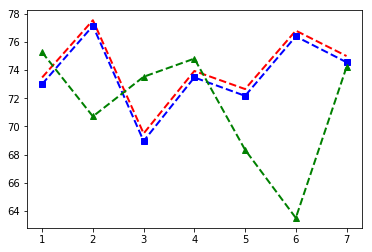

In [80]:
t=[1,2,3,4,5,6,7]
plt.plot(t,[value*100 for value in r_square], 'r--', t, [value*100 for value in r_adjusted], 'bs--', t,[value*100 for value in r_square_cv], 'g^--',linewidth=2.0)
plt.show()
#how to generate 1) labels for this plot , 2) How to generate an image for the plot...?

In [93]:
X,Y=splitXY(dataset_np_array)
X_train,Y_train,X_test,Y_test=cross_val_split(dataset_np_array)
forward_selection_skelton(X,Y)

Count of parameters :2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_698:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance(

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_696:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_694:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_692:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_690:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_688:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_686:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_684:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_682:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_680:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'VarIsInitializedOp_678:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Users\Jayant\Anaconda3\envs\kerasNN\lib\site-packages\torna

AttributeError: 'Tensor' object has no attribute 'is_initialized'

In [92]:

def forward_selection_skelton(X_train,Y_train,X_test=None,Y_test=None,modelname="Perceptron"): 
    m,n=X_train.shape
    X_cols = [] # buffer list that tells which column index is in X right now...
    X_set=np.empty((m,0))#for test and train with cv..this would need to be different..
    #need to save the below values for all models calculated in for loop and only save the best sse's
    r_square=[]
    r_adj=[]
    r_square_cv=[]
    r_adj_cv=[]
    
    while(len(X_cols)<7):
        sse=[]
        r_square_best=[]
        r_adj_best=[]
        r_square_cv_best=[]
        r_adj_cv_best=[]
        
        for i in range(0,n) :
            if(i not in X_cols):
                mno,nno=X_set.shape
                X_set_copy=np.array(X_set,copy=True)
                X_set_copy=np.insert(X_set_copy,nno,X_train[:,i],axis=1)
                model=fit_model(X_set_copy,Y_train,modelname)
                scores=eval_model(X_set_copy,Y_train,model)
                sse.append(float(scores[1]))
                r_square_best.append(scores[2])
                r_adj_best.append(scores[3])
            else: 
                sse.append(math.inf)#to
                r_square_best.append(1)
                r_adj_best.append(1)
        
        best_index=sse.index(min(sse))
        X_cols.append(best_index)
        mno,nno=X_set.shape
        np.insert(X_set,nno,X_train[:,best_index],axis=1)
        r_square.append(r_square_best[best_index])
        r_adjusted.append(r_adj_best[best_index])
    
    return r_square,r_adjusted

            #append cols..to 
            #run model on each column and append to model.sse list.. 
            #find highest in the list and its position..
            #append that to X_cols..and run the loop again..
    
    #same can be done for Rcv, but it uses the eval result with test cases...

In [82]:

X_set=np.empty((m,0))
X_set

array([], shape=(406, 0), dtype=float64)